In [68]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import os
from astropy.modeling import models
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
from scipy.special import voigt_profile
import Analysis_functions as AF
from importlib import reload

## Get the spectra for a given day

In [101]:
location = '/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/Solar-data/2023-01-21'
os.chdir(location)
dir_name = 'Corr-data'
blaze_dir = 'Blaze-data'
CCF_dir_name = 'CCF_RV-data'
if not os.path.exists('Plot_Results'):
    os.mkdir('Plot_Results')

## Extract data

In [102]:
reload(AF)

#Extracting the data
tot_lamda, tot_spctr, tot_norm_spctr, tot_err, tot_norm_err, tot_SNR, tot_mode, tot_date, tot_RV, tot_RV_err, tot_FWHM, tot_FWHM_err, tot_BIS_SPAN, tot_BIS_SPAN_err, tot_H2O, tot_H2O_err, tot_O2, tot_O2_err, tot_CO2, tot_CO2_err, tot_AIRM = AF.extraction(dir_name, blaze_dir, CCF_dir_name, 14)



## Remove outliers and low-SNR spectra

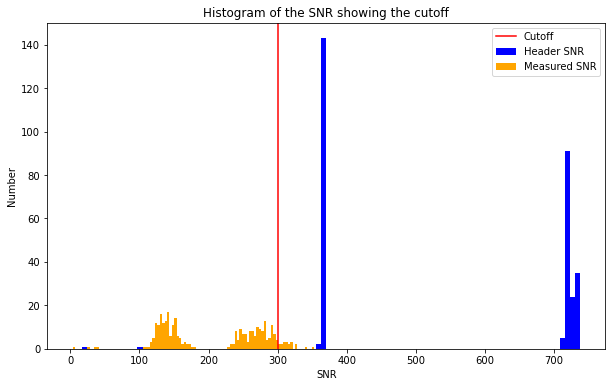

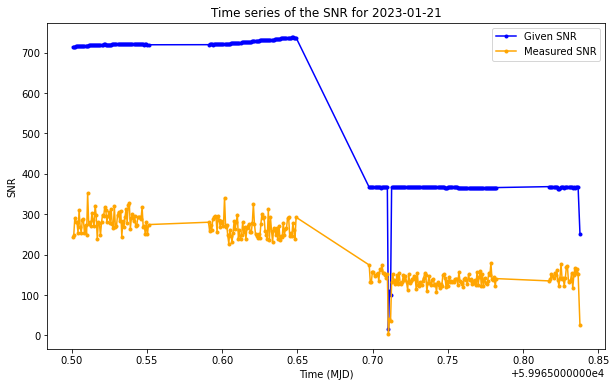

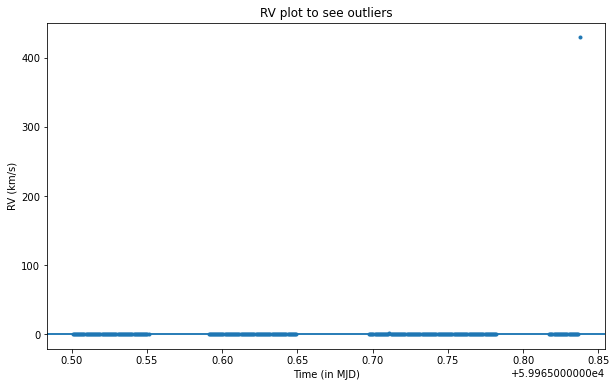

In [103]:
cut = 300
threshold = 0.2
low = 10767
up = 10770

measured_SNR = np.ones(tot_SNR.shape)

for h in range(len(tot_SNR)):
    
    continuum_lam = AF.bound(low, up, tot_lamda[h], tot_lamda[h])
    continuum_spctr= AF.bound(low, up, tot_lamda[h], tot_spctr[h])
    continuum_err = AF.bound(low, up, tot_lamda[h], tot_err[h])
    avg = np.average(continuum_spctr, weights = 1/continuum_err)
    variance = np.average((continuum_spctr - avg)**2, weights = 1/continuum_err)
    std = np.sqrt(variance)
    measured_SNR[h] = avg/std

    
plt.figure(figsize=[10, 6])
plt.hist(tot_SNR, bins=100, color='blue', label='Header SNR')
plt.hist(measured_SNR, bins=100, color='orange', label='Measured SNR')
plt.axvline(cut, color='r', label='Cutoff')
plt.xlabel('SNR')
plt.ylabel('Number')
plt.title('Histogram of the SNR showing the cutoff')
plt.legend()
plt.show()

plt.figure(figsize=[10, 6])
plt.plot(tot_date[tot_SNR>0], tot_SNR[tot_SNR>0], 'b.', label='Given SNR', linestyle='-')
plt.plot(tot_date, measured_SNR, '.', color='orange', label='Measured SNR', linestyle='-')
plt.xlabel('Time (MJD)')
plt.ylabel('SNR')
plt.title('Time series of the SNR for 2023-01-21')
plt.legend()
#plt.savefig('Plot_Results/SNR.pdf')
plt.show()

plt.figure(figsize=[10, 6])
plt.errorbar(tot_date, np.abs(tot_RV), yerr = np.abs(tot_RV_err), fmt='.')
plt.axhline((1+threshold)*np.median(np.abs(tot_RV)))
plt.axhline((1-threshold)*np.median(np.abs(tot_RV)))
plt.xlabel('Time (in MJD)')
plt.ylabel('RV (km/s)')
plt.title('RV plot to see outliers')
plt.show()


In [104]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(tot_mode=='A') != len(tot_mode) and np.sum(tot_mode=='E')!= len(tot_mode):
    total_spctr_HA, total_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_spctr, tot_RV, cut, threshold)

    total_norm_spctr_HA, total_norm_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_norm_spctr, tot_RV, cut, threshold)

    total_lamda_HA, total_lamda_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_lamda, tot_RV, cut, threshold)
    
    total_err_HA, total_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_err, tot_RV, cut, threshold)

    total_norm_err_HA, total_norm_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_norm_err, tot_RV, cut, threshold)
    
    date_HA, date_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_date, tot_RV, cut, threshold)

    total_RV_HA, total_RV_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_RV, tot_RV, cut, threshold)

    total_RV_err_HA, total_RV_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_RV_err, tot_RV, cut, threshold)

    total_FWHM_HA, total_FWHM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_FWHM, tot_RV, cut, threshold)

    total_FWHM_err_HA, total_FWHM_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_FWHM_err, tot_RV, cut, threshold)

    total_BIS_SPAN_HA, total_BIS_SPAN_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_BIS_SPAN, tot_RV, cut, threshold)

    total_BIS_SPAN_err_HA, total_BIS_SPAN_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_BIS_SPAN_err, tot_RV, cut, threshold)

    total_H2O_HA, total_H2O_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_H2O, tot_RV, cut, threshold)

    total_H2O_err_HA, total_H2O_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_H2O_err, tot_RV, cut, threshold)

    total_O2_HA, total_O2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_O2, tot_RV, cut, threshold)
    
    total_O2_err_HA, total_O2_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_O2_err, tot_RV, cut, threshold)

    total_CO2_HA, total_CO2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_CO2, tot_RV, cut, threshold)

    total_CO2_err_HA, total_CO2_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_CO2_err, tot_RV, cut, threshold)

    total_AIRM_HA, total_AIRM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_AIRM, tot_RV, cut, threshold)

#If there is one mode of observation
else:
    total_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, tot_spctr, tot_RV, cut, threshold)

    total_norm_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, tot_norm_spctr, tot_RV, cut, threshold)

    total_lamda = AF.segment_and_reduce(tot_mode, tot_SNR, tot_lamda, tot_RV, cut, threshold)
    
    total_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_err, tot_RV, cut, threshold)

    total_norm_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_norm_err, tot_RV, cut, threshold)
    
    date = AF.segment_and_reduce(tot_mode, tot_SNR, tot_date, tot_RV, cut, threshold)

    total_RV = AF.segment_and_reduce(tot_mode, tot_SNR, tot_RV, tot_RV, cut, threshold)

    total_RV_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_RV_err, tot_RV, cut, threshold)

    total_FWHM = AF.segment_and_reduce(tot_mode, tot_SNR, tot_FWHM, tot_RV, cut, threshold)

    total_FWHM_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_FWHM_err, tot_RV, cut, threshold)

    total_BIS_SPAN = AF.segment_and_reduce(tot_mode, tot_SNR, tot_BIS_SPAN, tot_RV, cut, threshold)

    total_BIS_SPAN_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_BIS_SPAN_err, tot_RV, cut, threshold)

    total_H2O = AF.segment_and_reduce(tot_mode, tot_SNR, tot_H2O, tot_RV, cut, threshold)

    total_H2O_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_H2O_err, tot_RV, cut, threshold)

    total_O2 = AF.segment_and_reduce(tot_mode, tot_SNR, tot_O2, tot_RV, cut, threshold)
    
    total_O2_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_O2_err, tot_RV, cut, threshold)

    total_CO2 = AF.segment_and_reduce(tot_mode, tot_SNR, tot_CO2, tot_RV, cut, threshold)

    total_CO2_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_CO2_err, tot_RV, cut, threshold)

    total_AIRM = AF.segment_and_reduce(tot_mode, tot_SNR, tot_AIRM, tot_RV, cut, threshold)

    
mode = tot_mode

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


## Fitting a gaussian to the stellar spectrum

[-8.21382412e-02 -1.11494778e+02  1.08333104e+04  2.37648339e-01
  1.03853390e-02]


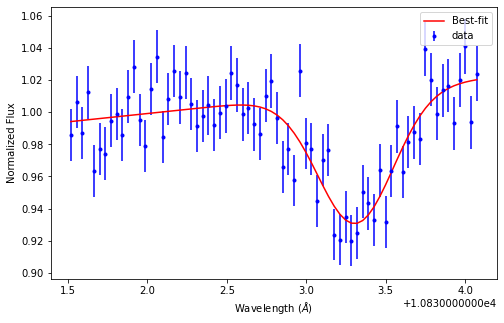

[-7.39830044e-02 -1.79499645e+02  1.08333435e+04  3.60302519e-01
  1.66637949e-02]


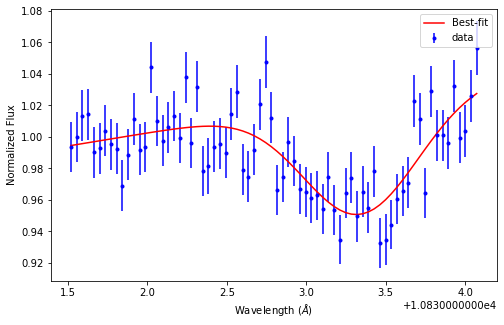

[-7.27247004e-02 -7.83879752e+01  1.08333539e+04  2.55213450e-01
  7.32942469e-03]


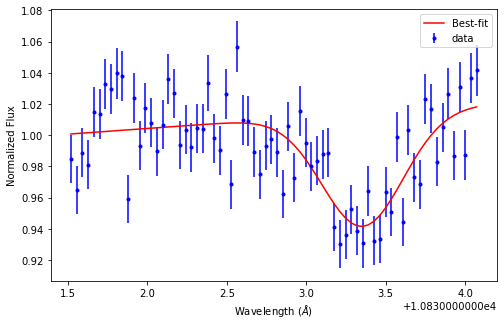

[-6.95595100e-02 -1.57701904e+02  1.08332871e+04  2.99423297e-01
  1.46512238e-02]


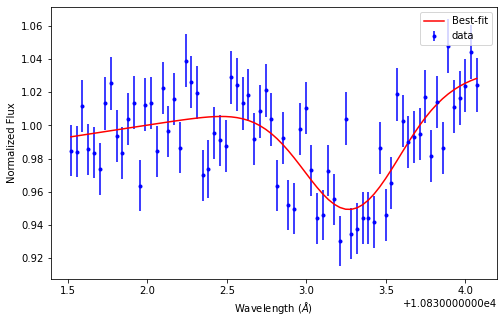

[-6.50837913e-02 -1.33538199e+02  1.08333294e+04  3.32359010e-01
  1.24204399e-02]


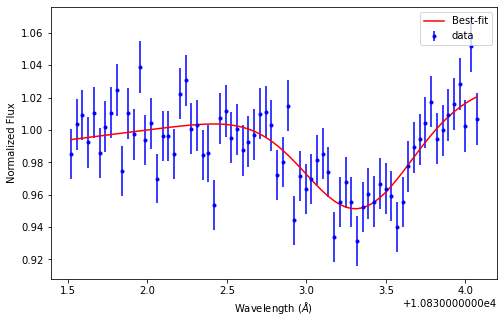

[-8.17415352e-02 -1.58433324e+02  1.08333008e+04  1.85202726e-01
  1.47180058e-02]


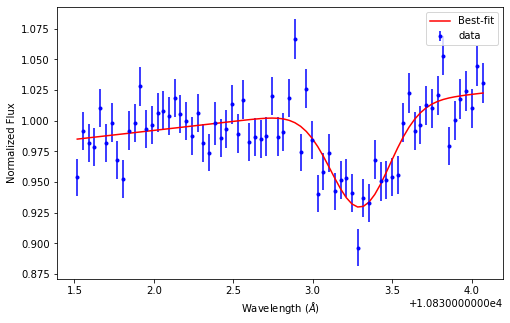

[-9.30248344e-02 -2.16143572e+02  1.08333599e+04  3.74726628e-01
  2.00471074e-02]


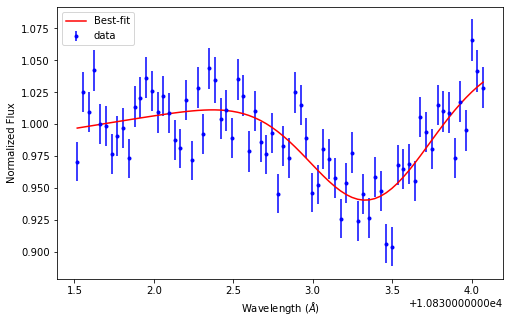

[-7.18804742e-02 -4.02241497e+01  1.08332797e+04  2.39526942e-01
  3.80658404e-03]


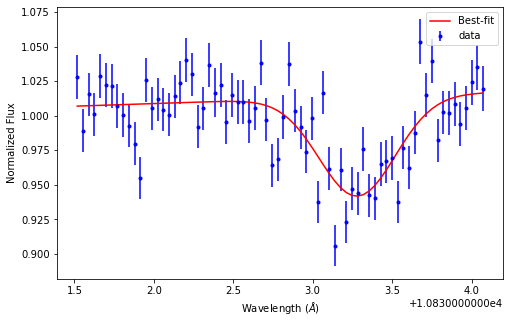

[-6.16616353e-02 -9.88043885e+01  1.08332904e+04  2.69285845e-01
  9.21316767e-03]


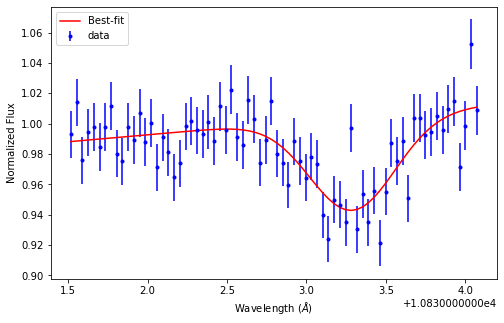

[-8.15918467e-02 -1.64099495e+02  1.08333938e+04  2.47535019e-01
  1.52414270e-02]


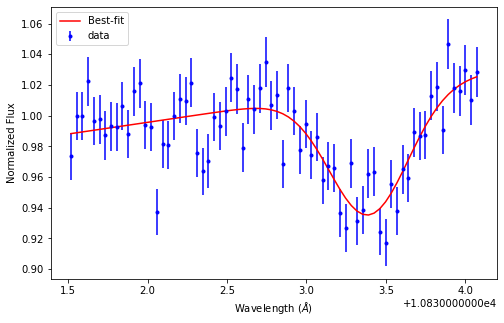

[-6.82722060e-02 -1.12197289e+02  1.08332709e+04  2.62065923e-01
  1.04497978e-02]


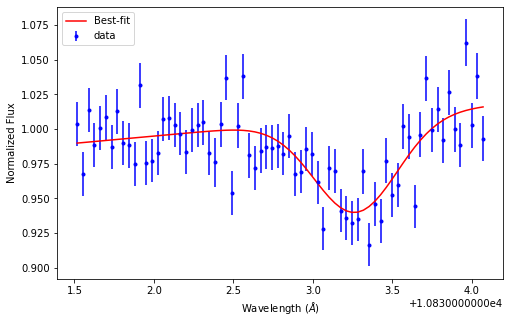

[-9.32202082e-02 -1.94073046e+02  1.08333680e+04  2.61100409e-01
  1.80085863e-02]


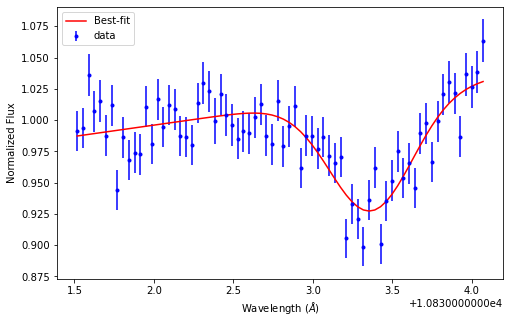

[-8.29735652e-02 -1.22404443e+02  1.08333303e+04  2.65599323e-01
  1.13927102e-02]


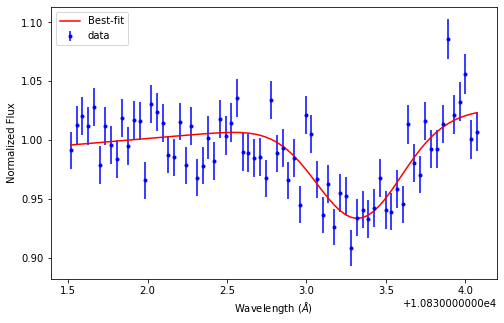

[-7.55350943e-02 -5.67854042e+01  1.08333331e+04  2.20883515e-01
  5.33499617e-03]


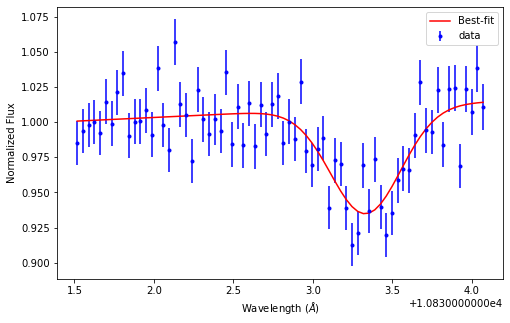

[-7.32110788e-02 -1.02527696e+02  1.08333128e+04  2.70718909e-01
  9.55733287e-03]


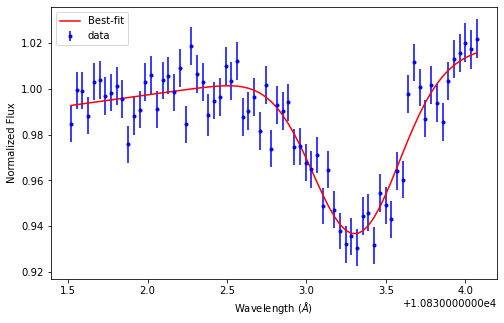

[-8.52995437e-02 -1.24823040e+02  1.08332999e+04  2.27822665e-01
  1.16158656e-02]


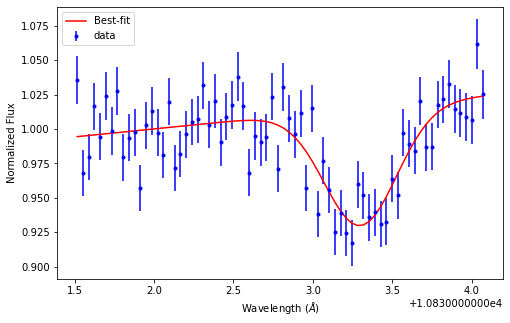

[-7.80266258e-02 -3.66060212e+01  1.08333319e+04  2.05794967e-01
  3.47216720e-03]


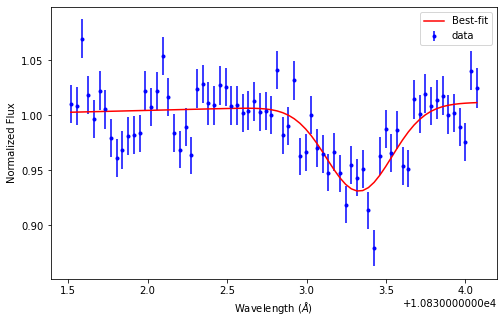

[-8.35719792e-02 -1.93007356e+02  1.08333121e+04  2.67365340e-01
  1.79108681e-02]


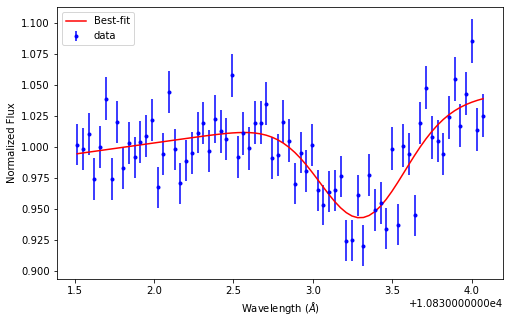

[-8.80234894e-02 -1.56650752e+02  1.08333142e+04  2.76233990e-01
  1.45547352e-02]


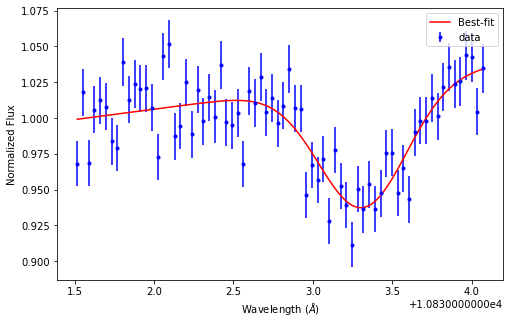

[-7.40507422e-02 -1.13897527e+02  1.08333574e+04  2.72097886e-01
  1.06077217e-02]


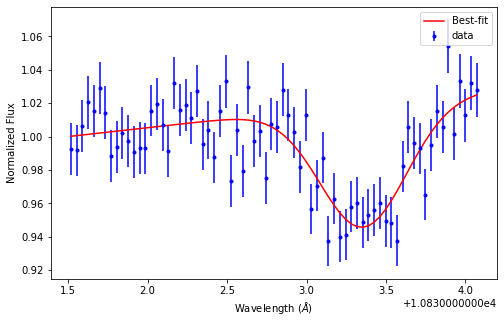

[-6.74118962e-02 -8.83517752e+01  1.08333096e+04  2.81200196e-01
  8.24957705e-03]


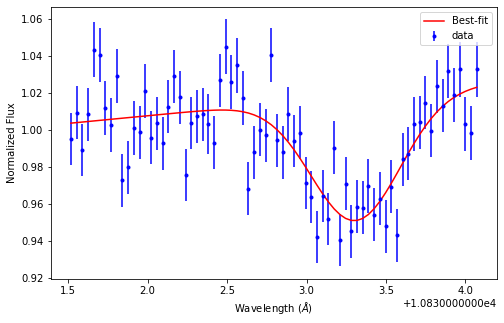

[-7.97017504e-02 -5.97436900e+01  1.08333042e+04  2.27047203e-01
  5.60864346e-03]


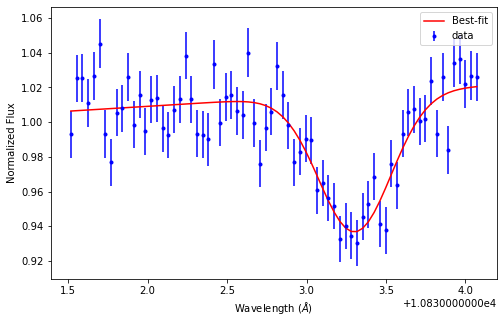

[-7.58425731e-02 -1.35787280e+02  1.08332559e+04  2.82613771e-01
  1.26286480e-02]


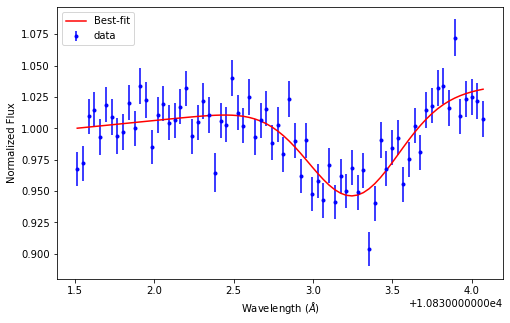

[-7.57095408e-02 -4.05543648e+01  1.08333071e+04  2.29251117e-01
  3.83705481e-03]


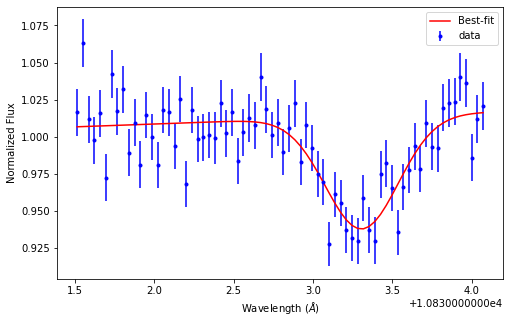

[-7.68029328e-02  4.23712107e-01  1.08332966e+04  2.25761406e-01
  5.37318172e-05]


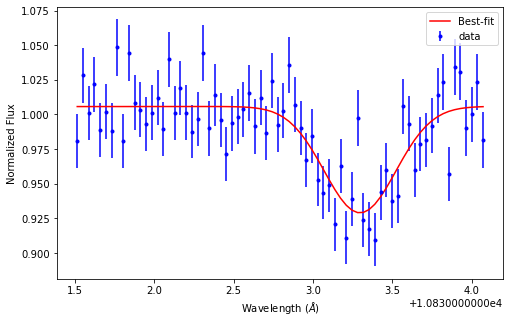

[-7.89299957e-02 -5.96713750e+01  1.08332908e+04  2.74073361e-01
  5.60189199e-03]


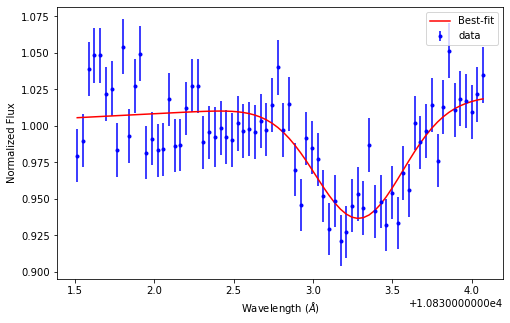

[-6.82427373e-02 -1.24390446e+02  1.08333464e+04  2.85649426e-01
  1.15760925e-02]


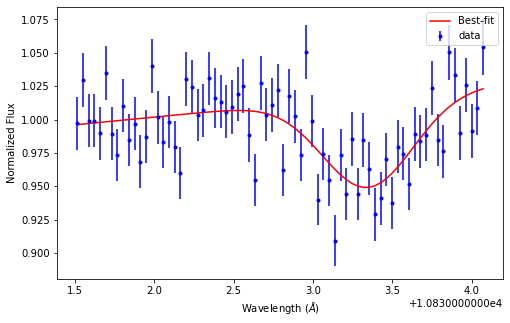

[-7.42363688e-02 -1.34011833e+02  1.08333636e+04  3.65151440e-01
  1.24644958e-02]


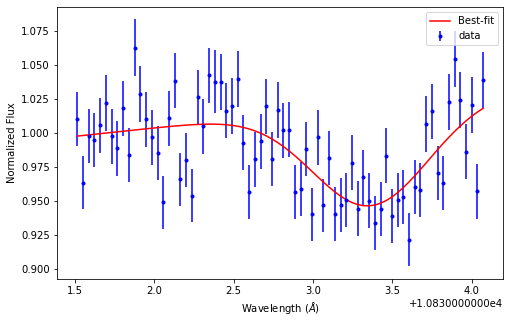

[-8.02916761e-02 -1.49875498e+02  1.08333081e+04  2.16770371e-01
  1.39281351e-02]


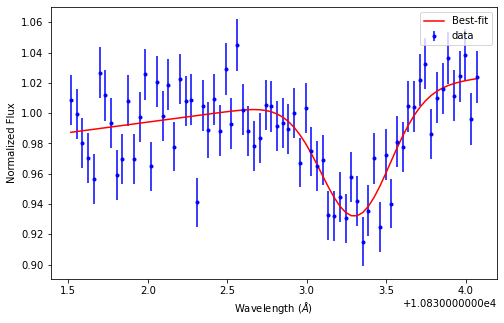

[-8.15613198e-02 -1.00026070e+02  1.08333091e+04  2.81950677e-01
  9.32694269e-03]


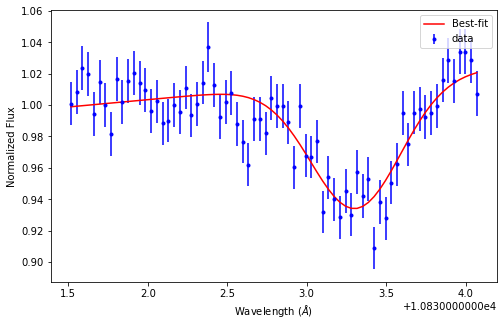

[-7.36117259e-02 -1.04925668e+02  1.08333487e+04  2.66360931e-01
  9.77840025e-03]


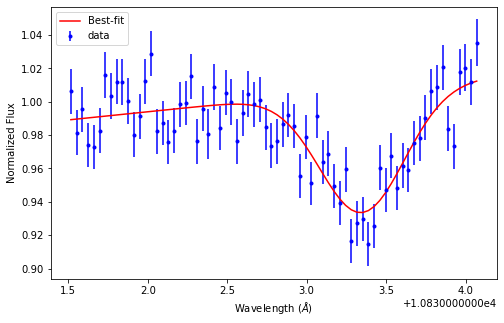

[-6.12455575e-02 -6.64855465e+01  1.08332765e+04  2.68568051e-01
  6.23047955e-03]


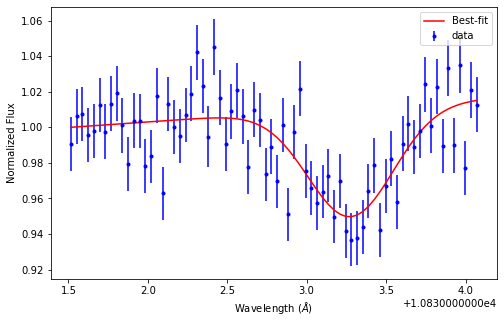

[-9.49012296e-02 -2.28739863e+02  1.08333380e+04  3.52876258e-01
  2.12096262e-02]


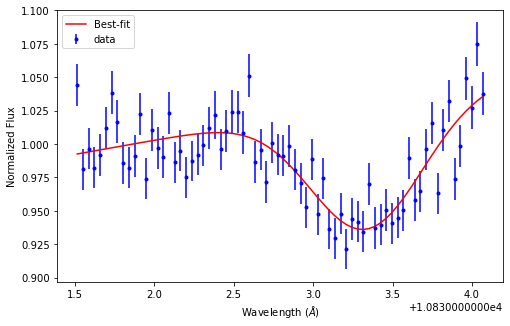

[-7.67850636e-02 -1.03868773e+02  1.08333368e+04  3.09431824e-01
  9.68149109e-03]


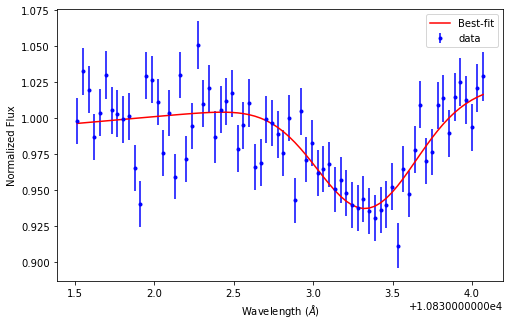

[-7.01740429e-02 -6.02525686e+01  1.08332975e+04  2.85527962e-01
  5.65437768e-03]


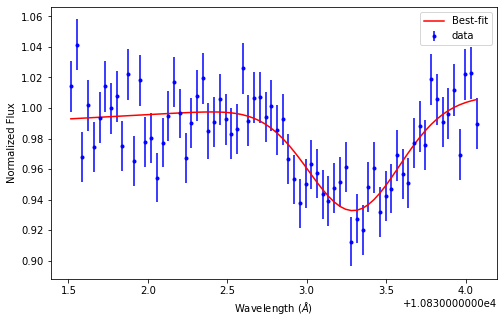

[-8.26184964e-02 -1.21320389e+01  1.08333094e+04  1.91529819e-01
  1.21218935e-03]


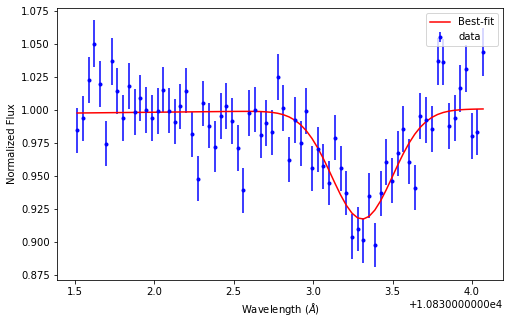

[-8.37216536e-02 -9.98921581e+01  1.08333084e+04  2.38039596e-01
  9.31452752e-03]


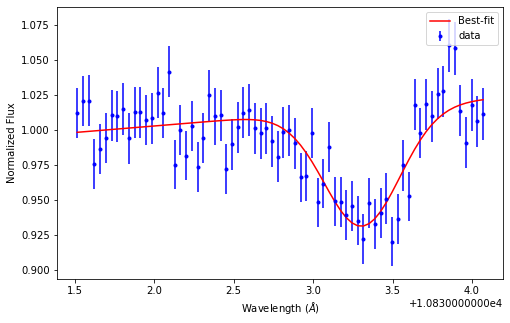

[-6.87687571e-02 -1.32518831e+02  1.08333439e+04  3.17281494e-01
  1.23268813e-02]


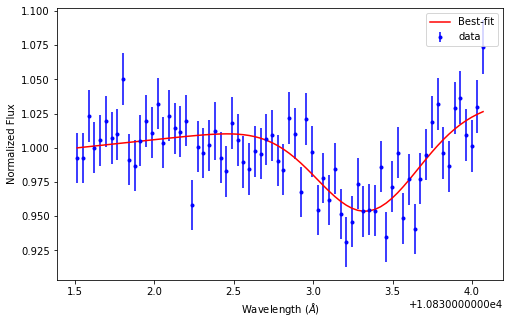

[-5.77448181e-02 -1.16447182e+02  1.08332697e+04  3.12006222e-01
  1.08423504e-02]


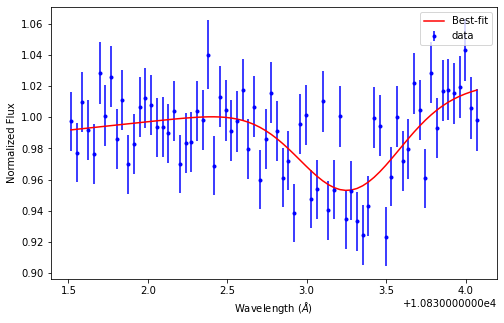

[-6.83799370e-02 -6.81073199e+01  1.08332901e+04  3.15892978e-01
  6.38017173e-03]


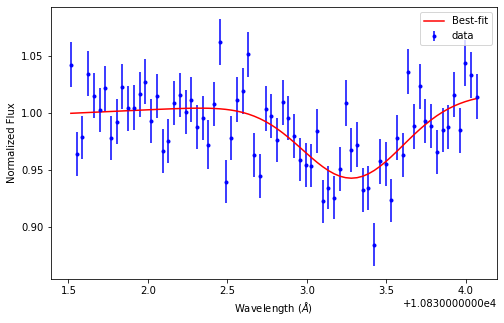

[-8.19983761e-02 -3.91033126e+01  1.08333463e+04  2.03610656e-01
  3.70237680e-03]


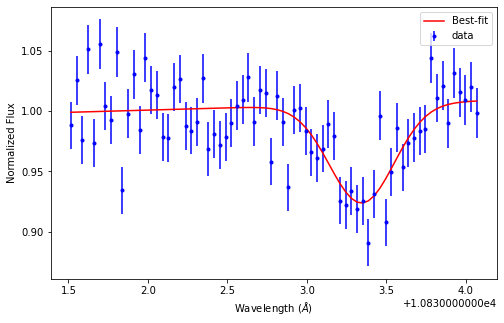

[-8.13952480e-02 -8.47881449e+01  1.08333029e+04  2.56306892e-01
  7.92020203e-03]


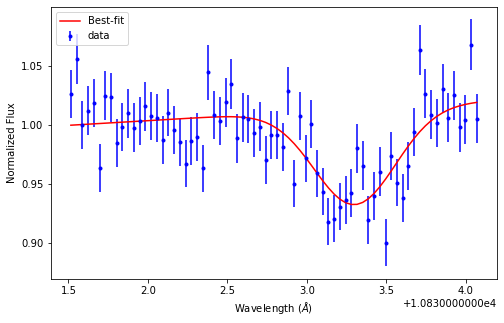

[-9.30574795e-02 -2.39511278e+02  1.08333163e+04  4.07071985e-01
  2.22041021e-02]


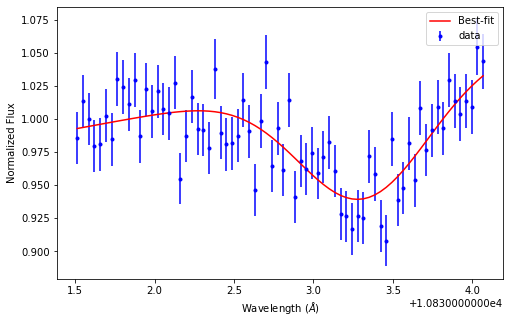

[-8.10663900e-02 -1.56629516e+02  1.08333521e+04  2.92236295e-01
  1.45514807e-02]


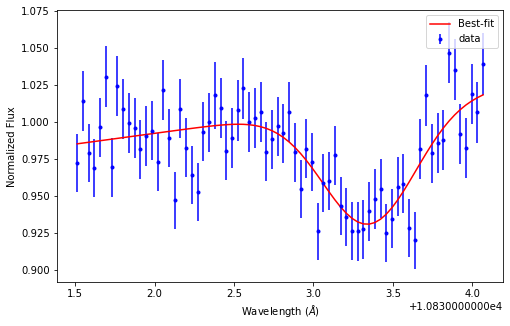

[-7.73209042e-02 -1.41556873e+02  1.08333452e+04  2.91672097e-01
  1.31605453e-02]


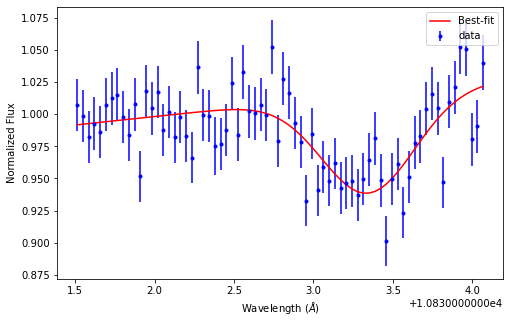

[-8.62479360e-02 -3.44951094e+01  1.08333185e+04  2.47446994e-01
  3.27747947e-03]


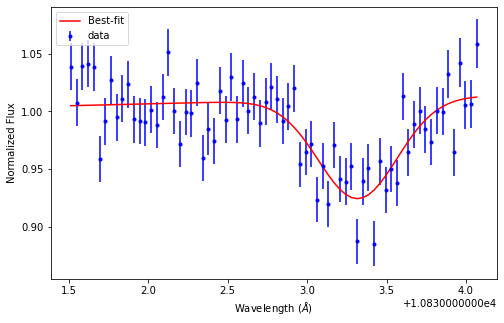

[-8.21578049e-02 -2.31261959e+02  1.08334000e+04  3.25741616e-01
  2.14420025e-02]


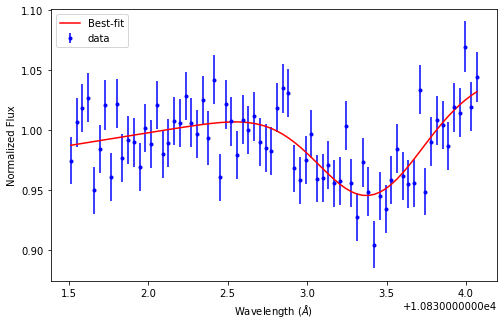

[-6.51257849e-02 -4.83850865e+01  1.08332468e+04  2.65990240e-01
  4.55854040e-03]


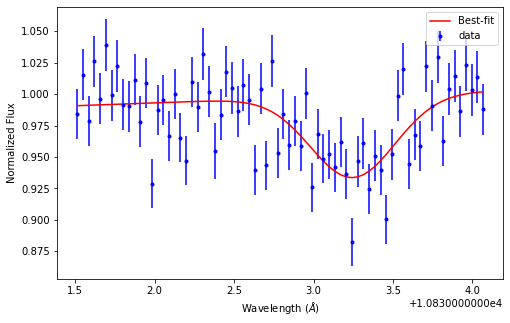

[-7.46061582e-02 -1.75831457e+02  1.08333516e+04  2.81301501e-01
  1.63244041e-02]


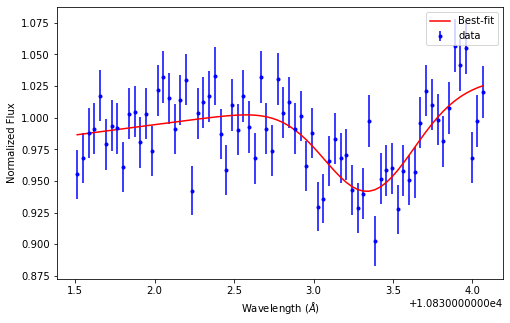

[-8.17536095e-02 -1.81287702e+02  1.08333896e+04  3.56331426e-01
  1.68286467e-02]


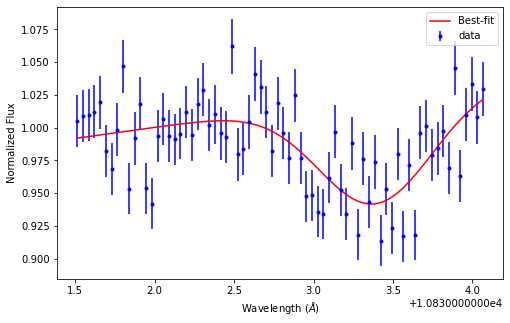

[-9.11781376e-02 -1.84355341e+02  1.08333167e+04  2.85029682e-01
  1.71118754e-02]


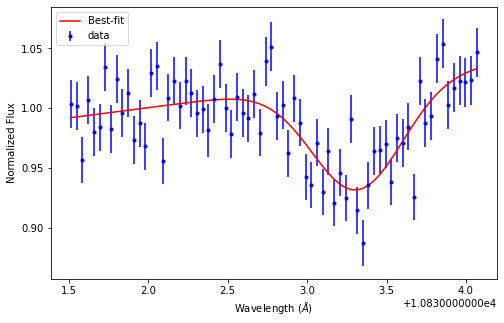

[-9.83906787e-02 -2.40519241e+02  1.08333374e+04  3.27917834e-01
  2.22970710e-02]


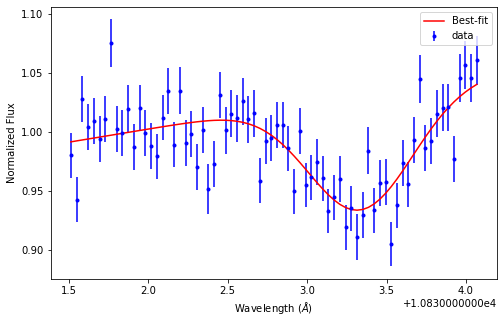

[-7.73364170e-02 -7.51162101e+01  1.08333313e+04  2.01025865e-01
  7.02758629e-03]


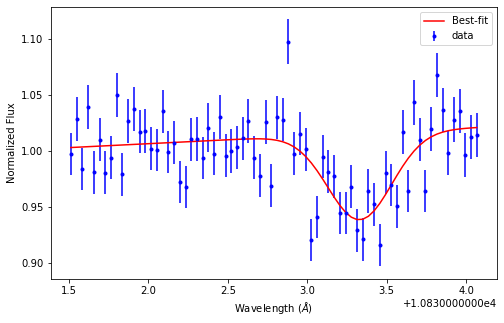

[-7.14654227e-02 -1.49748584e+02  1.08334000e+04  4.11568490e-01
  1.39176466e-02]


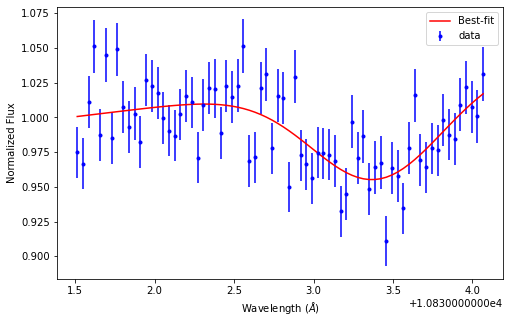

[-7.30283540e-02 -9.25647470e+01  1.08333265e+04  3.31633857e-01
  8.63803229e-03]


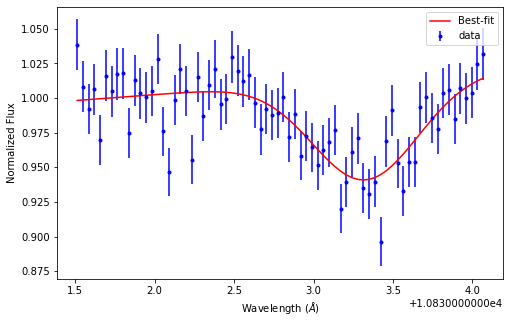

[-9.82648015e-02 -2.53285632e+02  1.08333316e+04  4.19339795e-01
  2.34767359e-02]


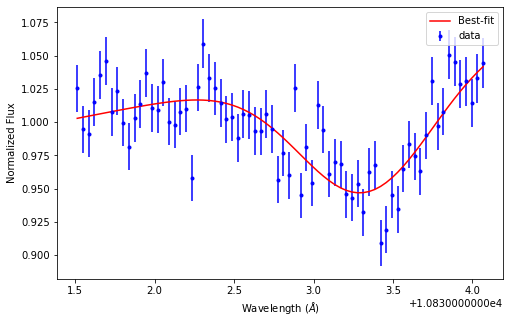

[-7.79188614e-02 -1.07173657e+02  1.08333240e+04  3.39887391e-01
  9.98750232e-03]


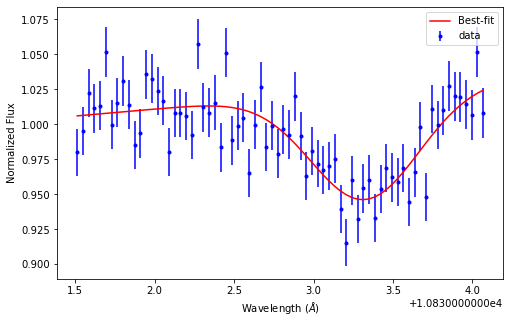

[-8.62424877e-02 -1.06283225e+02  1.08333255e+04  3.09349183e-01
  9.90485361e-03]


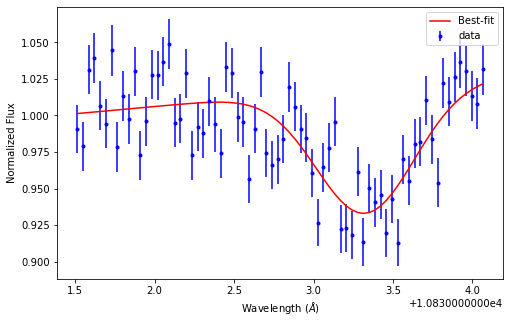

[-6.83749697e-02 -1.28658508e+02  1.08333098e+04  2.39413426e-01
  1.19695723e-02]


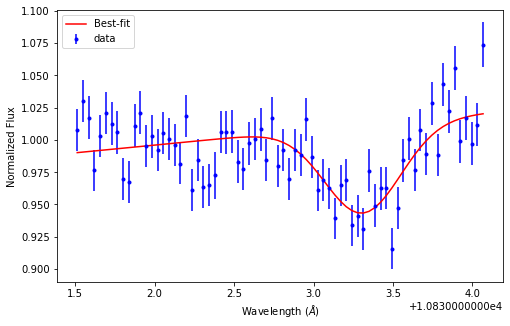

[-7.09285324e-02 -9.99923836e-01  1.08332856e+04  2.25965723e-01
  1.85288453e-04]


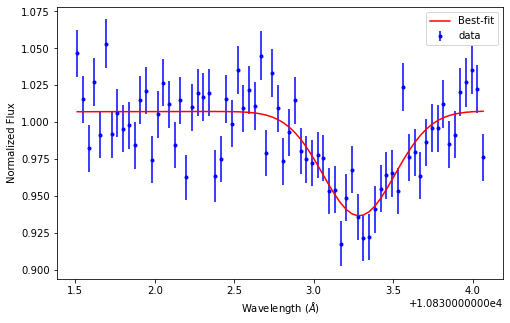

[-8.26829016e-02 -2.09872588e+02  1.08333508e+04  2.96821607e-01
  1.94671109e-02]


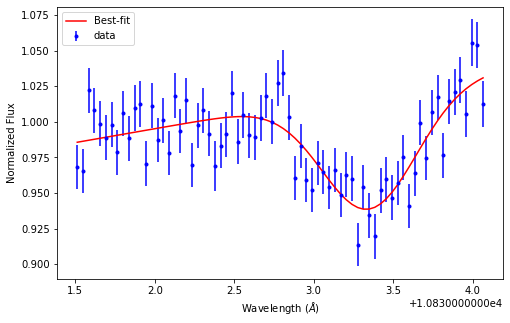

[-9.86139364e-02 -2.20192307e+02  1.08333897e+04  3.47630056e-01
  2.04211484e-02]


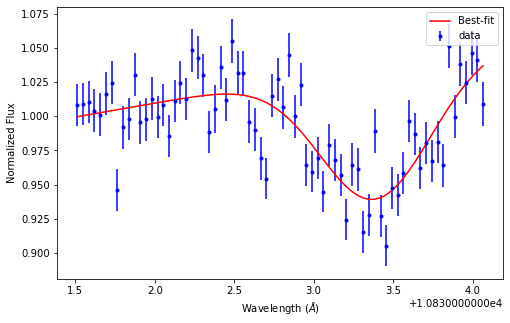

[-7.91424111e-02 -9.67059456e+01  1.08333380e+04  2.83827357e-01
  9.02086943e-03]


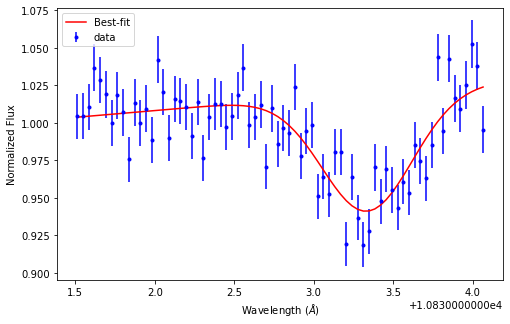

[-8.37266741e-02 -1.00962235e+02  1.08333391e+04  2.50364400e-01
  9.41320301e-03]


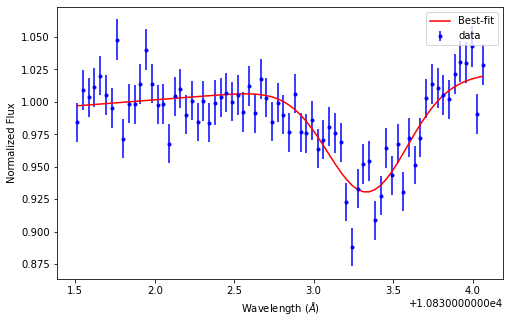

[-7.04626559e-02 -1.35307927e+02  1.08332937e+04  3.86198039e-01
  1.25845044e-02]


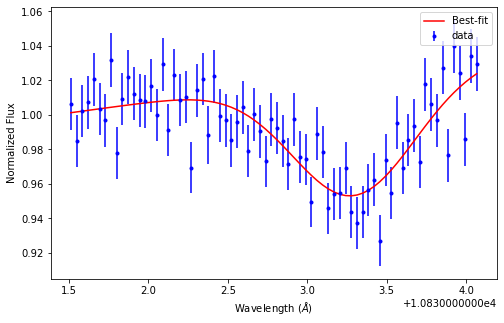

[-7.25355733e-02 -9.70883030e+01  1.08333233e+04  2.78807706e-01
  9.05584931e-03]


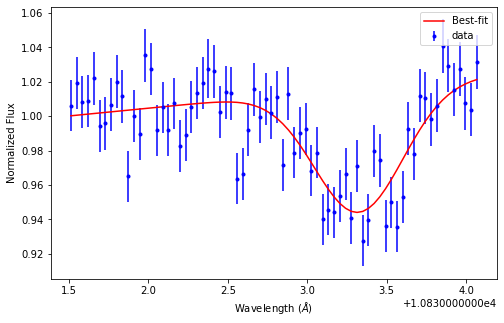

[-6.17218872e-02 -5.20006828e+01  1.08332852e+04  2.55064078e-01
  4.89333986e-03]


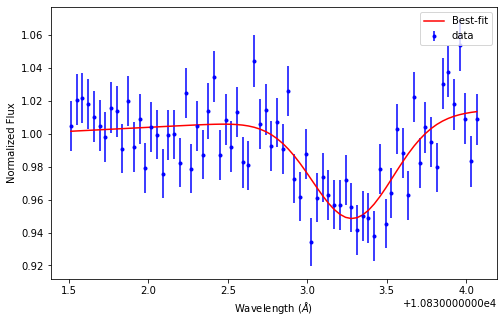

[-7.23837119e-02 -1.09698989e+02  1.08333105e+04  2.74874081e-01
  1.02200038e-02]


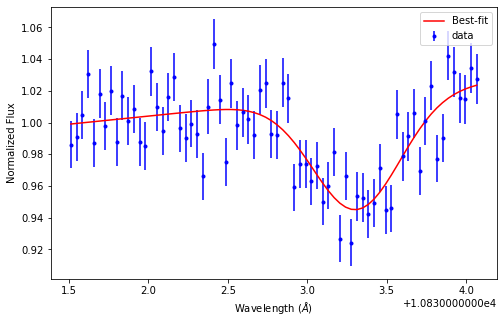

[-6.64371442e-02 -8.37156451e+01  1.08332935e+04  2.53012221e-01
  7.82091496e-03]


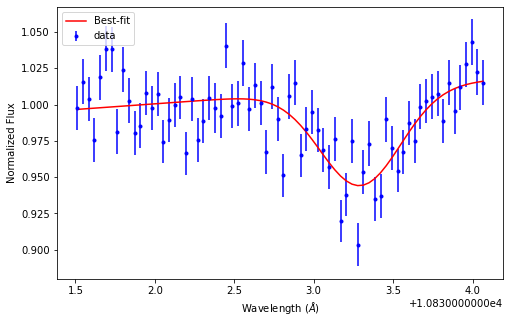

[-8.41425654e-02 -1.85611632e+02  1.08333174e+04  2.96186961e-01
  1.72278192e-02]


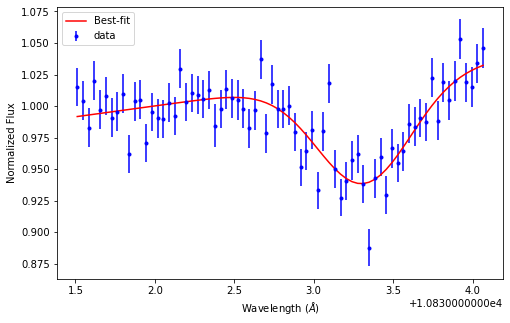

[-8.20289867e-02 -1.09298252e+02  1.08333234e+04  2.85226907e-01
  1.01831398e-02]


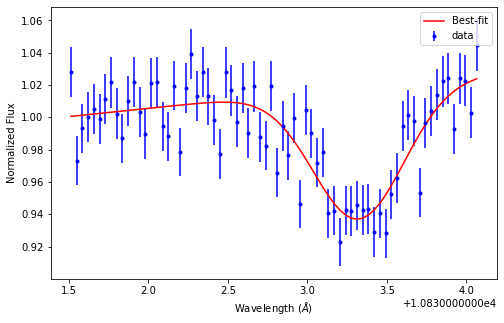

[-7.52353209e-02 -5.03711145e+01  1.08333138e+04  2.07473274e-01
  4.74275745e-03]


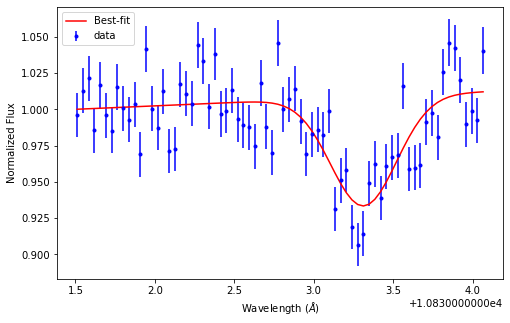

[-7.67220207e-02 -1.11561586e+02  1.08333222e+04  2.72111511e-01
  1.03915949e-02]


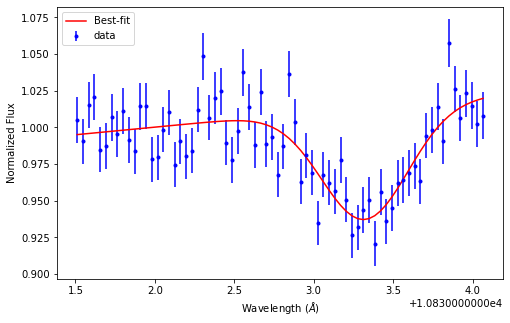

[-7.50727156e-02 -1.62488016e+02  1.08332757e+04  3.43976066e-01
  1.50932831e-02]


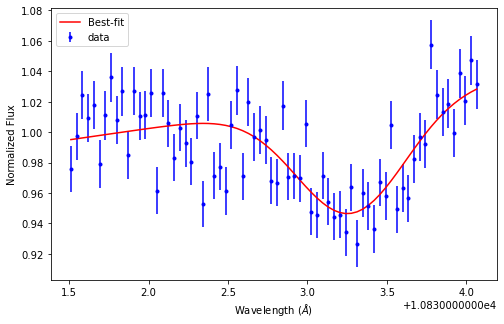

[-1.02561315e-01 -2.36171929e+02  1.08333731e+04  3.41615531e-01
  2.18959741e-02]


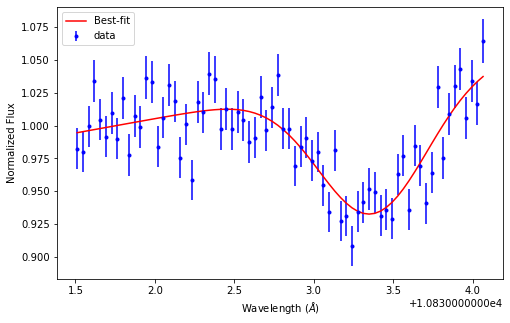

[-8.82504794e-02 -1.04363558e+02  1.08333249e+04  2.12516259e-01
  9.72698180e-03]


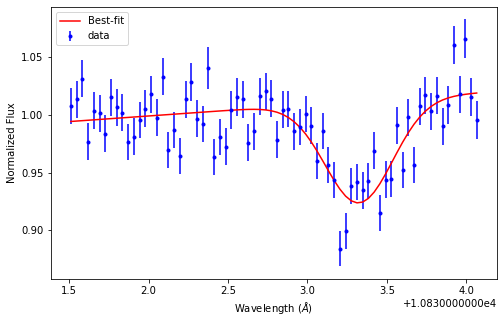

[-7.05365549e-02 -1.19698417e+02  1.08333216e+04  3.11288651e-01
  1.11429025e-02]


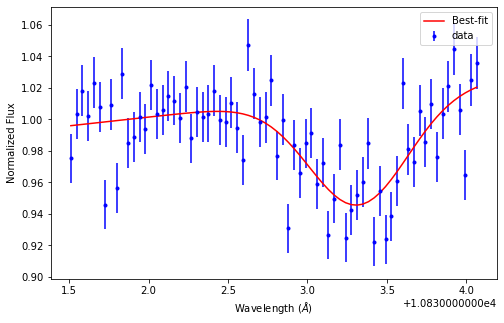

[-8.50641991e-02 -1.74266349e+02  1.08333576e+04  2.43918689e-01
  1.61800028e-02]


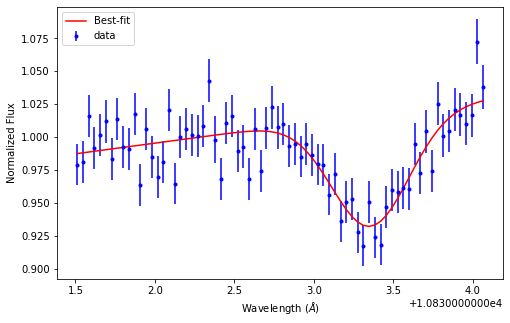

[-9.01652076e-02 -8.77552308e+01  1.08333001e+04  2.35873944e-01
  8.19419674e-03]


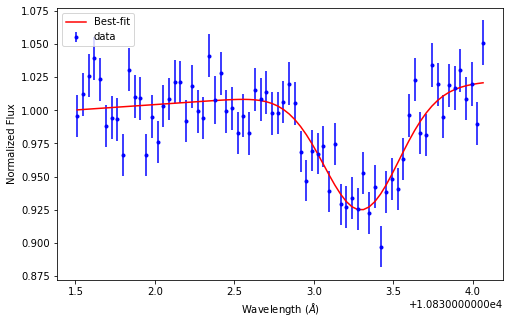

[-7.40220088e-02 -1.42917694e+02  1.08333365e+04  3.11333762e-01
  1.32863051e-02]


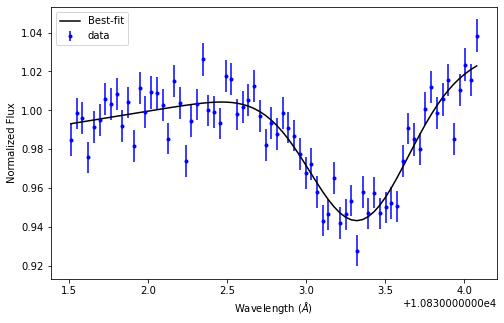

[-7.66460307e-02 -8.98515354e+01  1.08333151e+04  2.54374442e-01
  8.38736039e-03]


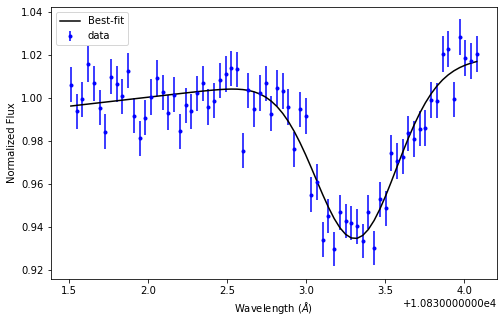

[-7.91828350e-02 -1.00074811e+02  1.08333309e+04  2.53447856e-01
  9.33137128e-03]


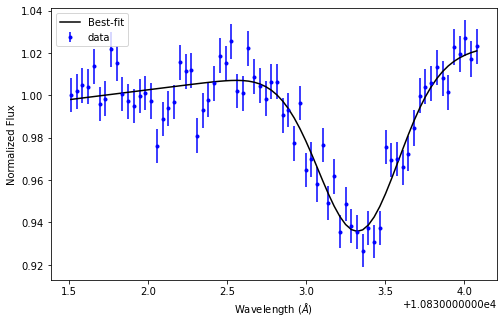

[-6.67467730e-02 -5.25272358e+01  1.08333094e+04  2.93948370e-01
  4.94173797e-03]


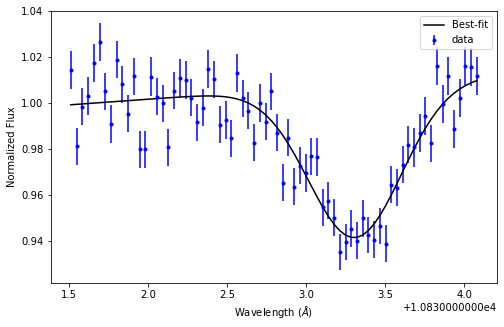

[-7.48945826e-02 -9.33265717e+01  1.08333198e+04  2.85854264e-01
  8.70843622e-03]


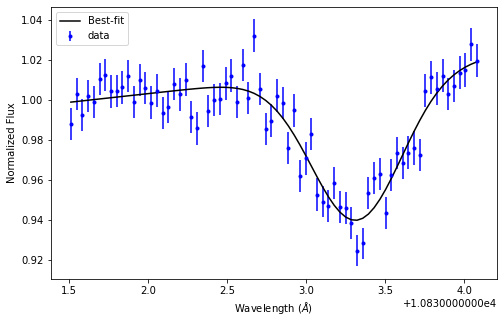

[-7.35382269e-02 -6.57494148e+01  1.08333074e+04  2.65893302e-01
  6.16246328e-03]


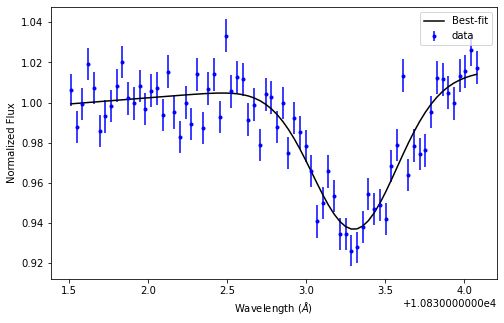

[-7.25948981e-02 -9.16335223e+01  1.08332903e+04  2.88506292e-01
  8.55227060e-03]


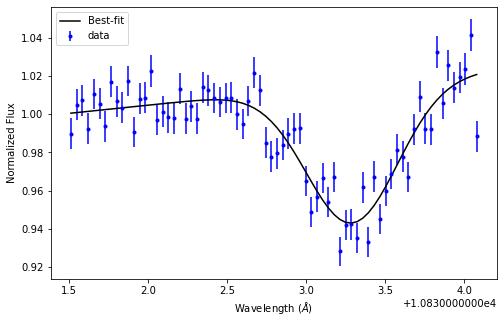

[-6.80686499e-02 -3.33439568e+01  1.08333054e+04  2.46350054e-01
  3.17069934e-03]


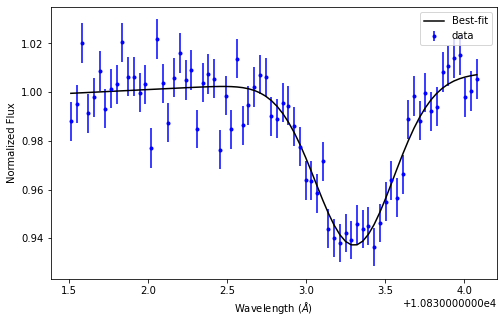

[-7.75326255e-02 -1.42135543e+02  1.08333159e+04  3.14375182e-01
  1.32143291e-02]


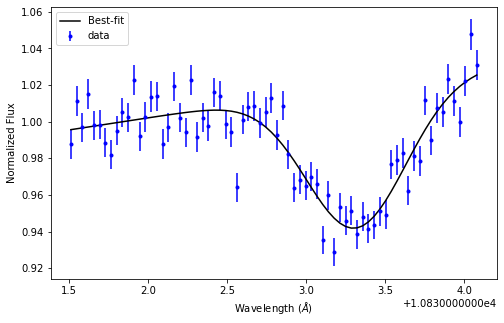

[-6.98976417e-02 -9.91862436e+01  1.08333153e+04  2.96984967e-01
  9.24929504e-03]


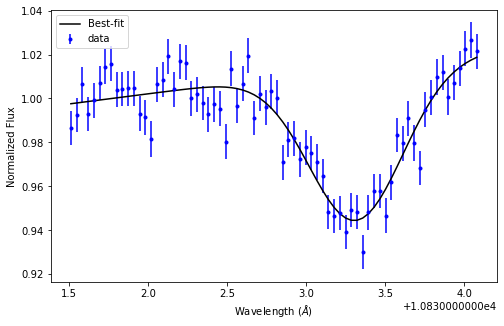

[-7.20030727e-02 -4.92286253e+01  1.08333235e+04  2.88541134e-01
  4.63771236e-03]


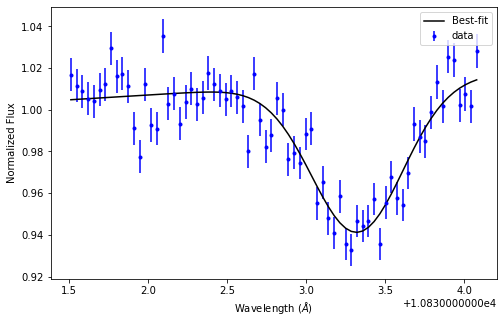

[-7.27063761e-02 -9.01050239e+01  1.08333213e+04  2.81547252e-01
  8.41093127e-03]


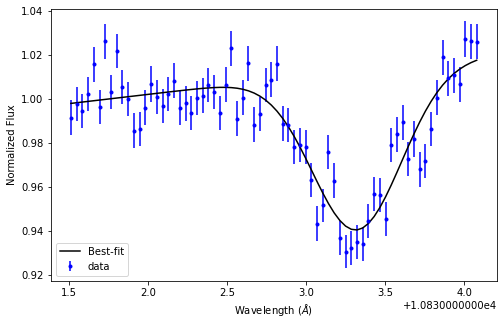

[-7.52185257e-02 -1.09946135e+02  1.08332842e+04  3.05815181e-01
  1.02431720e-02]


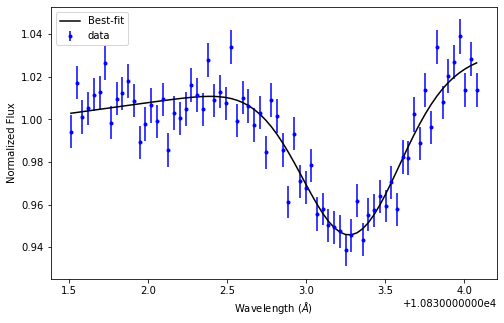

[-7.23313851e-02 -1.15164116e+02  1.08333082e+04  3.18295210e-01
  1.07242617e-02]


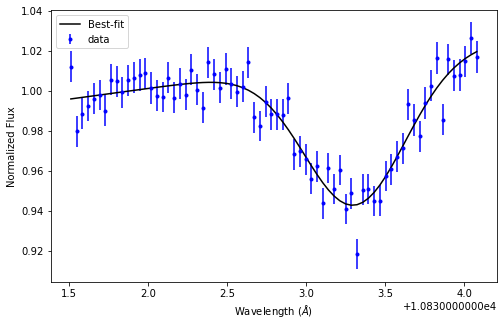

[-8.40698706e-02 -1.52184134e+02  1.08333184e+04  3.05088411e-01
  1.41421523e-02]


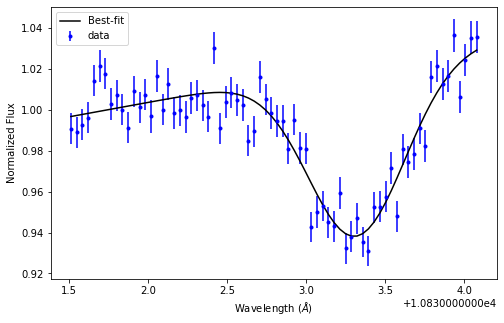

[-7.38869704e-02 -9.11894510e+01  1.08333134e+04  3.06236244e-01
  8.51159318e-03]


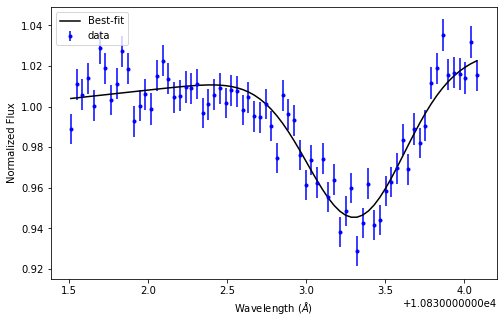

[-7.04947368e-02 -6.44526372e+01  1.08332886e+04  2.84420663e-01
  6.04280577e-03]


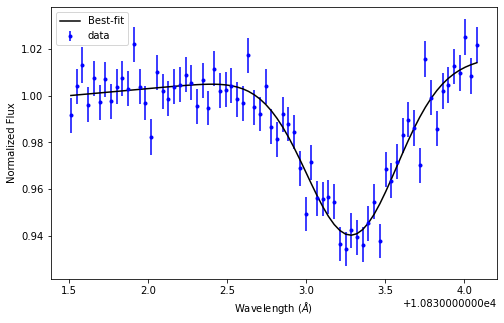

[-7.48504868e-02 -1.13299681e+02  1.08333258e+04  3.10307807e-01
  1.05523552e-02]


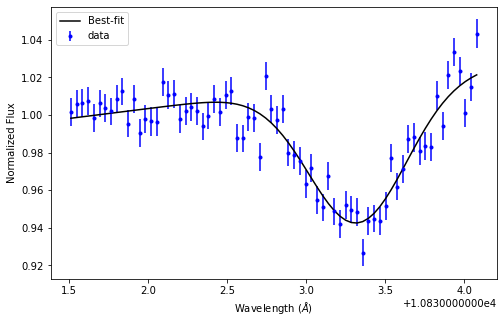

[-6.90817559e-02 -6.61565247e+01  1.08332862e+04  2.90346871e-01
  6.20044952e-03]


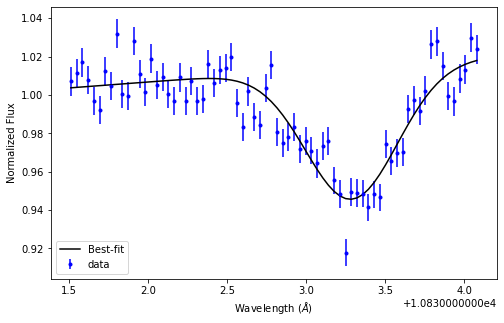

[-6.79660844e-02 -1.10755080e+02  1.08333065e+04  3.33125452e-01
  1.03173575e-02]


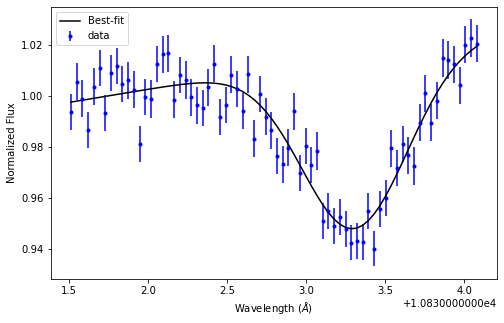

[-7.16712274e-02 -1.05846835e+02  1.08332984e+04  2.82544952e-01
  9.86420632e-03]


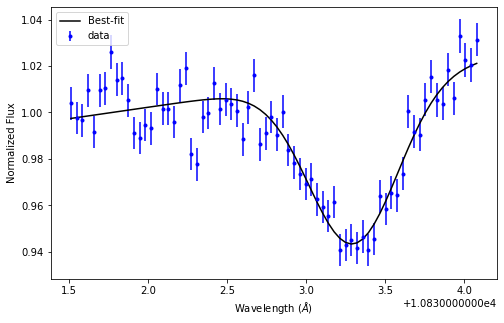

[-6.51125514e-02 -4.80878784e+01  1.08332962e+04  2.72311317e-01
  4.53212365e-03]


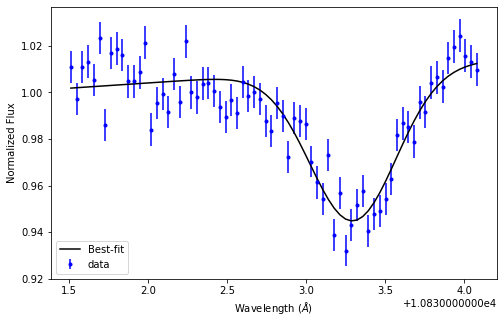

[-7.10741893e-02 -8.47476943e+01  1.08332914e+04  3.35799790e-01
  7.91684919e-03]


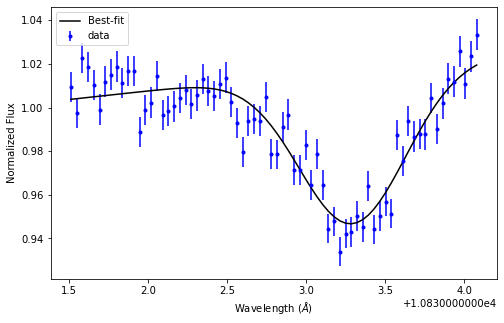

[-7.29714870e-02 -1.07041845e+02  1.08333218e+04  2.94476004e-01
  9.97469161e-03]


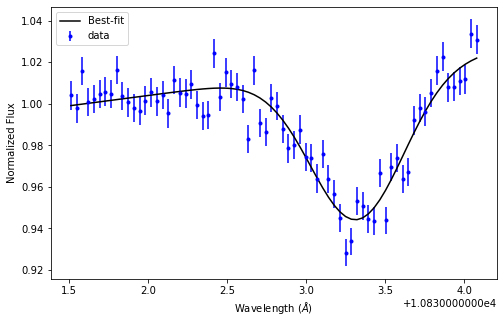

[-7.61167207e-02 -1.33903791e+02  1.08333260e+04  3.01230004e-01
  1.24541285e-02]


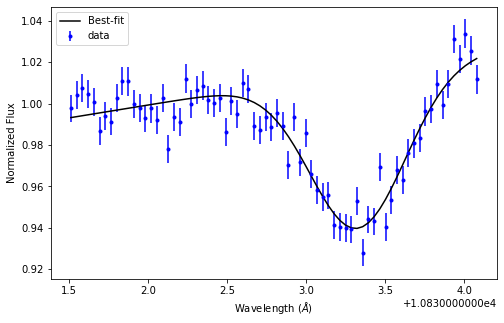

[-7.43458889e-02 -1.14801697e+02  1.08333038e+04  2.87723488e-01
  1.06908819e-02]


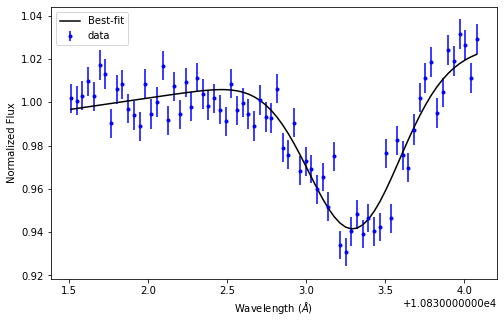

[-7.08864772e-02 -1.08386423e+02  1.08333056e+04  3.05375062e-01
  1.00985480e-02]


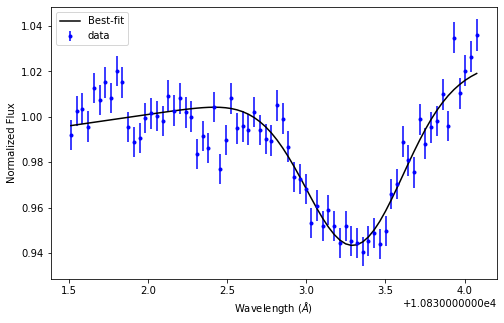

[-7.87417455e-02 -1.14399225e+02  1.08333261e+04  2.83011571e-01
  1.06536865e-02]


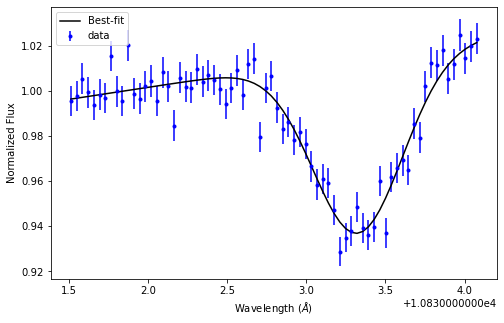

[-7.23592277e-02 -7.09210138e+01  1.08333156e+04  2.88212508e-01
  6.64037770e-03]


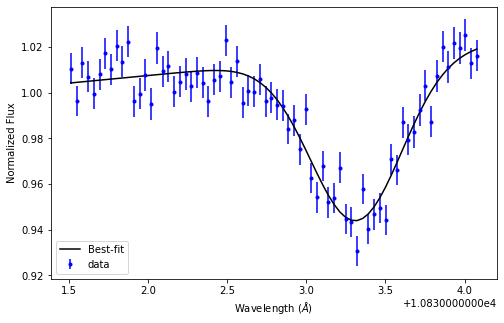

[-7.00503018e-02 -4.94520428e+01  1.08333002e+04  2.79318375e-01
  4.65811225e-03]


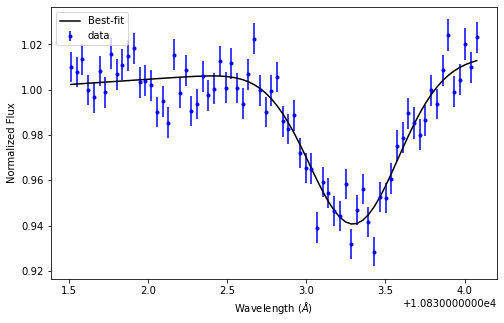

[-7.49815387e-02 -9.48714998e+01  1.08332989e+04  2.84193630e-01
  8.85125498e-03]


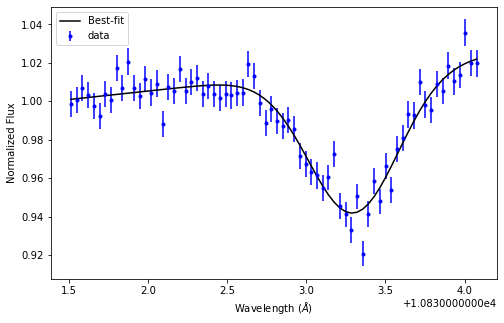

[-7.50020869e-02 -1.15293847e+02  1.08333020e+04  2.80917334e-01
  1.07364598e-02]


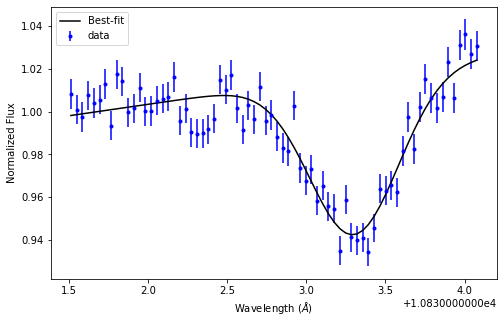

[-7.05451258e-02 -8.23277420e+01  1.08333068e+04  2.90066135e-01
  7.69296724e-03]


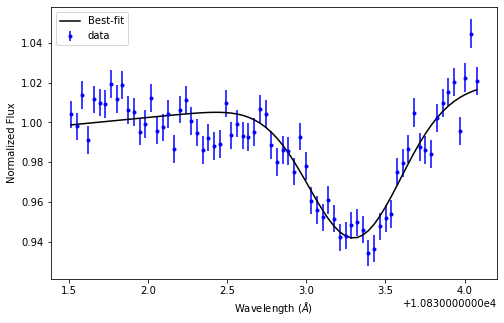

[-7.58146456e-02 -9.88426381e+01  1.08333077e+04  3.08474011e-01
  9.21783824e-03]


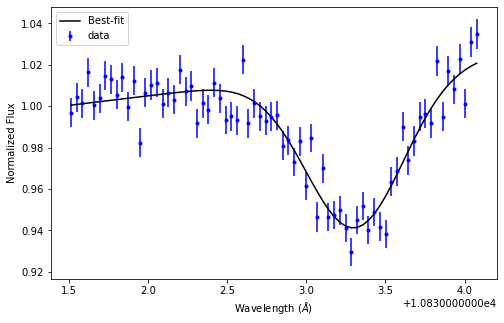

[-7.24757798e-02 -8.90914962e+01  1.08332956e+04  2.98907703e-01
  8.31732211e-03]


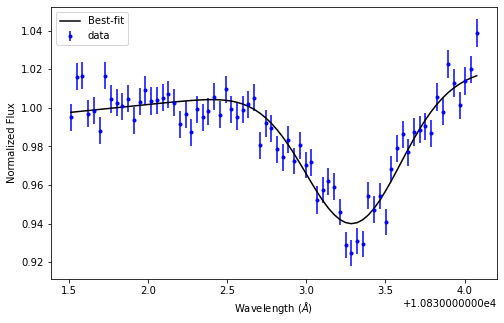

[-6.87203496e-02 -5.29734277e+01  1.08332813e+04  2.72210777e-01
  4.98326945e-03]


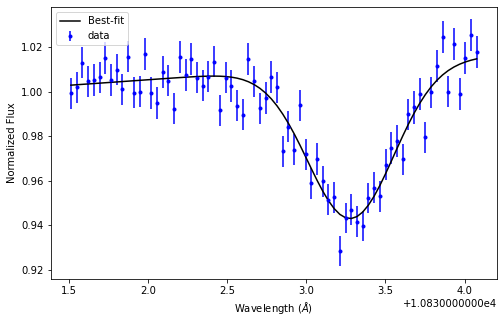

[-7.41590432e-02 -7.52972496e+01  1.08333051e+04  2.85990357e-01
  7.04420394e-03]


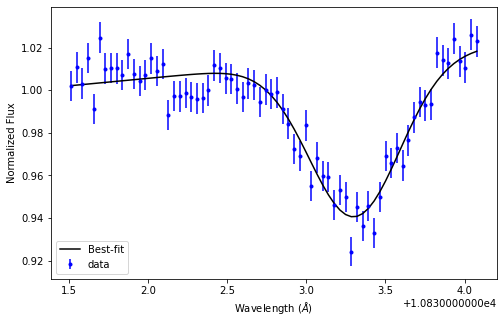

[-7.30314128e-02 -1.00472033e+02  1.08333097e+04  2.69417021e-01
  9.36790978e-03]


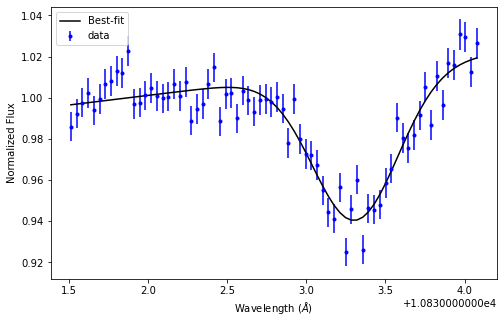

[-7.04707356e-02 -4.53446346e+01  1.08333010e+04  2.21248568e-01
  4.27863866e-03]


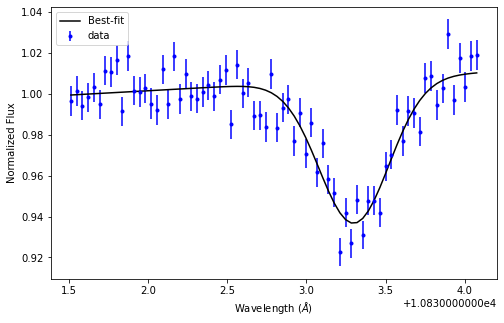

[-7.37923665e-02 -7.91883751e+01  1.08333078e+04  2.87678055e-01
  7.40312709e-03]


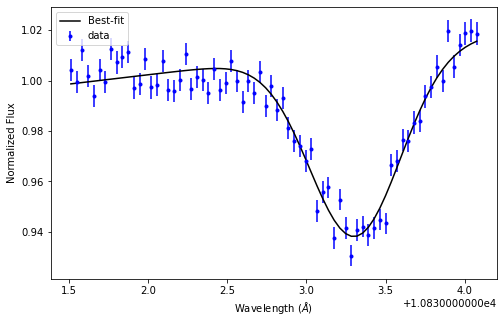

[-7.55298251e-02 -9.64600694e+01  1.08333241e+04  2.85804962e-01
  8.99744392e-03]


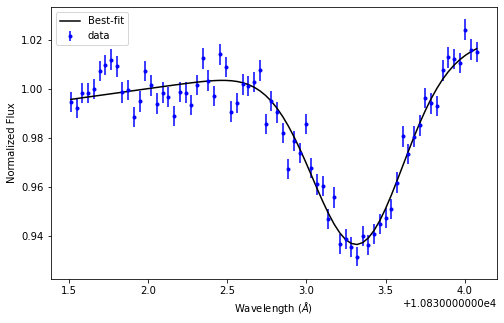

[-7.52482255e-02 -8.35201022e+01  1.08333174e+04  2.93831414e-01
  7.80289895e-03]


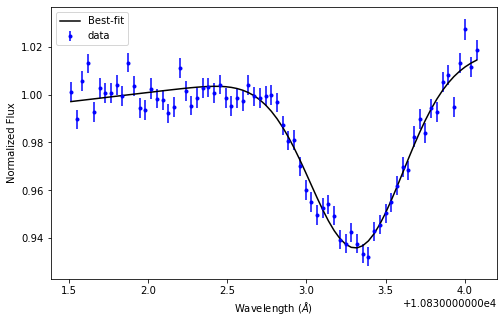

[-7.02032206e-02 -5.63332994e+01  1.08332924e+04  2.62113922e-01
  5.29295061e-03]


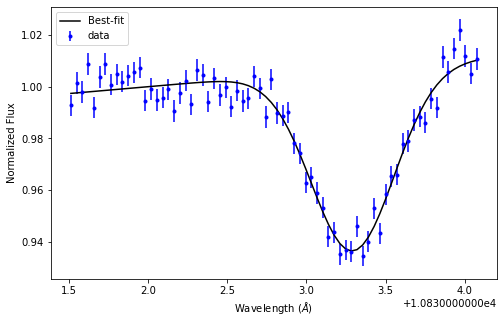

[-6.97359015e-02 -6.95941969e+01  1.08333203e+04  2.68579192e-01
  6.51739417e-03]


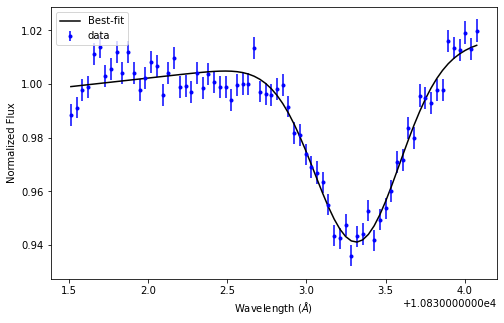

[-6.98667259e-02 -5.34251193e+01  1.08333176e+04  2.65509190e-01
  5.02455989e-03]


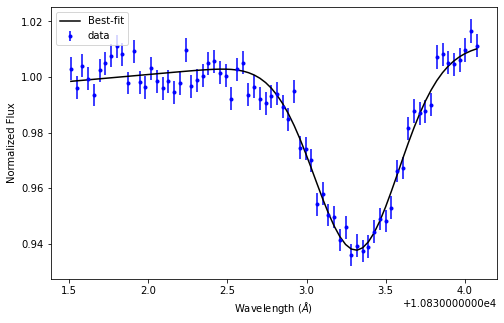

[-7.40879147e-02 -8.19149756e+01  1.08333215e+04  2.85442491e-01
  7.65461538e-03]


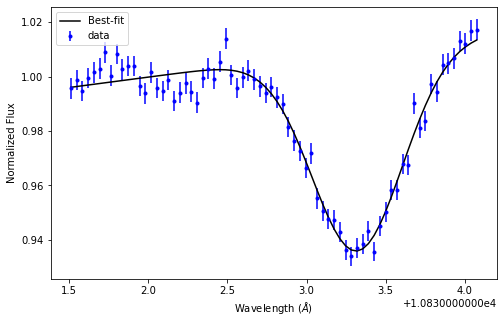

[-7.23621833e-02 -9.74229739e+01  1.08333046e+04  3.05775145e-01
  9.08623668e-03]


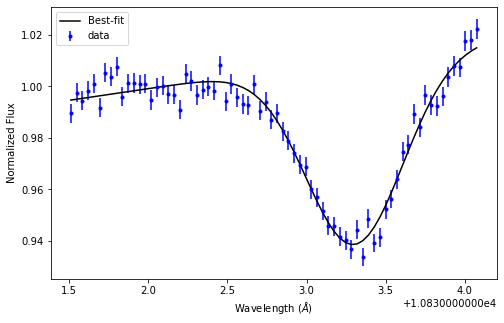

[-6.67724637e-02 -6.28473471e+01  1.08333070e+04  2.95930188e-01
  5.89419291e-03]


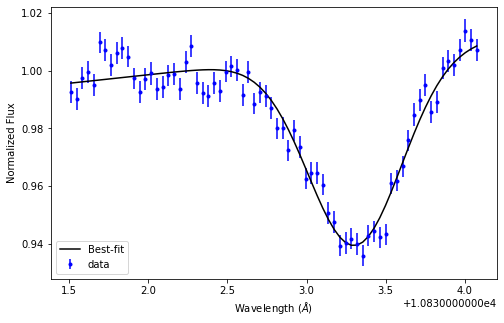

[-7.00455059e-02 -7.04617973e+01  1.08333035e+04  2.76424710e-01
  6.59698825e-03]


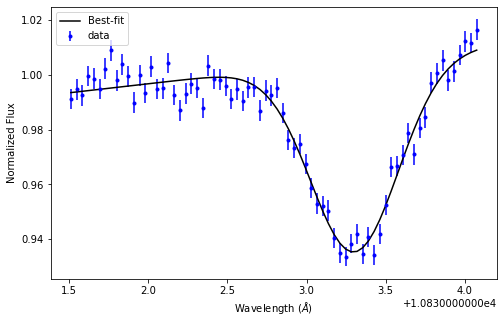

[-7.07291843e-02 -7.82665612e+01  1.08333022e+04  2.91161341e-01
  7.31763104e-03]


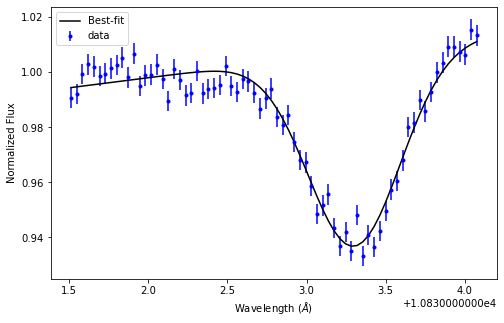

[-7.17901747e-02 -6.52669623e+01  1.08332925e+04  2.88828013e-01
  6.11788298e-03]


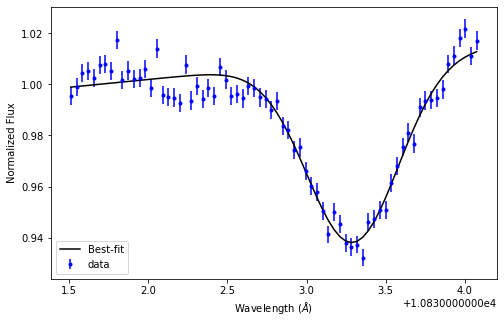

[-7.10215712e-02 -7.39897346e+01  1.08333176e+04  2.81757421e-01
  6.92296658e-03]


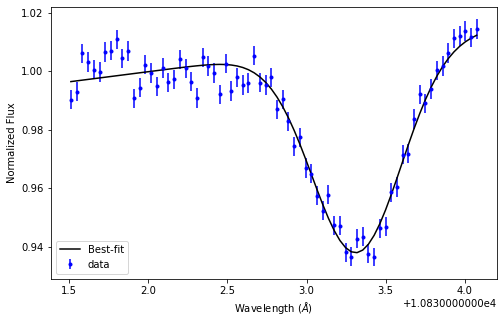

[-7.23144740e-02 -8.44986272e+01  1.08333117e+04  2.85166001e-01
  7.89316260e-03]


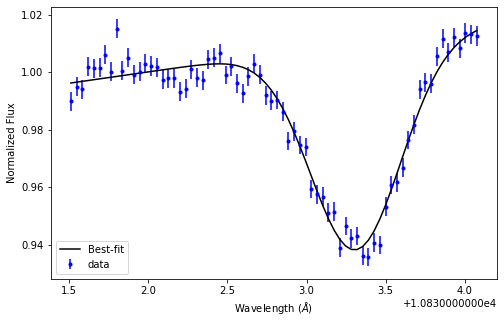

[-6.76082434e-02 -7.27822952e+01  1.08333013e+04  2.80338249e-01
  6.81120769e-03]


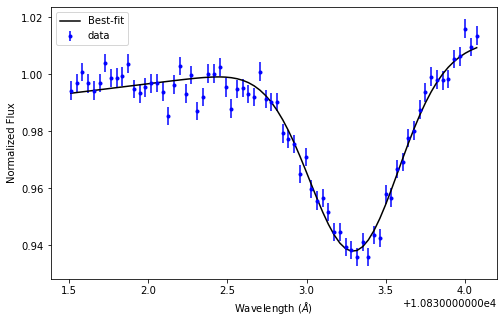

[-7.10350335e-02 -9.20986345e+01  1.08332975e+04  2.83308872e-01
  8.59442597e-03]


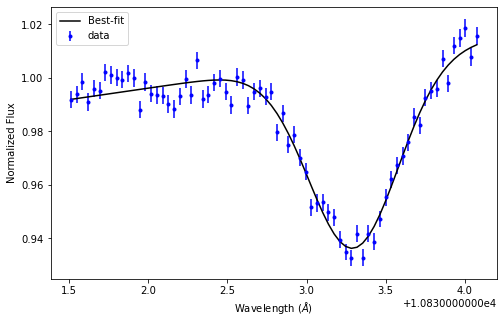

[-6.90889631e-02 -7.96136559e+01  1.08332995e+04  2.76930266e-01
  7.44200275e-03]


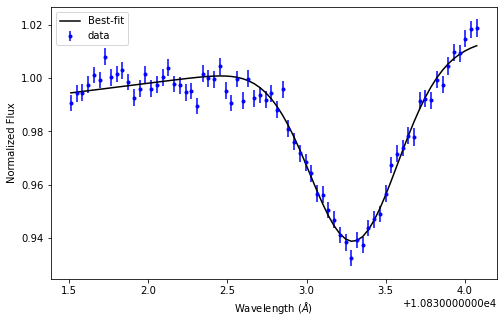

[-6.79882250e-02 -7.48736389e+01  1.08332890e+04  2.86001405e-01
  7.00445361e-03]


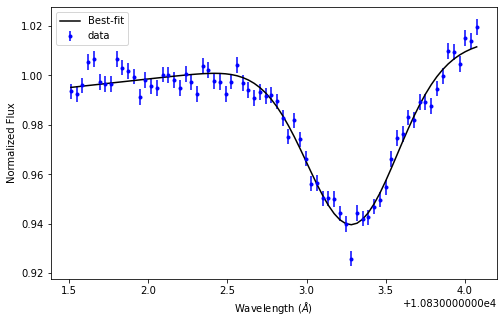

[-7.09193758e-02 -5.56640966e+01  1.08332904e+04  2.70430425e-01
  5.23115313e-03]


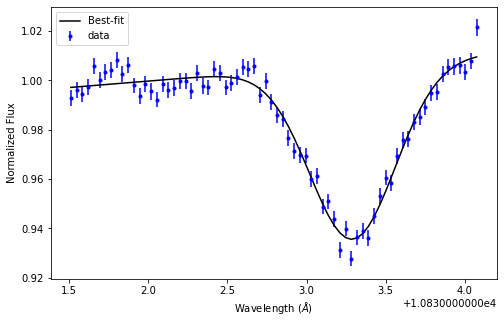

[-6.81697365e-02 -5.85960220e+01  1.08332935e+04  2.69235154e-01
  5.50176478e-03]


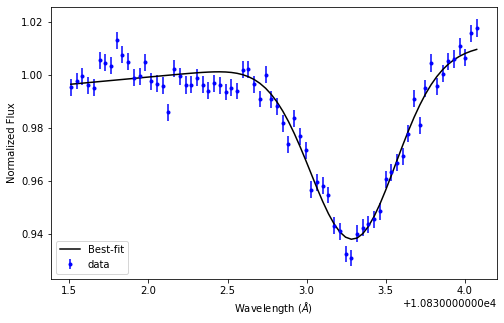

[-7.33259845e-02 -7.87022503e+01  1.08332995e+04  2.94202249e-01
  7.35799122e-03]


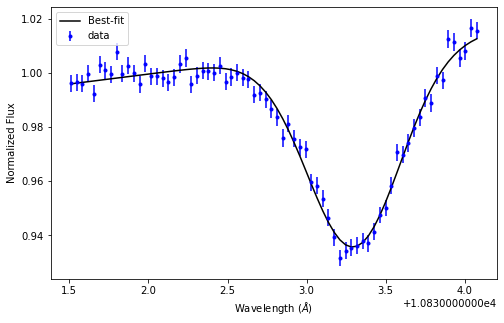

[-7.51391479e-02 -9.57594290e+01  1.08333131e+04  2.86658002e-01
  8.93265598e-03]


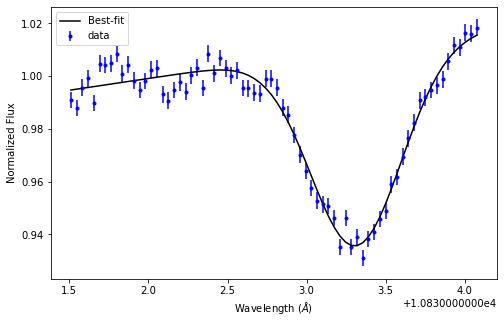

[-6.76922671e-02 -5.89626154e+01  1.08333102e+04  2.59217625e-01
  5.53551683e-03]


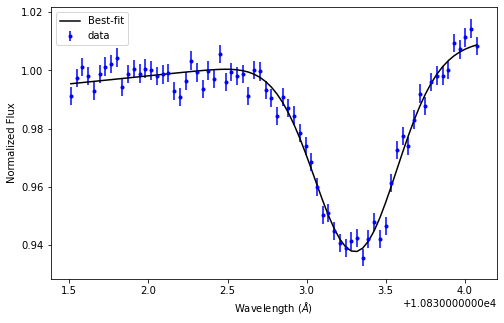

[-6.87200818e-02 -6.52975678e+01  1.08333034e+04  2.93732630e-01
  6.12048022e-03]


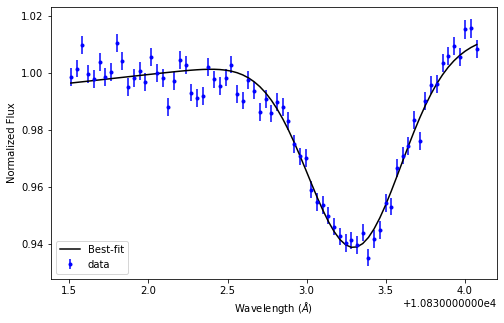

[-7.32240338e-02 -8.25214533e+01  1.08333097e+04  2.69647860e-01
  7.71054018e-03]


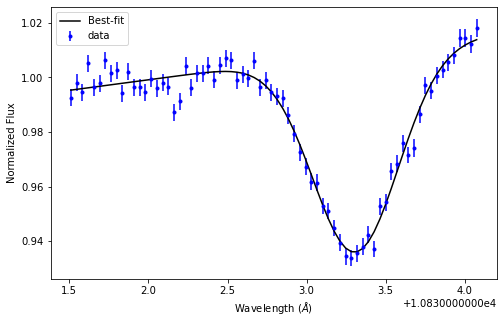

[-7.24346886e-02 -7.68815564e+01  1.08332968e+04  2.67451654e-01
  7.18990006e-03]


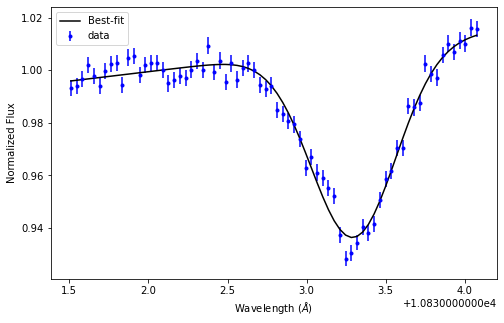

[-7.15219590e-02 -7.45666747e+01  1.08333017e+04  2.75223147e-01
  6.97624103e-03]


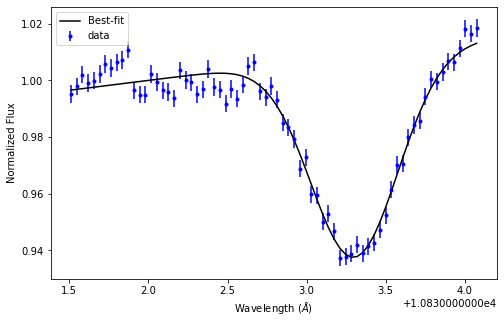

[-7.22996982e-02 -6.00915919e+01  1.08333018e+04  2.83660722e-01
  5.63987066e-03]


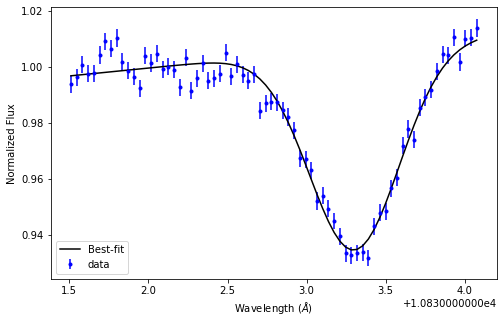

[-7.09664404e-02 -8.52749187e+01  1.08333158e+04  2.83203666e-01
  7.96478460e-03]


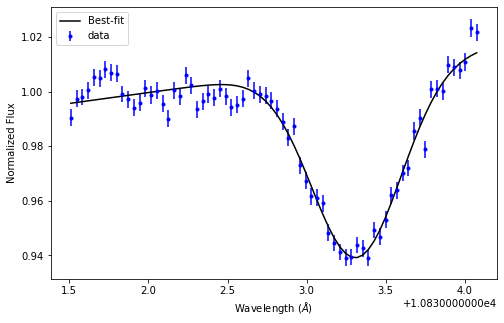

[-6.89682244e-02 -6.66269218e+01  1.08333228e+04  2.66077849e-01
  6.24297984e-03]


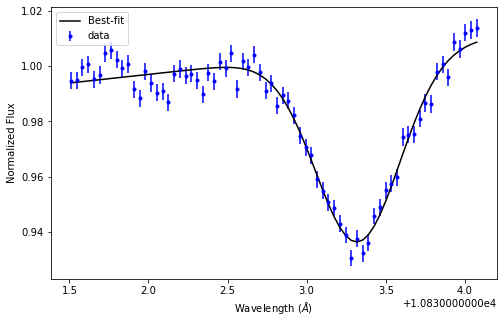

[-7.41157206e-02 -6.91355107e+01  1.08333046e+04  2.76778967e-01
  6.47472332e-03]


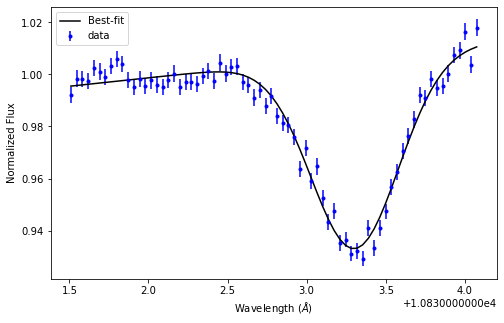

[-7.03308596e-02 -8.55725682e+01  1.08333018e+04  2.92309012e-01
  7.99219740e-03]


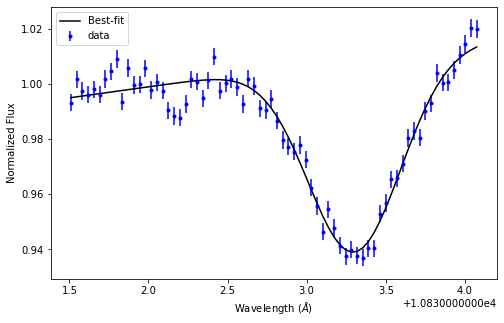

[-6.99564400e-02 -8.90922581e+01  1.08332932e+04  2.97195119e-01
  8.31713450e-03]


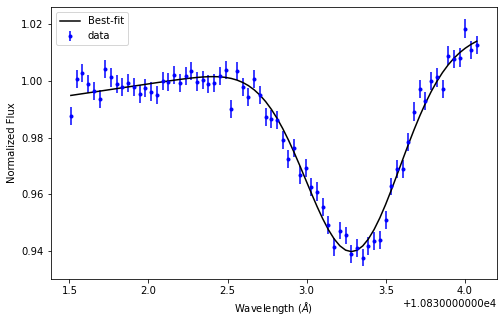

[-7.19316092e-02 -7.26685010e+01  1.08333129e+04  2.66629377e-01
  6.80095316e-03]


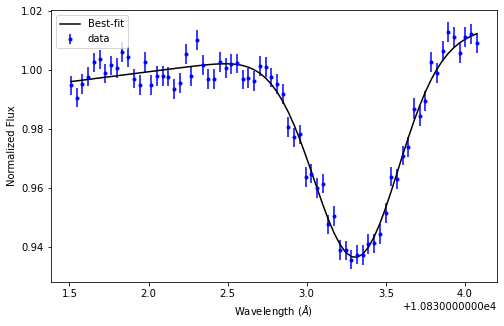

[-7.11779110e-02 -6.85742347e+01  1.08333006e+04  2.61382656e-01
  6.42281989e-03]


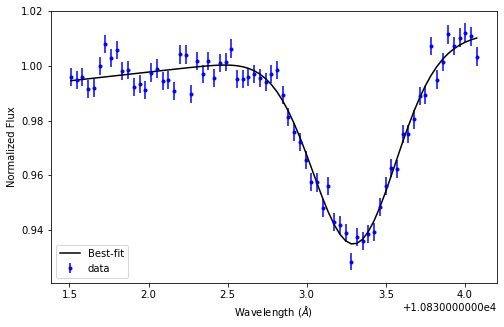

[-7.14278402e-02 -7.17970668e+01  1.08332949e+04  2.81633602e-01
  6.72052363e-03]


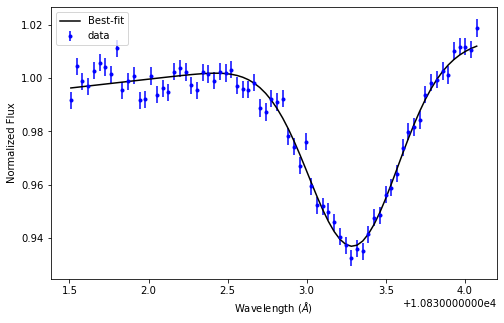

[-7.00135978e-02 -8.34797874e+01  1.08333028e+04  2.85657927e-01
  7.79903250e-03]


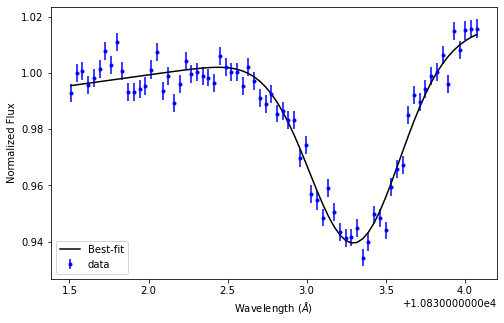

[-7.37220357e-02 -9.16922934e+01  1.08333174e+04  2.86066783e-01
  8.55717509e-03]


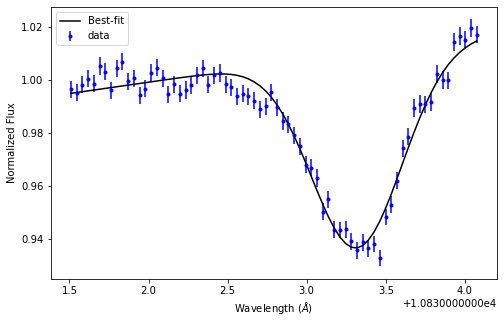

[-6.99563639e-02 -6.63365380e+01  1.08333057e+04  2.73941456e-01
  6.21652482e-03]


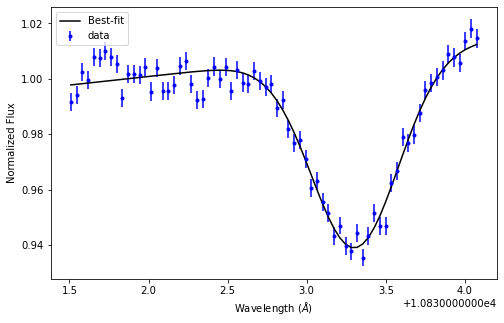

[-6.94614078e-02 -6.20512691e+01  1.08333046e+04  2.57016193e-01
  5.82055914e-03]


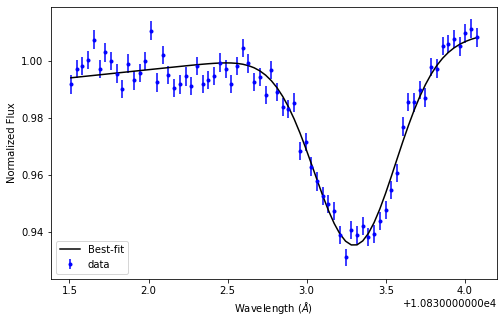

[-7.04035957e-02 -5.31087394e+01  1.08333065e+04  2.77847732e-01
  4.99522443e-03]


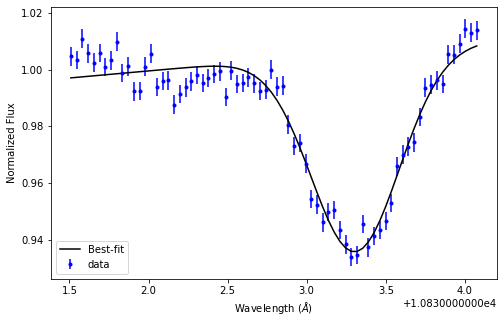

[-7.21671785e-02 -5.96870994e+01  1.08333002e+04  2.61457356e-01
  5.60256709e-03]


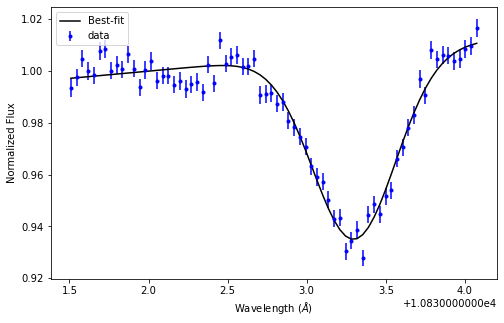

[-6.79901535e-02 -6.81415301e+01  1.08333257e+04  2.79409257e-01
  6.38301139e-03]


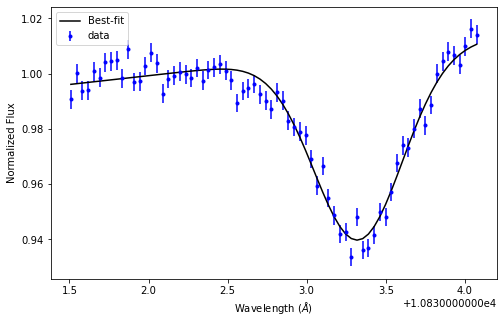

[-7.20329526e-02 -5.89191949e+01  1.08333112e+04  2.58177191e-01
  5.53167092e-03]


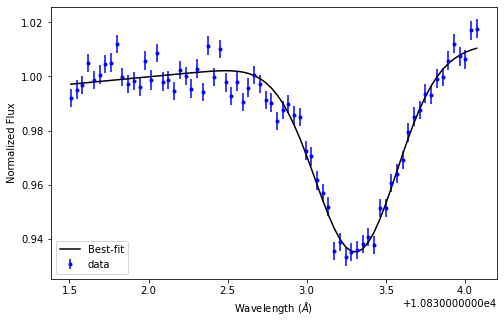

[-7.18467950e-02 -6.44310416e+01  1.08333124e+04  2.63691685e-01
  6.04065690e-03]


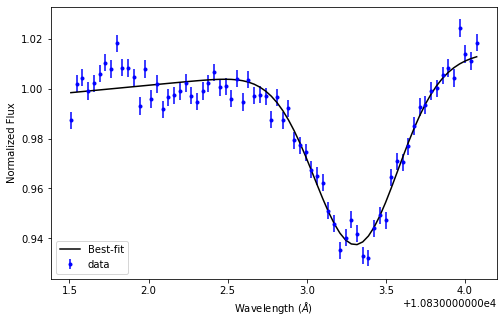

[-7.44031219e-02 -4.49490772e+01  1.08333208e+04  2.70336741e-01
  4.24228163e-03]


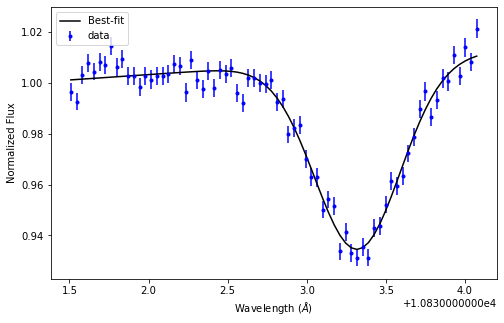

[-7.18390600e-02 -1.06366309e+02  1.08333195e+04  2.73737143e-01
  9.91166140e-03]


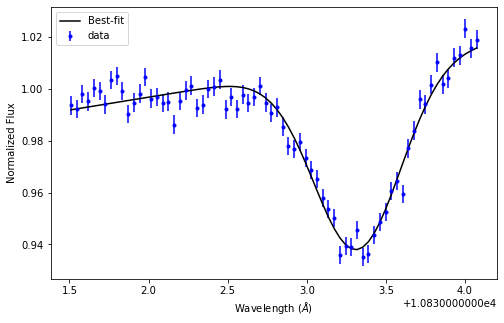

[-7.34672134e-02 -1.00798978e+02  1.08333351e+04  2.93254804e-01
  9.39792378e-03]


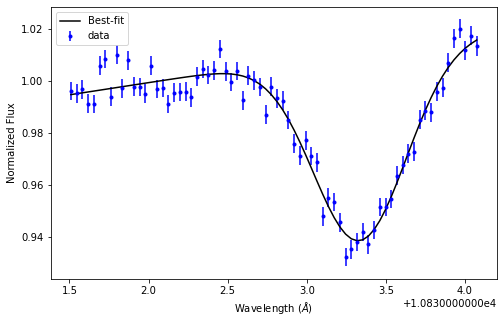

[-7.04438249e-02 -6.61395380e+01  1.08333131e+04  2.70269857e-01
  6.19817652e-03]


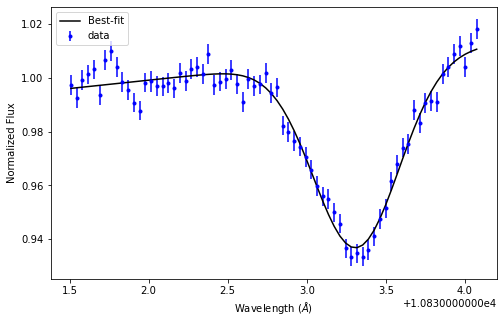

[-7.11675713e-02 -7.43150237e+01  1.08333087e+04  2.57242741e-01
  6.95285056e-03]


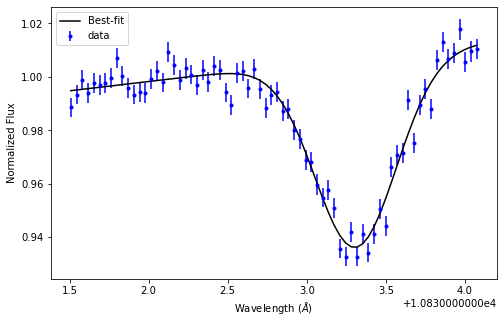

[-6.98534028e-02 -6.43215751e+01  1.08333212e+04  2.67786019e-01
  6.03038174e-03]


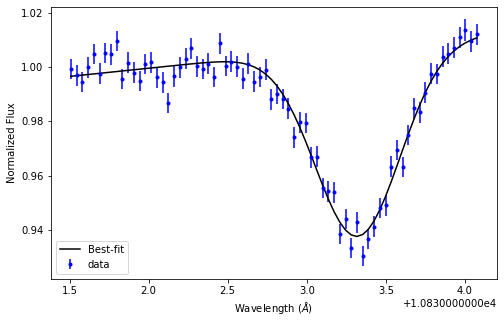

[-7.04635829e-02 -7.19890300e+01  1.08333039e+04  2.79281996e-01
  6.73832738e-03]


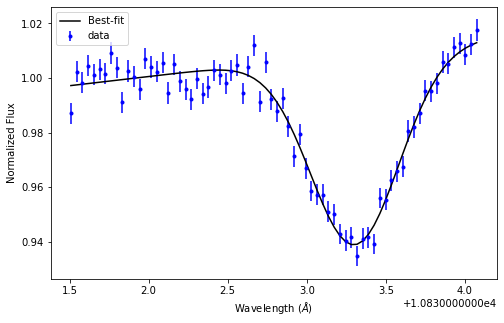

[-6.86122402e-02 -6.73597809e+01  1.08332952e+04  2.80973635e-01
  6.31098383e-03]


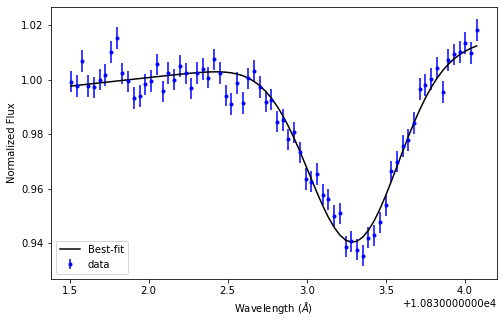

[-8.22261765e-02 -8.34885709e+01  1.08332930e+04  2.77767367e-01
  7.79972955e-03]


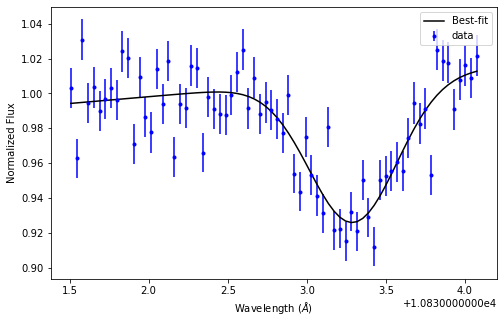

[-7.34697251e-02 -8.91111454e+01  1.08332964e+04  2.51957538e-01
  8.31927825e-03]


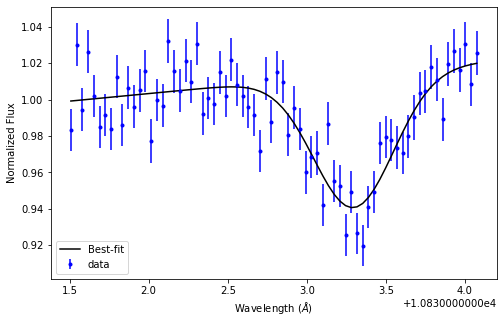

[-7.30387307e-02 -8.14314614e+01  1.08332752e+04  2.58610525e-01
  7.60986300e-03]


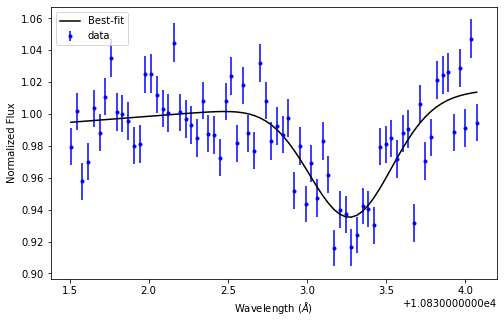

[-7.75704766e-02 -6.40460130e+01  1.08333078e+04  3.03459121e-01
  6.00556230e-03]


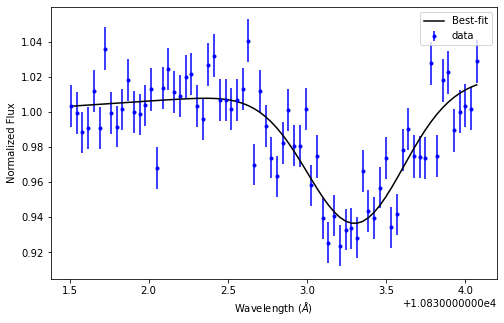

[-8.54348027e-02 -1.34642321e+02  1.08333001e+04  2.88717313e-01
  1.25224606e-02]


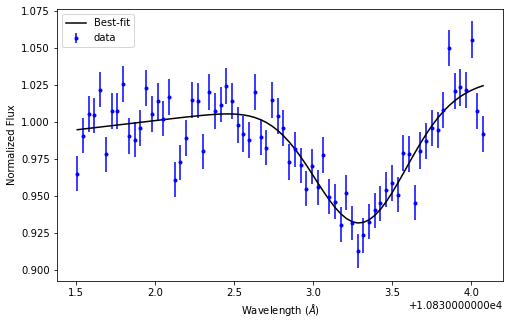

[-7.07579694e-02 -9.47062261e+01  1.08333158e+04  2.98607032e-01
  8.83518978e-03]


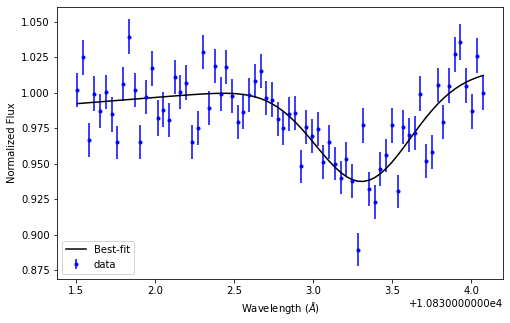

[-6.39808620e-02 -3.33742511e+01  1.08333216e+04  2.96309718e-01
  3.17414048e-03]


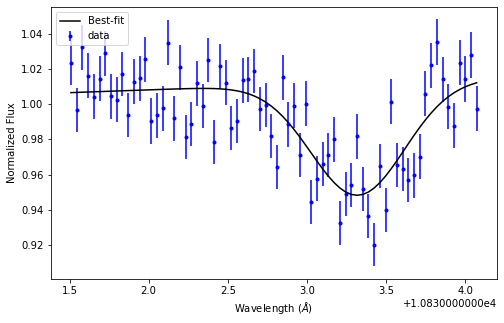

[-7.30976166e-02 -1.05105645e+02  1.08333042e+04  2.77056653e-01
  9.79534318e-03]


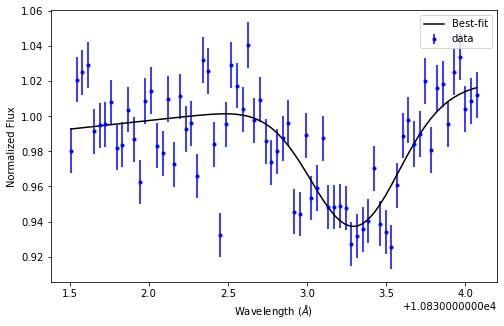

[-6.80044408e-02  1.66843357e+00  1.08332682e+04  2.45627789e-01
 -6.13922570e-05]


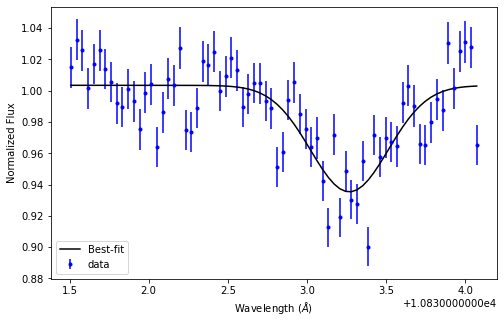

[-7.46681520e-02 -1.73174080e+02  1.08334000e+04  4.24225004e-01
  1.60801995e-02]


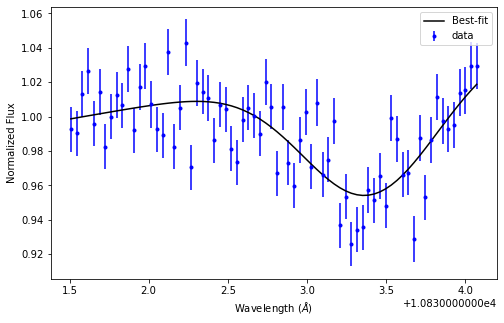

[-6.77310123e-02 -9.51682692e+01  1.08333384e+04  3.00695740e-01
  8.87896254e-03]


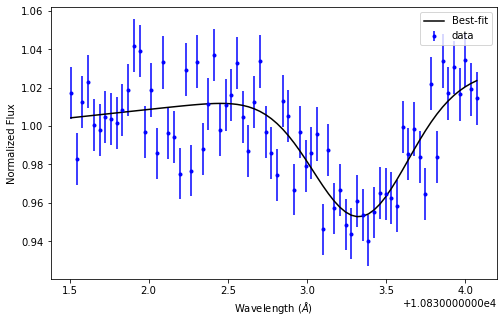

[-6.80782001e-02 -3.56615161e+00  1.08332441e+04  3.17676280e-01
  4.22589120e-04]


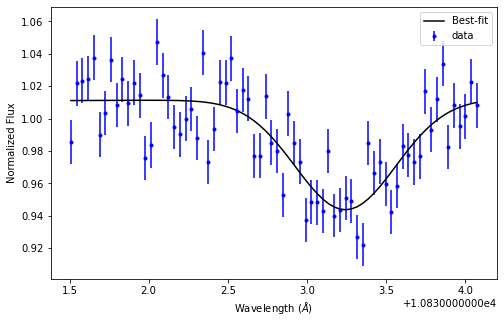

In [24]:
reload(AF)
lower_lim = 10831.5
upper_lim = 10834.1
guess_params = [-0.06, -100, 10833.3, 0.1, 0.008]
bounds_param = ((-np.inf, -np.inf, 10833.2, -np.inf, -np.inf),(0, np.inf, 10833.4, np.inf, np.inf)) 

#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    theta_HA, err_theta_HA = AF.fit_spctr_line(AF.gaussian_L, AF.eval_gaussian_L, lower_lim, upper_lim, guess_params, 
                                               bounds_param, total_lamda_HA, total_norm_spctr_HA, total_norm_err_HA, 'r')

    theta_HE, err_theta_HE = AF.fit_spctr_line(AF.gaussian_L, AF.eval_gaussian_L, lower_lim, upper_lim, guess_params, 
                                               bounds_param, total_lamda_HE, total_norm_spctr_HE, total_norm_err_HE, 'k')
#If there is one mode of observation
else:
    theta, err_theta = AF.fit_spctr_line(AF.gaussian_L, AF.eval_gaussian_L, lower_lim, upper_lim, guess_params, 
                                               bounds_param, total_lamda, total_norm_spctr, total_norm_err, 'r')


## Plotting best-fit parameters

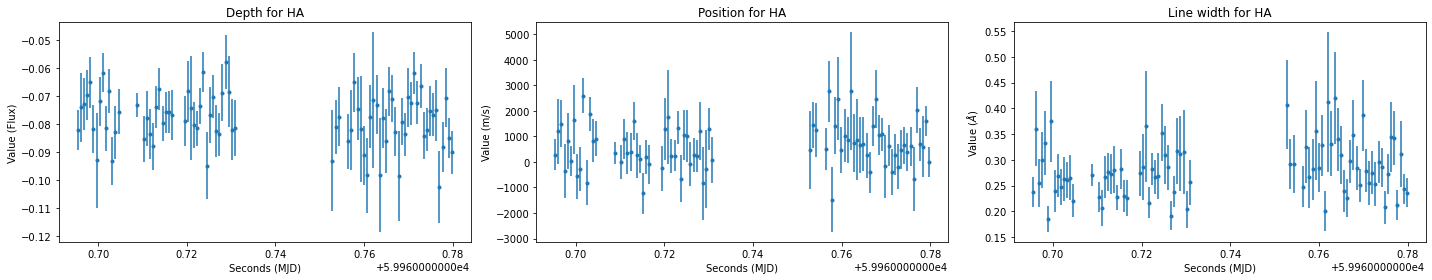

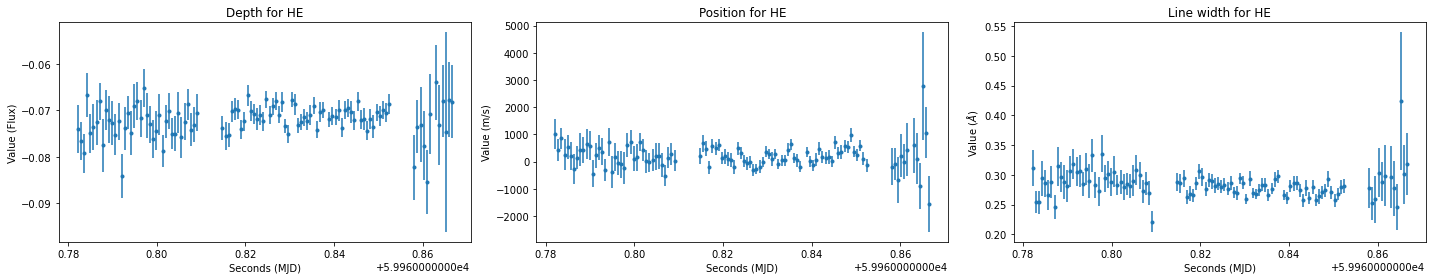

In [25]:
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    ref_He = 10833.3

    ax1.errorbar(date_HA, theta_HA[:, 0], yerr=err_theta_HA[:, 0], fmt='.')
    ax2.errorbar(date_HA, (theta_HA[:, 2]-ref_He)*3e8/ref_He, yerr=err_theta_HA[:, 2]*3e8/ref_He, fmt='.')
    ax3.errorbar(date_HA, theta_HA[:, 3], yerr=err_theta_HA[:, 3], fmt='.')
    ax1.set_xlabel('Seconds (MJD)')
    ax2.set_xlabel('Seconds (MJD)')
    ax3.set_xlabel('Seconds (MJD)')
    ax1.set_ylabel('Value (Flux)')
    ax2.set_ylabel('Value (m/s)')
    ax3.set_ylabel('Value ($\AA$)')
    ax1.set_title('Depth for HA')
    ax2.set_title('Position for HA')
    ax3.set_title('Line width for HA')
    
    fig.tight_layout()
    plt.show()

    fig, (ax4, ax5, ax6) = plt.subplots (1, 3, figsize=[20, 4])

    ax4.errorbar(date_HE, theta_HE[:, 0], yerr=err_theta_HE[:, 0], fmt='.')
    ax5.errorbar(date_HE, (theta_HE[:, 2]-ref_He)*3e8/ref_He, yerr=err_theta_HE[:, 2]*3e8/ref_He, fmt='.')
    ax6.errorbar(date_HE, theta_HE[:, 3], yerr=err_theta_HE[:, 3], fmt='.')
    ax4.set_xlabel('Seconds (MJD)')
    ax5.set_xlabel('Seconds (MJD)')
    ax6.set_xlabel('Seconds (MJD)')
    ax4.set_ylabel('Value (Flux)')
    ax5.set_ylabel('Value (m/s)')
    ax6.set_ylabel('Value ($\AA$)')
    ax4.set_title('Depth for HE')
    ax5.set_title('Position for HE')
    ax6.set_title('Line width for HE')

    fig.tight_layout()
    plt.show()
    
#If there one mode of observation.   
else:
    
    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    ref_He = 10833.3

    ax1.errorbar(date, theta[:, 0], yerr=err_theta[:, 0], fmt='.')
    ax2.errorbar(date, (theta[:, 2]-ref_He)*3e8/ref_He, yerr=err_theta[:, 2]*3e8/ref_He, fmt='.')
    ax3.errorbar(date, theta[:, 3], yerr=err_theta[:, 3], fmt='.')
    ax1.set_xlabel('Seconds (MJD)')
    ax2.set_xlabel('Seconds (MJD)')
    ax3.set_xlabel('Seconds (MJD)')
    ax1.set_ylabel('Value (flux)')
    ax2.set_ylabel('Value (m/s)')
    ax3.set_ylabel('Value ($\AA$)')
    ax1.set_title('Depth')
    ax2.set_title('Position')
    ax3.set_title('Line width')

    fig.tight_layout()
    plt.show()

In [26]:
###################################################################################
################# ADAPTED FROM WILLIAM DETHIER'S CODE #############################
###################################################################################

In [105]:
os.chdir('/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet')
import spectrum_model as spec_mod

In [144]:
##Defining the parameters for the planetary abosprtion simulation

# Helium density
density = 1.15e15

# Helium temperature -- thermal broadening
temperature = 10000

# Stellar rotation velocity -- non-thermal broadening
vsini = 2

# Reference medium for the wavelengths
medium= "VACUUM"

# Instrumental resolving power e.g. R_pow = 70000
# For non thermal broadening
# see spectrum_he() in spectrum_model.py to know where to write the argument
#R_pow# = 7000

# Microturbulence
# for non thermal broadening
# micro_t = 1

# You can change the damping to have Voigt profiles, by default you have Gaussian profiles
# Set to value greater than 0
# d_damping = 0

## Simulating on one spectrum to see what it looks like

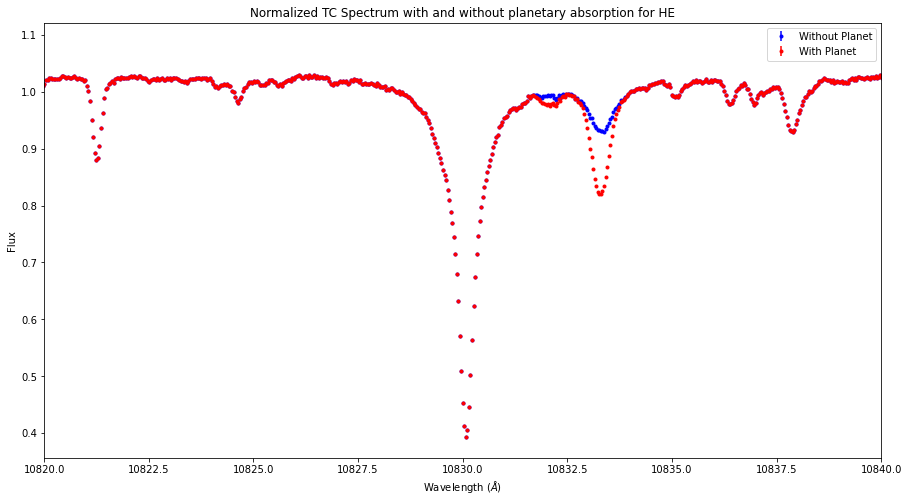

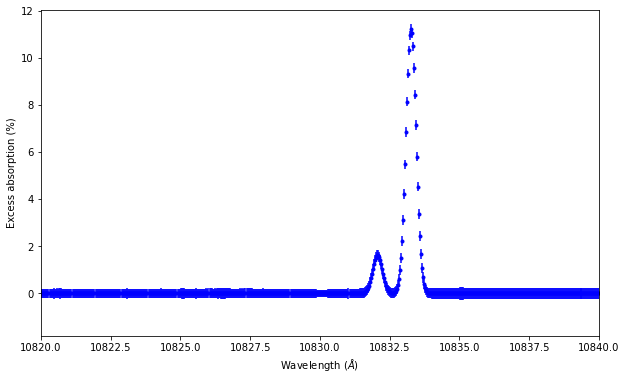

In [145]:
idx = 10

if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    theoretical_spctr = spec_mod.spectrum_he(total_lamda_HE[idx], total_norm_spctr_HE[idx], temperature, density, vsini, medium)
    theoretical_err = spec_mod.spectrum_he(total_lamda_HE[idx], total_norm_err_HE[idx], temperature, density, vsini, medium)

    plt.figure(figsize=[15, 8])
    plt.errorbar(total_lamda_HE[idx], total_norm_spctr_HE[idx], yerr = total_norm_err_HE[idx], fmt='b.', label='Without Planet')
    plt.errorbar(total_lamda_HE[idx], theoretical_spctr, yerr = theoretical_err, fmt='r.', label='With Planet')
    plt.xlabel('Wavelength ($\AA$)')
    plt.ylabel('Flux')
    plt.xlim([10820, 10840])
    plt.legend()
    plt.title('Normalized TC Spectrum with and without planetary absorption for HE')
    plt.savefig('/Users/samsonmercier/Desktop/Planet.pdf')
    plt.show()
    
    
    plt.figure(figsize=[10, 6])
    plt.errorbar(total_lamda_HE[idx], (total_norm_spctr_HE[idx]-theoretical_spctr)*100, yerr = np.sqrt(total_norm_err_HE[idx]**2+theoretical_err**2)*100, fmt='b.')
    plt.xlabel('Wavelength ($\AA$)')
    plt.ylabel('Excess absorption (%)')
    plt.xlim([10820, 10840])
    plt.show()

else:
    
    theoretical_spctr = spec_mod.spectrum_he(total_lamda[idx], total_norm_spctr[idx], temperature, density, vsini, medium)
    theoretical_err = spec_mod.spectrum_he(total_lamda[idx], total_norm_err[idx], temperature, density, vsini, medium)

    plt.figure(figsize=[15, 8])
    plt.errorbar(total_lamda[idx], total_norm_spctr[idx], yerr = total_norm_err[idx], fmt='b.', label='Without Planet')
    plt.errorbar(total_lamda[idx], theoretical_spctr, yerr = total_norm_err[idx], fmt='r.', label='With Planet')
    plt.xlabel('Wavelength ($\AA$)')
    plt.ylabel('Flux')
    plt.xlim([10820, 10840])
    plt.legend()
    plt.title('Normalized TC Spectrum with and without planetary absorption')
    plt.savefig('/Users/samsonmercier/Desktop/Planet.pdf')
    plt.show()
    
    plt.figure(figsize=[10, 6])
    plt.errorbar(total_lamda_HE[idx], (total_norm_spctr[idx]-theoretical_spctr)*100, yerr = np.sqrt(total_norm_err[idx]**2+theoretical_err**2)*100, fmt='b.')
    plt.xlabel('Wavelength ($\AA$)')
    plt.ylabel('Excess absorption (\%)')
    plt.xlim([10820, 10840])
    plt.legend()
    plt.show()




## Defining in-transit and out-of-transit parts of the timeseries

In [146]:
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):    
    
    #Defining the bounds of transit
    low_bound_HA = int(len(date_HA)/4)
    up_bound_HA = int(3*len(date_HA)/4)
    
    low_bound_HE = int(len(date_HE)/4)
    up_bound_HE = int(3*len(date_HE)/4)


    #Making the spectra
    #Before transit
    out_transit_spctr_HA_1 = AF.bound(date_HA[0], date_HA[low_bound_HA], date_HA, total_norm_spctr_HA)
    out_transit_err_HA_1 = AF.bound(date_HA[0], date_HA[low_bound_HA], date_HA, total_norm_err_HA)
    #In transit
    in_transit_spctr_HA = AF.bound(date_HA[low_bound_HA], date_HA[up_bound_HA], date_HA, total_norm_spctr_HA)
    in_transit_err_HA = AF.bound(date_HA[low_bound_HA], date_HA[up_bound_HA], date_HA, total_norm_err_HA)
    #After transit
    out_transit_spctr_HA_2 = AF.bound(date_HA[up_bound_HA], date_HA[-1], date_HA, total_norm_spctr_HA)
    out_transit_err_HA_2 = AF.bound(date_HA[up_bound_HA], date_HA[-1], date_HA, total_norm_err_HA)
    #Out-of-transit
    out_transit_spctr_HA = np.concatenate((out_transit_spctr_HA_1, out_transit_spctr_HA_2)) 
    out_transit_err_HA = np.concatenate((out_transit_err_HA_1, out_transit_err_HA_2)) 

    #Before transit
    out_transit_spctr_HE_1 = AF.bound(date_HE[0], date_HE[low_bound_HE], date_HE, total_norm_spctr_HE)
    out_transit_err_HE_1 = AF.bound(date_HE[0], date_HE[low_bound_HE], date_HE, total_norm_err_HE)
    #In transit
    in_transit_spctr_HE = AF.bound(date_HE[low_bound_HE], date_HE[up_bound_HE], date_HE, total_norm_spctr_HE)
    in_transit_err_HE = AF.bound(date_HE[low_bound_HE], date_HE[up_bound_HE], date_HE, total_norm_err_HE)
    #After transit
    out_transit_spctr_HE_2 = AF.bound(date_HE[up_bound_HE], date_HE[-1], date_HE, total_norm_spctr_HE)
    out_transit_err_HE_2 = AF.bound(date_HE[up_bound_HE], date_HE[-1], date_HE, total_norm_err_HE)
    #Out-of-transit
    out_transit_spctr_HE = np.concatenate((out_transit_spctr_HE_1, out_transit_spctr_HE_2)) 
    out_transit_err_HE = np.concatenate((out_transit_err_HE_1, out_transit_err_HE_2)) 

    #Making the corresponding wavelengths
    #Before transit
    out_transit_lamda_HA_1 = AF.bound(date_HA[0], date_HA[low_bound_HA], date_HA, total_lamda_HA)
    #In transit
    in_transit_lamda_HA = AF.bound(date_HA[low_bound_HA], date_HA[up_bound_HA], date_HA, total_lamda_HA)
    #After transit
    out_transit_lamda_HA_2 = AF.bound(date_HA[up_bound_HA], date_HA[-1], date_HA, total_lamda_HA)
    #Out-of-transit
    out_transit_lamda_HA = np.concatenate((out_transit_lamda_HA_1, out_transit_lamda_HA_2)) 

    #Before transit
    out_transit_lamda_HE_1 = AF.bound(date_HE[0], date_HE[low_bound_HE], date_HE, total_lamda_HE)
    #In transit
    in_transit_lamda_HE = AF.bound(date_HE[low_bound_HE], date_HE[up_bound_HE], date_HE, total_lamda_HE)
    #After transit
    out_transit_lamda_HE_2 = AF.bound(date_HE[up_bound_HE], date_HE[-1], date_HE, total_lamda_HE)
    #Out-of-transit
    out_transit_lamda_HE = np.concatenate((out_transit_lamda_HE_1, out_transit_lamda_HE_2)) 

    
    #Making the timestamps in transit -- for plotting purposes later
    date_in_transit_HA = AF.bound(date_HA[low_bound_HA], date_HA[up_bound_HA], date_HA, date_HA)
    date_in_transit_HE = AF.bound(date_HE[low_bound_HE], date_HE[up_bound_HE], date_HE, date_HE)

else:    
    #Defining the bounds of transit
    low_bound = int(len(date)/4)
    up_bound = int(3*len(date)/4)
 
    #Making the spectra
    out_transit_spctr_1 = AF.bound(date[0], date[low_bound], date, total_norm_spctr)
    out_transit_err_1 = AF.bound(date[0], date[low_bound], date, total_norm_err)

    in_transit_spctr = AF.bound(date[low_bound], date[up_bound], date, total_norm_spctr)
    in_transit_err = AF.bound(date[low_bound], date[up_bound], date, total_norm_err)

    out_transit_spctr_2 = AF.bound(date[up_bound], date[-1], date, total_norm_spctr)
    out_transit_err_2 = AF.bound(date[up_bound], date[-1], date, total_norm_err)

    out_transit_spctr = np.concatenate((out_transit_norm_spctr_1, out_transit_norm_spctr_2)) 
    out_transit_err = np.concatenate((out_transit_norm_err_1, out_transit_norm_err_2)) 

    #Making the corresponding wavelengths
    out_transit_lamda_1 = AF.bound(date[0], date[low_bound], date, total_lamda)
    in_transit_lamda = AF.bound(date[low_bound], date[up_bound], date, total_lamda)
    out_transit_lamda_2 = AF.bound(date[up_bound], date[-1], date, total_lamda)
    out_transit_lamda = np.concatenate((out_transit_lamda_1, out_transit_lamda_2)) 

    #Making the timestamps in transit -- for plotting purposes later
    date_in_transit = AF.bound(date[low_bound], date[up_bound], date, date)


## Adding the planetary signal during the transit

In [147]:
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    planet_in_transit_spctr_HA = np.ones(in_transit_spctr_HA.shape)
    planet_in_transit_err_HA = np.ones(in_transit_err_HA.shape)
    
    planet_in_transit_spctr_HE = np.ones(in_transit_spctr_HE.shape)
    planet_in_transit_err_HE = np.ones(in_transit_err_HE.shape)

    for i in range(len(in_transit_spctr_HA)):

        planet_in_transit_spctr_HA[i] = spec_mod.spectrum_he(in_transit_lamda_HA[i], in_transit_spctr_HA[i], temperature, density, vsini, medium)
        planet_in_transit_err_HA[i] = spec_mod.spectrum_he(in_transit_lamda_HA[i], in_transit_err_HA[i], temperature, density, vsini, medium)
    
    for i in range(len(in_transit_spctr_HE)):

        planet_in_transit_spctr_HE[i] = spec_mod.spectrum_he(in_transit_lamda_HE[i], in_transit_spctr_HE[i], temperature, density, vsini, medium)
        planet_in_transit_err_HE[i] = spec_mod.spectrum_he(in_transit_lamda_HE[i], in_transit_err_HE[i], temperature, density, vsini, medium)

        
else:
    
    planet_in_transit_spctr = np.ones(in_transit_spctr.shape)
    planet_in_transit_err = np.ones(in_transit_err.shape)
        
    for i in range(len(in_transit_spctr)):

        planet_in_transit_spctr[i] = spec_mod.spectrum_he(in_transit_lamda[i], in_transit_spctr[i], temperature, density, vsini, medium)
        planet_in_transit_err[i] = spec_mod.spectrum_he(in_transit_lamda[i], in_transit_err[i], temperature, density, vsini, medium)



## Getting the master spectrum in and out of transit

In [148]:
planet_in_transit_err_HA.shape[0]

71

In [149]:
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    #In-transit
    master_planet_intransit_HA = np.mean(planet_in_transit_spctr_HA, axis=0)
    master_err_intransit_HA = np.sqrt(np.sum(planet_in_transit_err_HA**2, axis=0))/(planet_in_transit_err_HA.shape[0])**2
    master_lamda_intransit_HA = np.mean(in_transit_lamda_HA, axis=0)
    
    master_planet_intransit_HE = np.mean(planet_in_transit_spctr_HE, axis=0)
    master_err_intransit_HE = np.sqrt(np.sum(planet_in_transit_err_HE**2, axis=0))/(planet_in_transit_err_HE.shape[0])**2
    master_lamda_intransit_HE = np.mean(in_transit_lamda_HE, axis=0)

    #Out-of-transit
    master_outtransit_HA = np.mean(out_transit_spctr_HA, axis=0)
    master_err_outtransit_HA = np.sqrt(np.sum(out_transit_err_HA**2, axis=0))/(out_transit_err_HA.shape[0])**2
    master_lamda_outtransit_HA = np.mean(out_transit_lamda_HA, axis=0)
    
    master_outtransit_HE = np.mean(out_transit_spctr_HE, axis=0)
    master_err_outtransit_HE = np.sqrt(np.sum(out_transit_err_HE**2, axis=0))/(out_transit_err_HE.shape[0])**2
    master_lamda_outtransit_HE = np.mean(out_transit_lamda_HE, axis=0)
    
else:
    
    #In-transit
    master_planet_intransit = np.mean(planet_in_transit_spctr, axis=0)
    master_err_intransit = np.sqrt(np.sum(planet_in_transit_err**2, axis=0))/(planet_in_transit_err.shape[0])**2
    master_lamda_intransit = np.mean(in_transit_lamda, axis=0)

    #Out-of-transit
    master_outtransit = np.mean(out_transit_spctr, axis=0)
    master_err_outtransit = np.sqrt(np.sum(out_transit_err**2, axis=0))/(out_transit_err.shape[0])**2
    master_lamda_outtransit = np.mean(out_transit_lamda, axis=0)
    

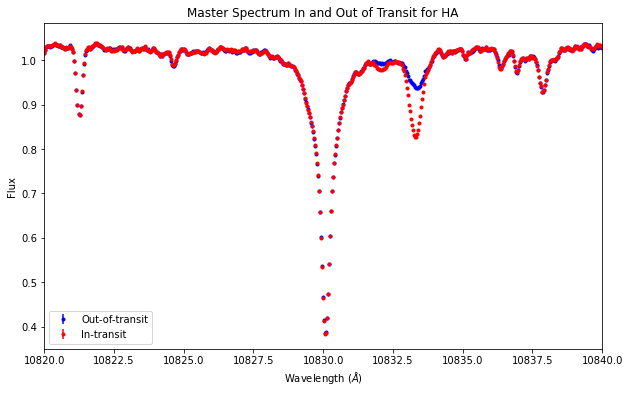

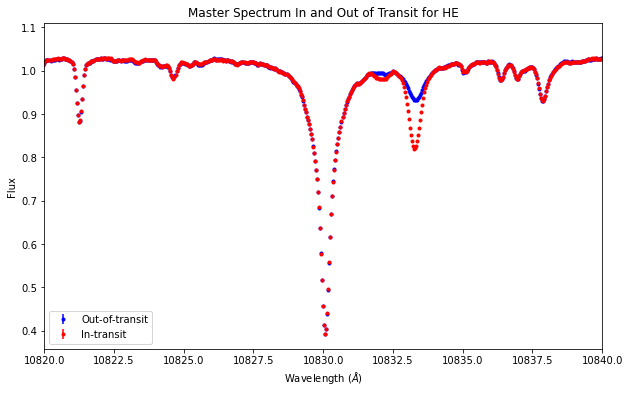

In [150]:
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    #Plotting the master spectra 

    plt.figure(figsize=[10, 6])
    plt.errorbar(master_lamda_outtransit_HA, master_outtransit_HA, yerr = master_err_outtransit_HA, fmt='b.', label='Out-of-transit')
    plt.errorbar(master_lamda_intransit_HA, master_planet_intransit_HA, yerr = master_err_intransit_HA, fmt='r.', label='In-transit')
    plt.legend()
    plt.xlabel('Wavelength ($\AA$)')
    plt.ylabel('Flux')
    plt.title('Master Spectrum In and Out of Transit for HA')
    plt.xlim([10820, 10840])
    plt.show()

    plt.figure(figsize=[10, 6])
    plt.errorbar(master_lamda_outtransit_HE, master_outtransit_HE, yerr = master_err_outtransit_HE, fmt='b.', label='Out-of-transit')
    plt.errorbar(master_lamda_intransit_HE, master_planet_intransit_HE, yerr = master_err_intransit_HE, fmt='r.', label='In-transit')
    plt.legend()
    plt.xlabel('Wavelength ($\AA$)')
    plt.ylabel('Flux')
    plt.title('Master Spectrum In and Out of Transit for HE')
    plt.xlim([10820, 10840])
    plt.show()
    
else:
    #Plotting the master spectra 

    plt.figure(figsize=[10, 6])
    plt.errorbar(master_lamda_outtransit, master_outtransit, yerr = master_err_outtransit, fmt='b.', label='Out-of-transit')
    plt.errorbar(master_lamda_intransit, master_planet_intransit, yerr = master_err_intransit, fmt='r.', label='In-transit')
    plt.legend()
    plt.xlabel('Wavelength ($\AA$)')
    plt.ylabel('Flux')
    plt.title('Master Spectrum In and Out of Transit')
    plt.xlim([10820, 10840])
    plt.show()


## Retrieving the planetary parameters once again

In [161]:
##Defining the difference between the in-transit and master out-of-transit spectra to get 
#a time series of the planet's spectrum
offset = 1
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    diff_HA = np.ones(planet_in_transit_spctr_HA.shape)
    diff_HA_err = np.ones(planet_in_transit_err_HA.shape)
    for i in range(len(planet_in_transit_spctr_HA)):
        diff_HA[i] = offset+(master_outtransit_HA - planet_in_transit_spctr_HA[i])/master_outtransit_HA
        diff_HA_err[i] = np.sqrt(((master_outtransit_HA**2 * planet_in_transit_err_HA[i]**2)+(planet_in_transit_spctr_HA[i]**2 * master_err_outtransit_HA**2))/master_outtransit_HA**4)

    diff_HE = np.ones(planet_in_transit_spctr_HE.shape)
    diff_HE_err = np.ones(planet_in_transit_err_HE.shape)
    for i in range(len(planet_in_transit_spctr_HE)):
        diff_HE[i] = offset+(master_outtransit_HE - planet_in_transit_spctr_HE[i])/master_outtransit_HE
        diff_HE_err[i] = np.sqrt(((master_outtransit_HE**2 * planet_in_transit_err_HE[i]**2)+(planet_in_transit_spctr_HE[i]**2 * master_err_outtransit_HE**2))/master_outtransit_HE**4)

else:
    
    diff = np.ones(planet_in_transit_spctr.shape)
    diff_err = np.ones(planet_in_transit_err.shape)
    for i in range(len(planet_in_transit_spctr)):
        diff[i] = (master_outtransit - planet_in_transit_spctr[i])/master_outtransit
        #diff_err[i] = np.sqrt(planet_in_transit_err[i]**2 + master_err_outtransit**2)
        diff_err[i] = np.sqrt(((master_outtransit**2 * planet_in_transit_err[i]**2)+(planet_in_transit_spctr[i]**2 * master_err_outtransit**2))/master_outtransit**4)



(10820.0, 10840.0)

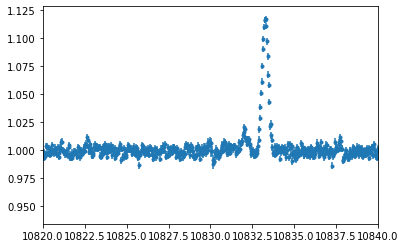

In [162]:
plt.errorbar(in_transit_lamda_HA[2], diff_HA[2], yerr = diff_HA_err[2], fmt='.')
plt.xlim([10820, 10840])

In [163]:
diff_HA_err.shape

(71, 4084)

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03935517e+04 -1.03330975e+15]


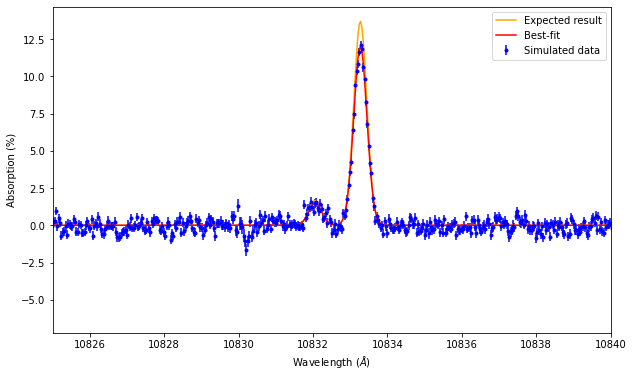

[ 9.84951542e+03 -1.01644563e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


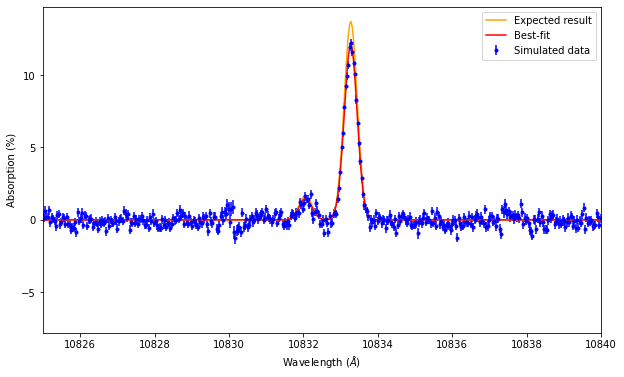

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04089166e+04 -1.02942922e+15]


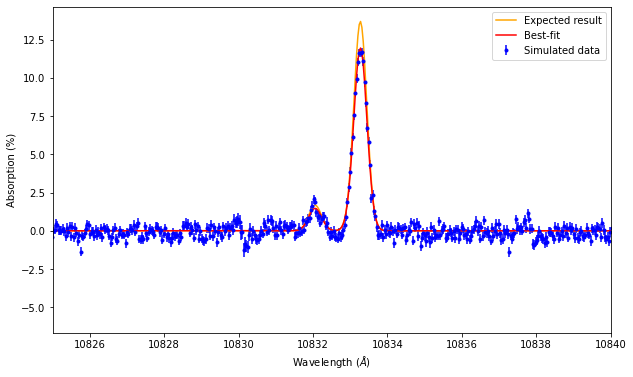

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.05066991e+04 -1.03871484e+15]


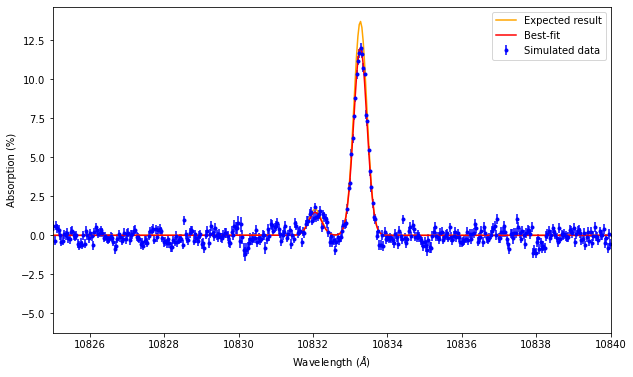

[ 1.01408158e+04 -1.02851933e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


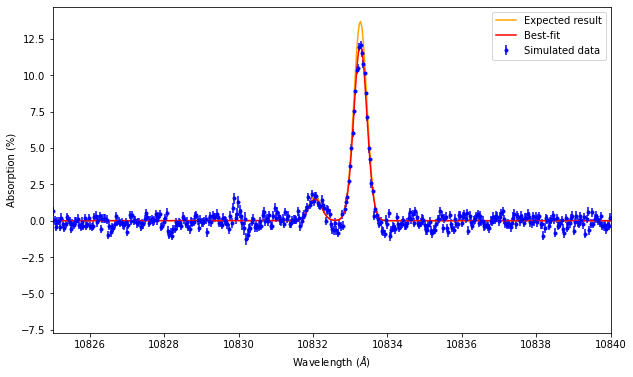

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04190296e+04 -1.02887240e+15]


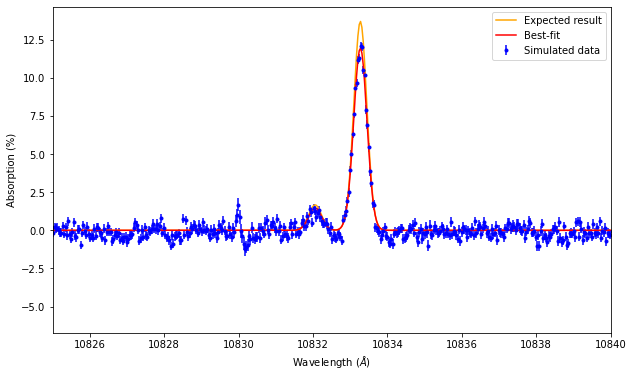

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03798715e+04 -1.03271326e+15]


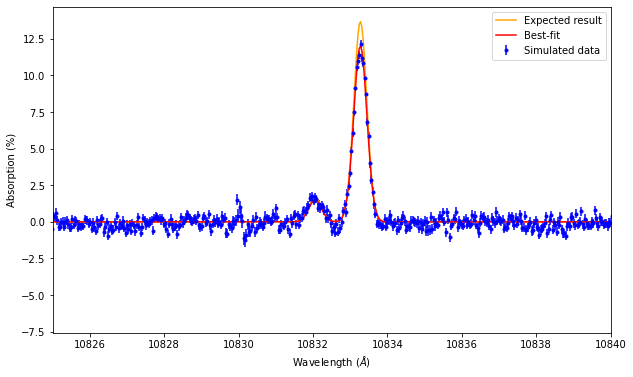

[ 1.08422534e+04 -1.02572630e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


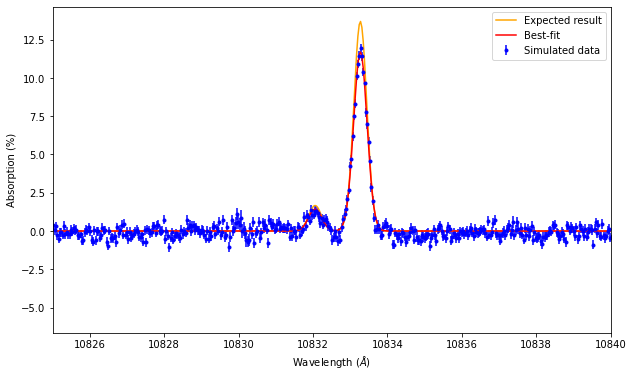

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04266439e+04 -1.03131257e+15]


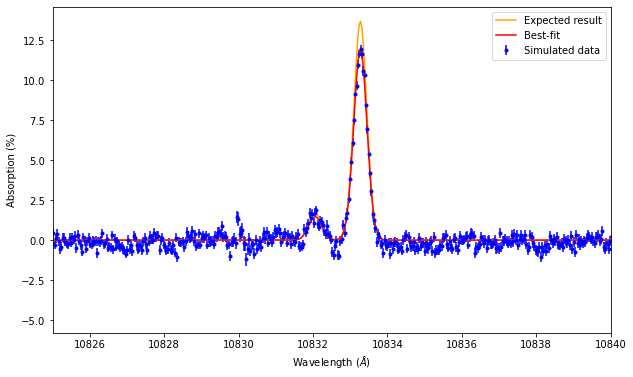

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.61068950e+03 -1.01086315e+15]


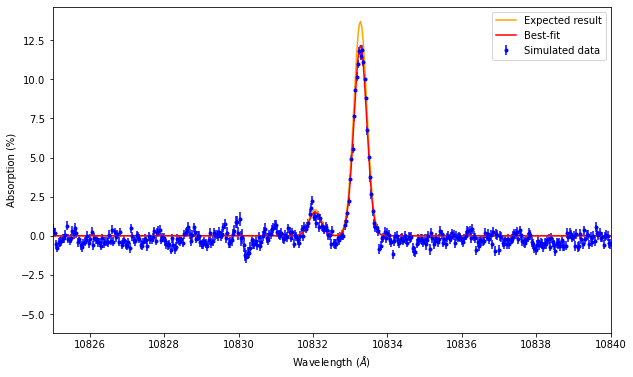

[ 9.99774073e+03 -1.02095195e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


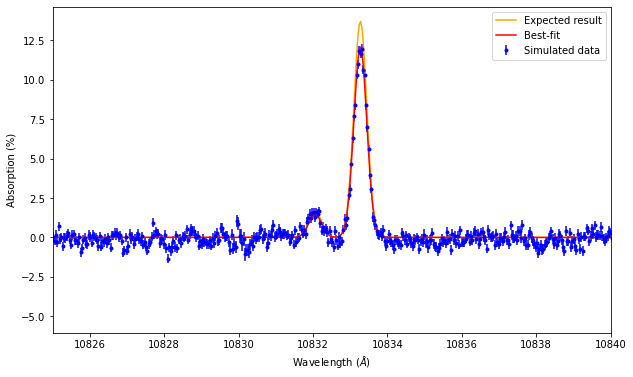

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.80715918e+03 -1.02617316e+15]


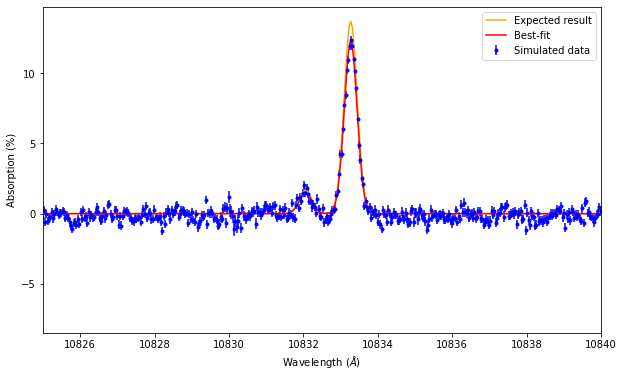

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.02989396e+04 -1.03411509e+15]


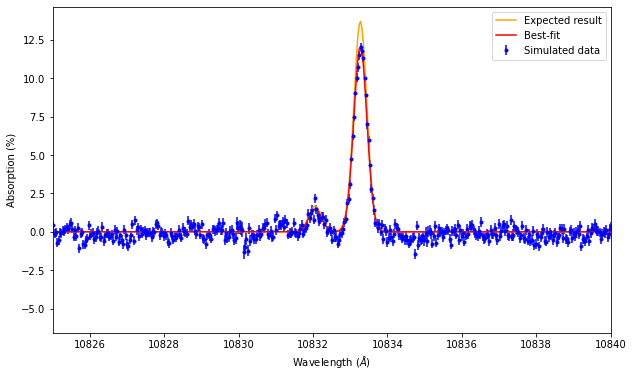

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00533631e+04 -1.02183344e+15]


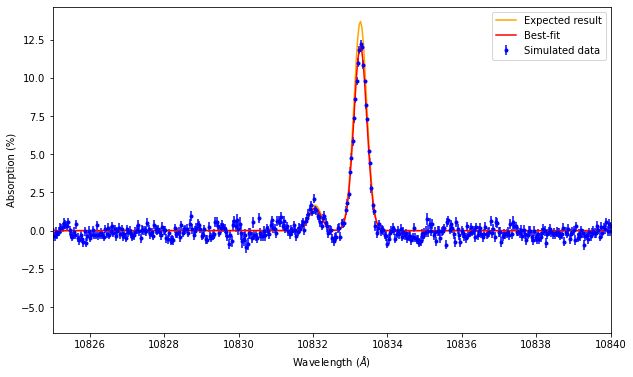

[ 1.01369894e+04 -1.01143104e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


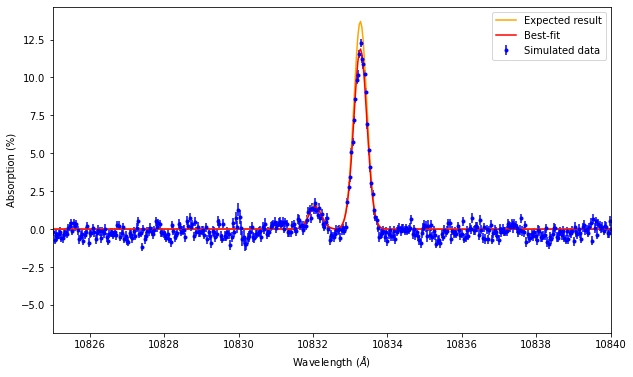

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.05299158e+04 -1.02499794e+15]


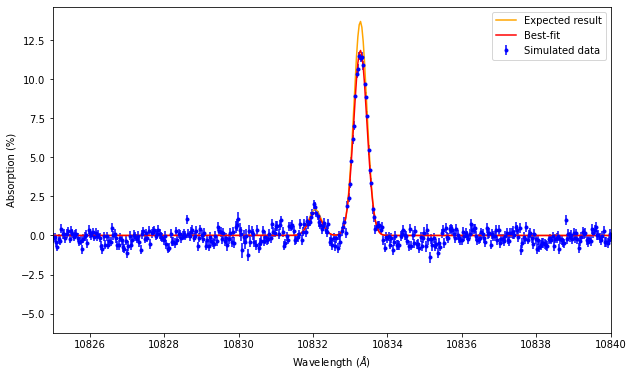

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.75432700e+03 -1.00458387e+15]


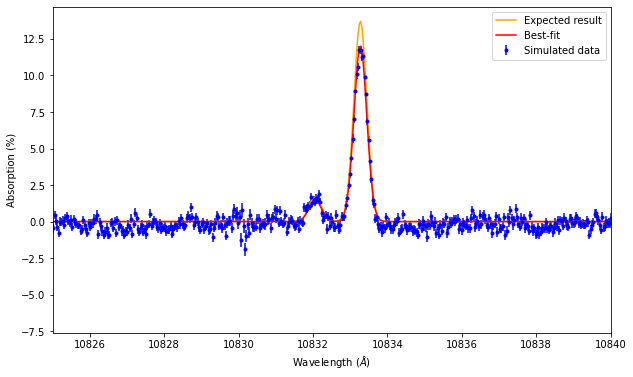

[ 1.03107093e+04 -1.01140840e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


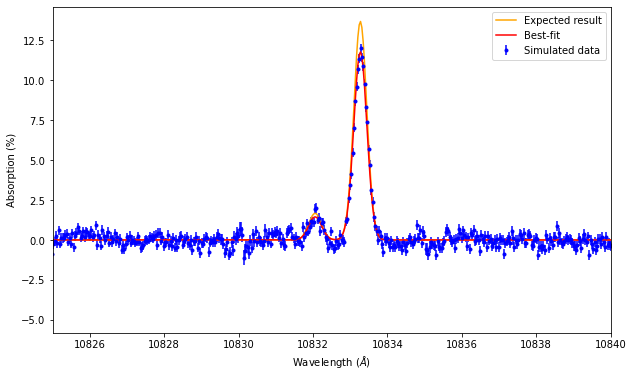

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.98053106e+03 -1.00304902e+15]


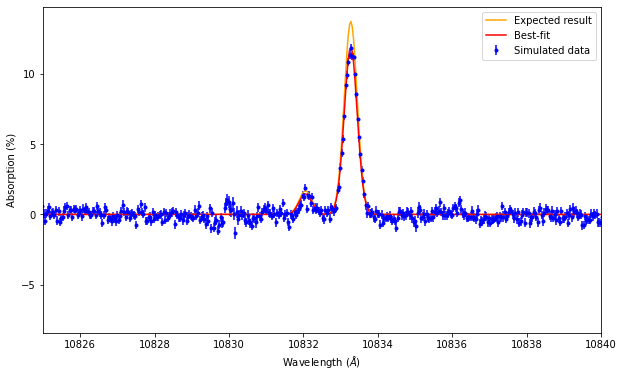

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.01515616e+04 -9.98420006e+14]


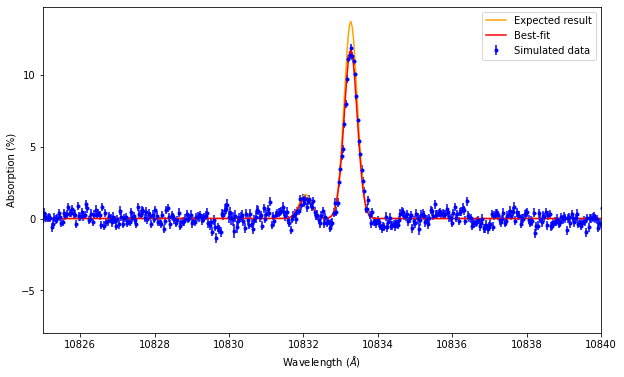

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.88389010e+03 -1.01334172e+15]


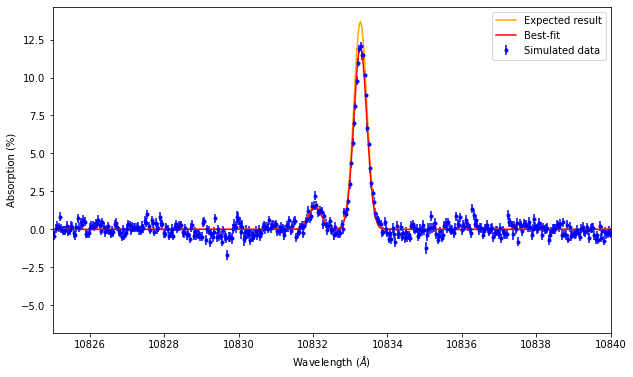

[ 9.87922596e+03 -1.01995995e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


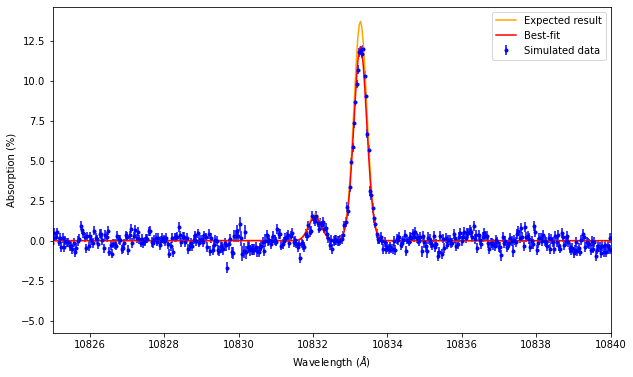

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.97088534e+03 -1.00031253e+15]


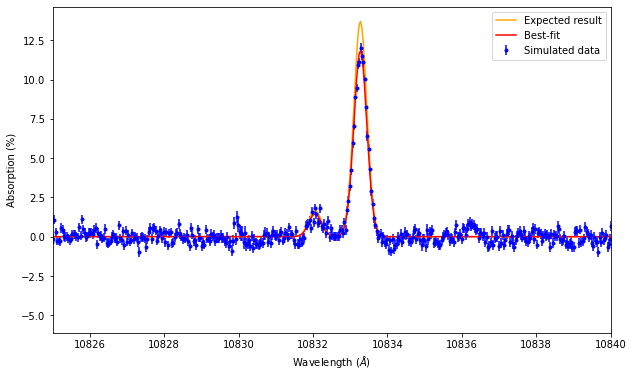

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.47363710e+03 -9.98342345e+14]


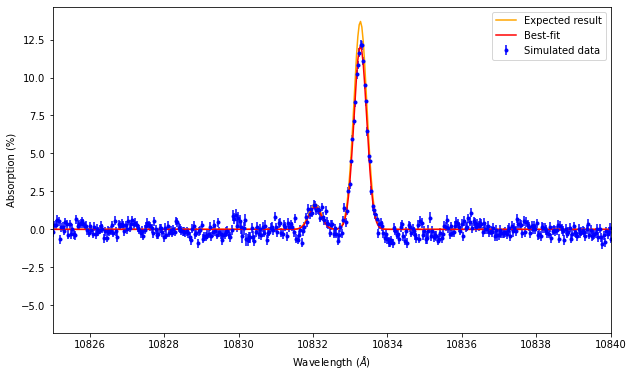

[ 1.02720096e+04 -1.05183204e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


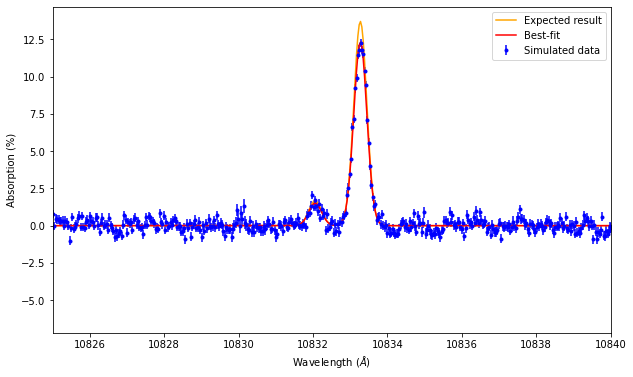

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.01007521e+04 -1.02338444e+15]


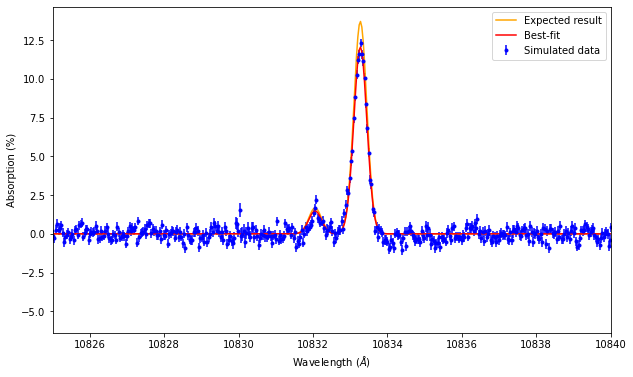

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.35291638e+03 -9.86620104e+14]


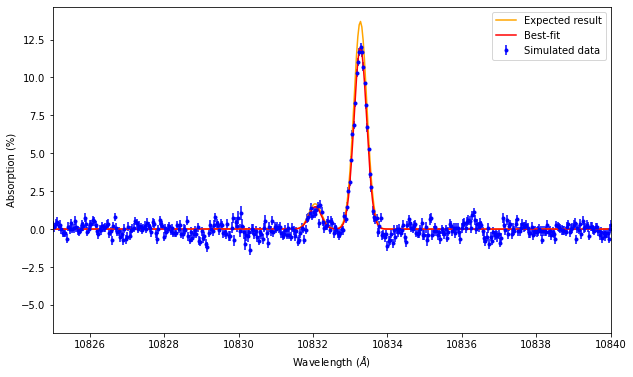

[ 1.02686994e+04 -1.03078175e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


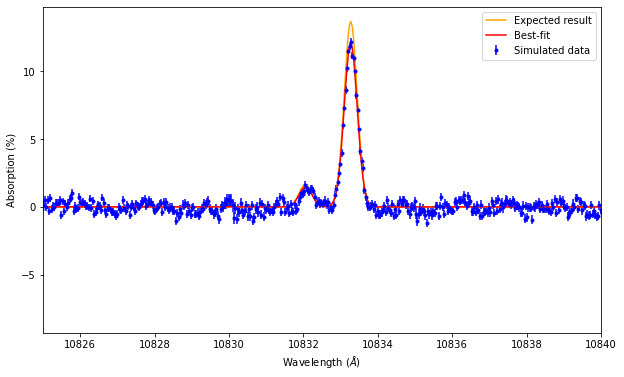

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.15893510e+03 -1.00628722e+15]


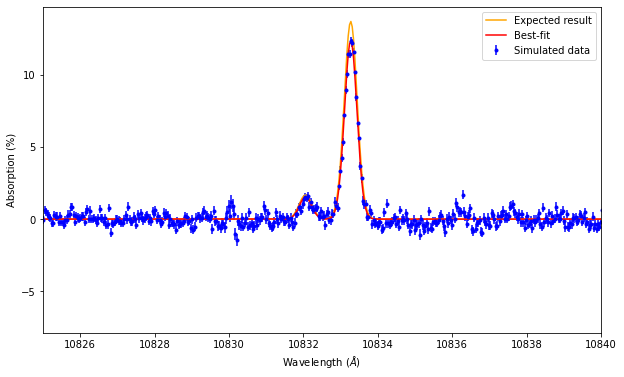

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.93420315e+03 -1.04750339e+15]


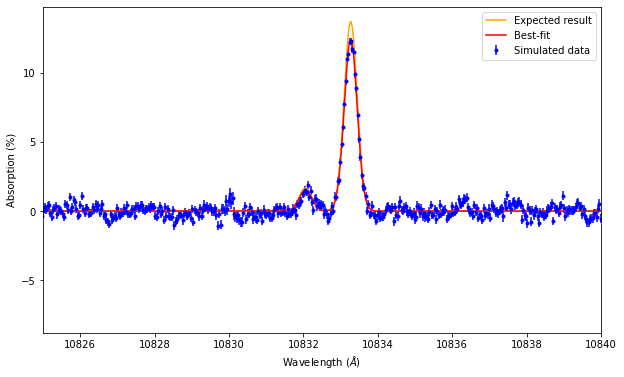

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00305099e+04 -1.02542799e+15]


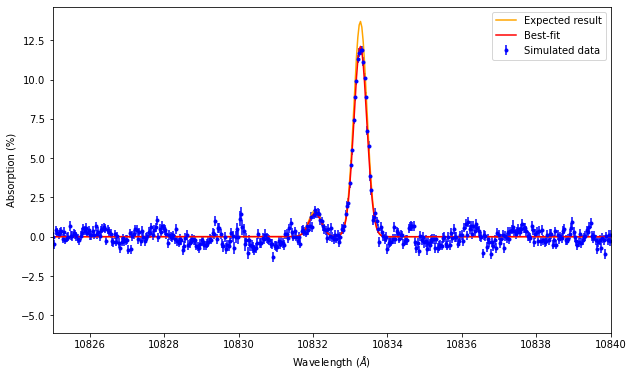

[ 9.82414469e+03 -1.02559138e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


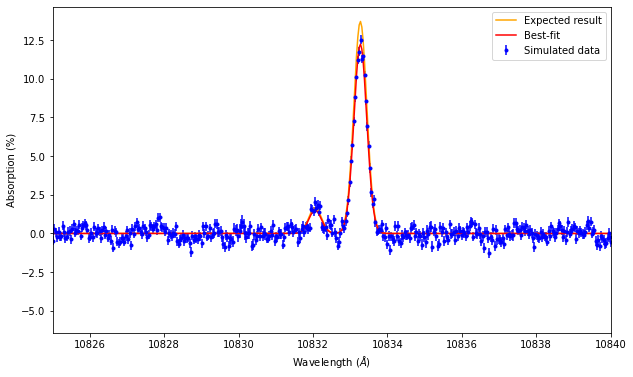

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.47264046e+03 -1.02722457e+15]


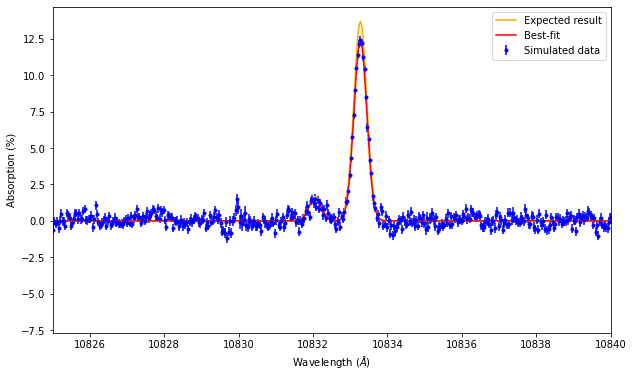

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.88925422e+03 -1.03907025e+15]


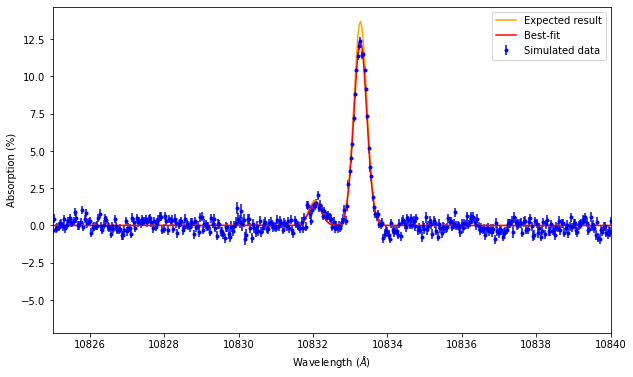

[ 1.01796727e+04 -1.02543469e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


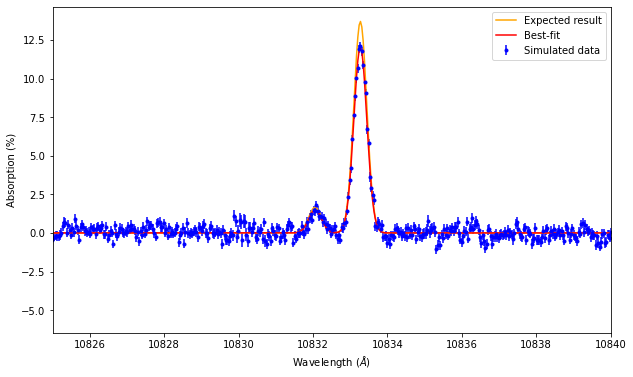

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00896143e+04 -1.04201419e+15]


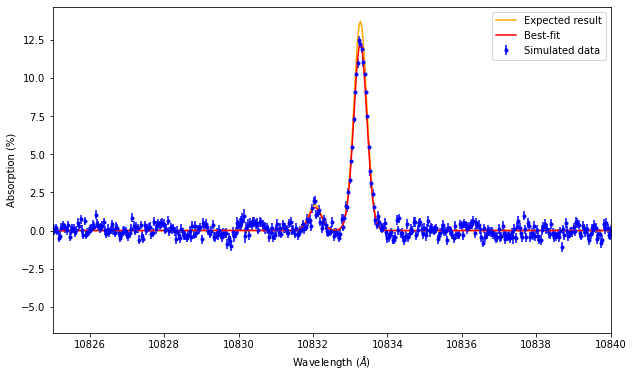

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00295063e+04 -1.02505739e+15]


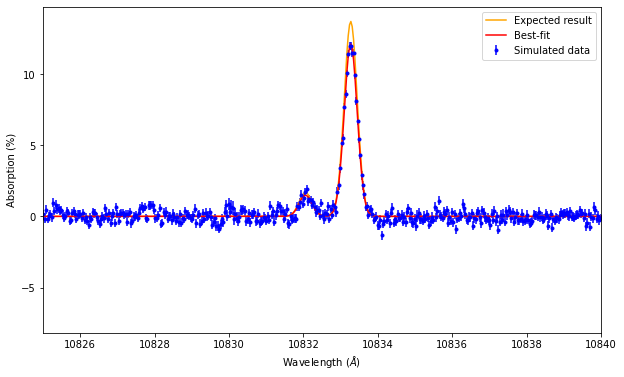

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03836199e+04 -1.02911339e+15]


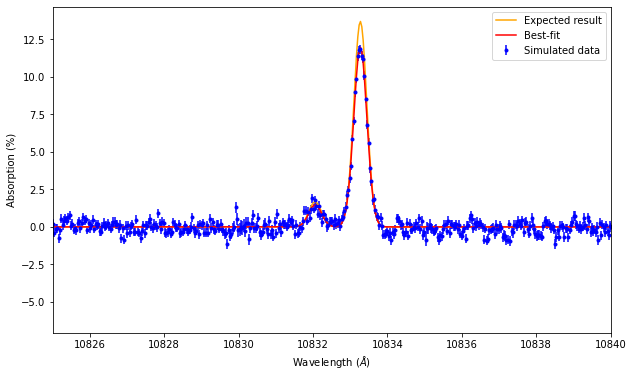

[ 1.03940162e+04 -1.03760486e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


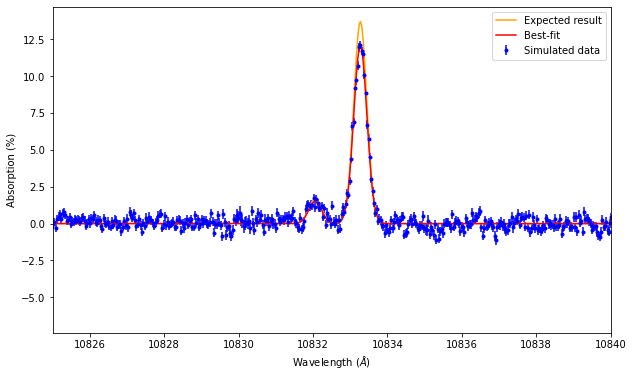

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.07380205e+04 -1.04046520e+15]


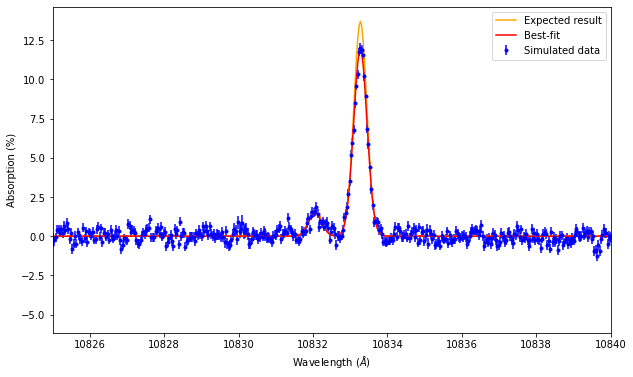

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.10379744e+04 -1.05164568e+15]


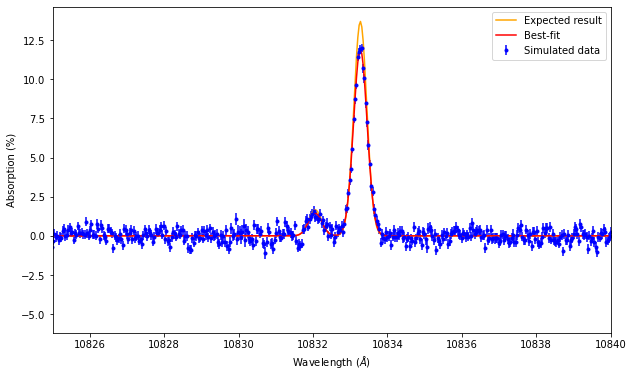

[ 1.05165005e+04 -1.06061508e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


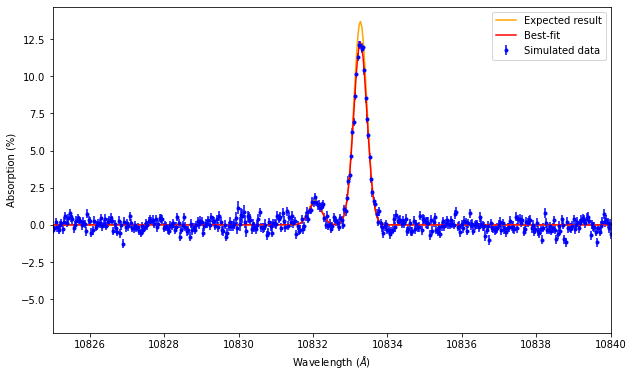

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03061512e+04 -1.03741035e+15]


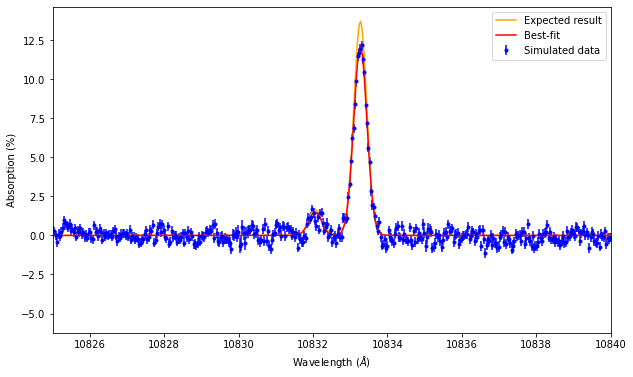

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04987353e+04 -1.03839243e+15]


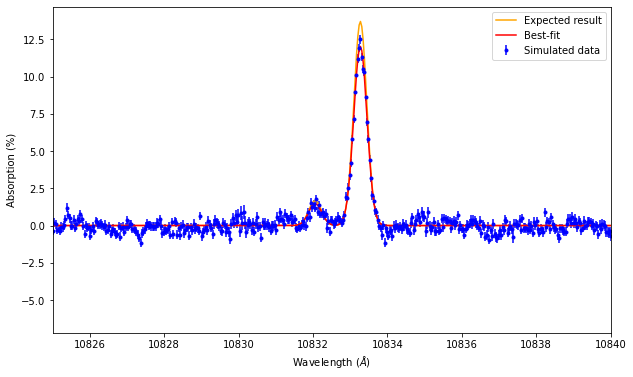

[ 1.08886356e+04 -1.03008003e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


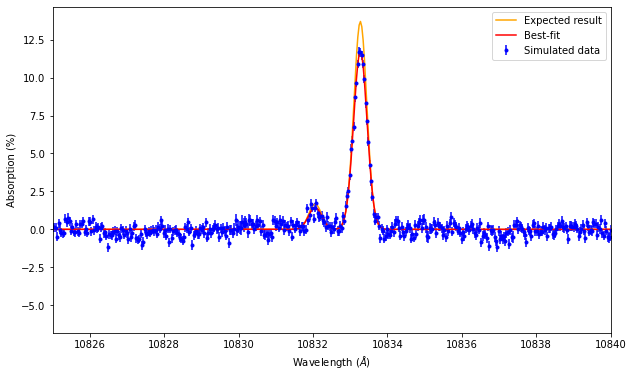

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.07637855e+04 -1.03761116e+15]


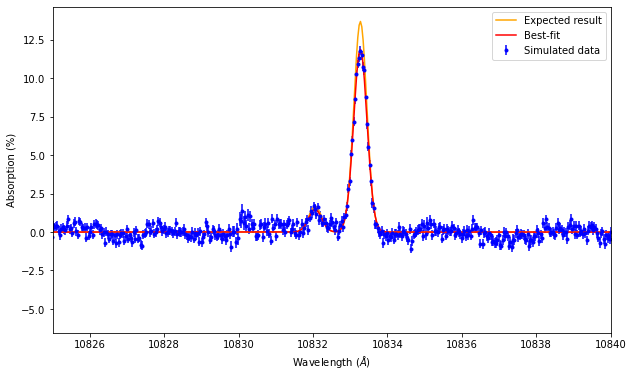

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.06166154e+04 -1.03503804e+15]


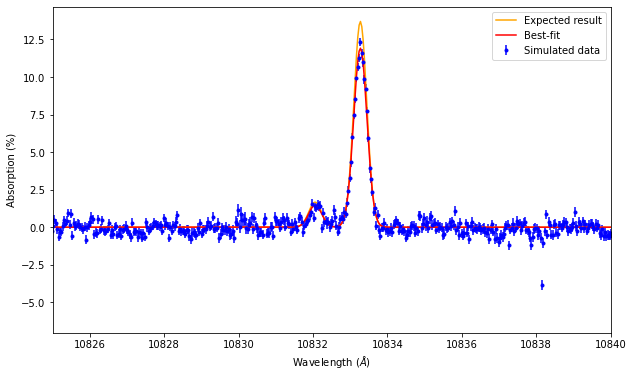

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.08717573e+04 -1.04255265e+15]


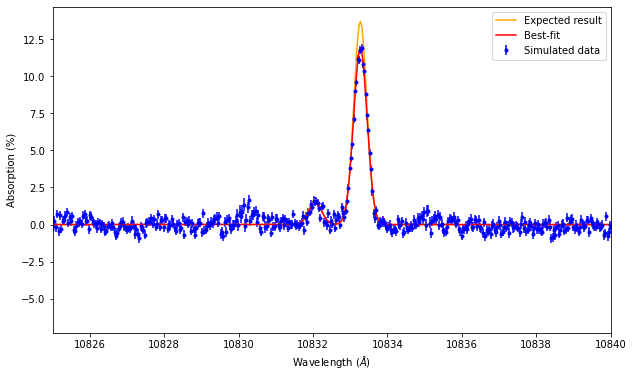

[ 1.05127216e+04 -1.01337231e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


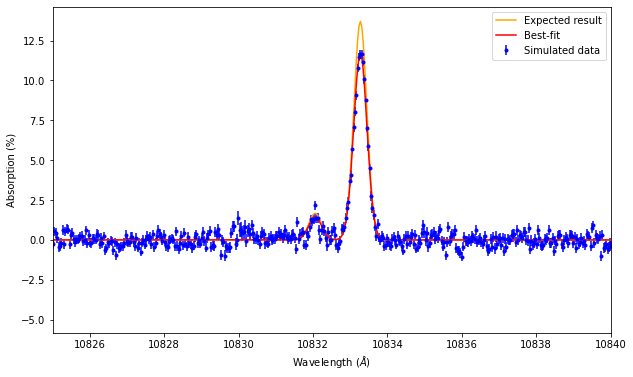

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00687593e+04 -1.02182452e+15]


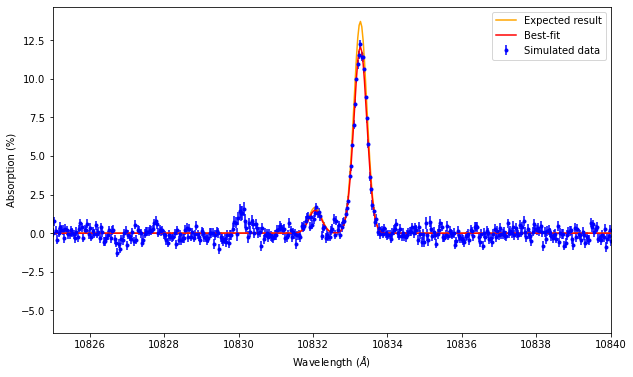

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.05155398e+04 -1.02495464e+15]


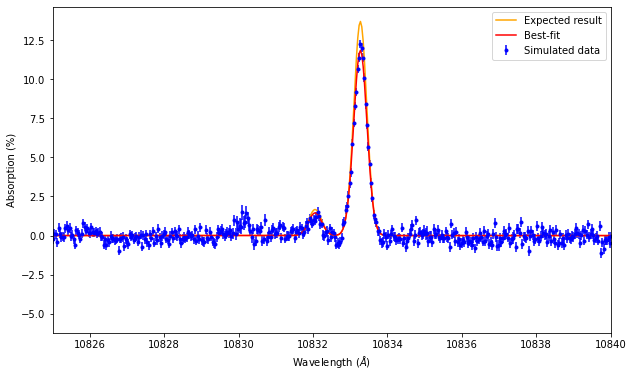

[ 1.09322540e+04 -1.03890575e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


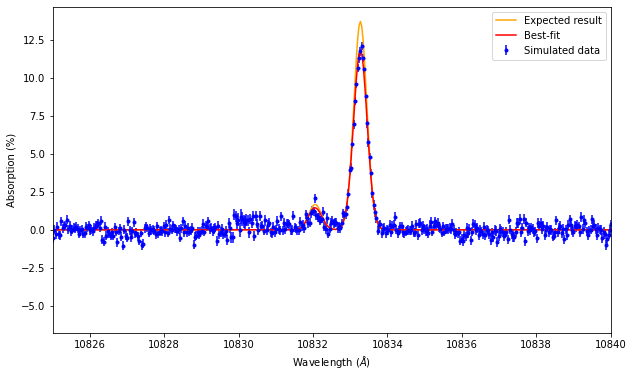

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.02964174e+04 -1.02635959e+15]


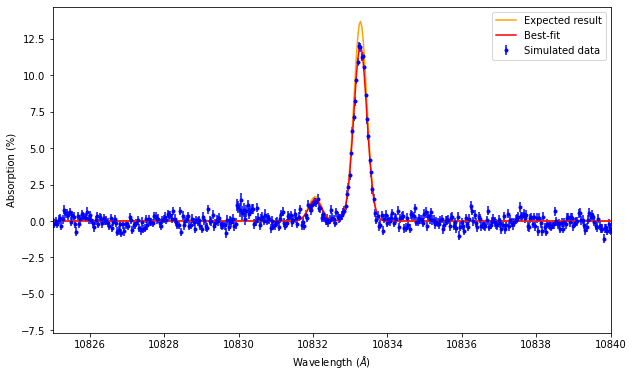

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00617480e+04 -1.03462188e+15]


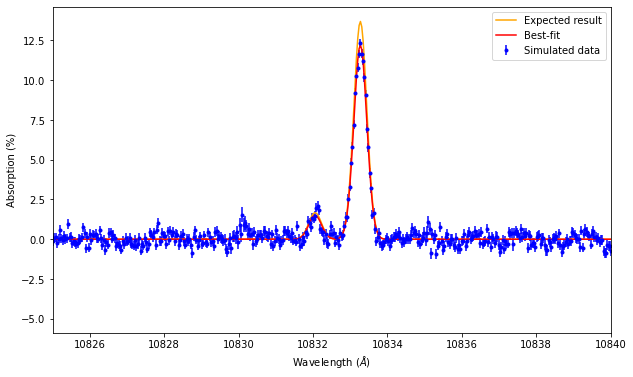

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03612965e+04 -1.03038746e+15]


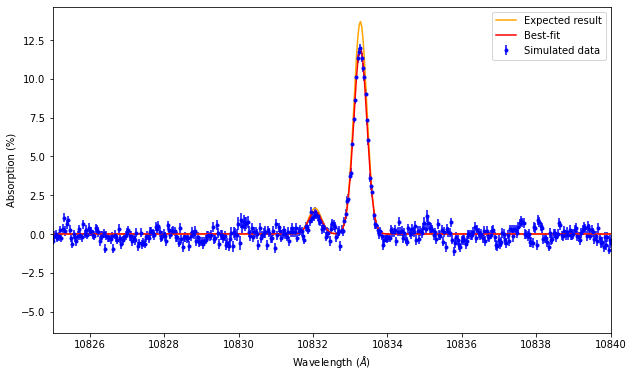

[ 1.04711979e+04 -1.02498863e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


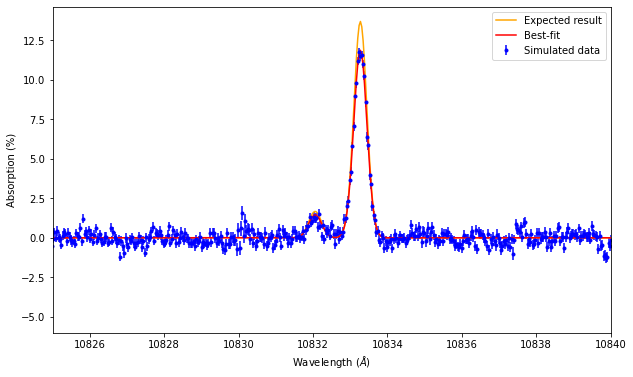

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.01474394e+04 -1.02131548e+15]


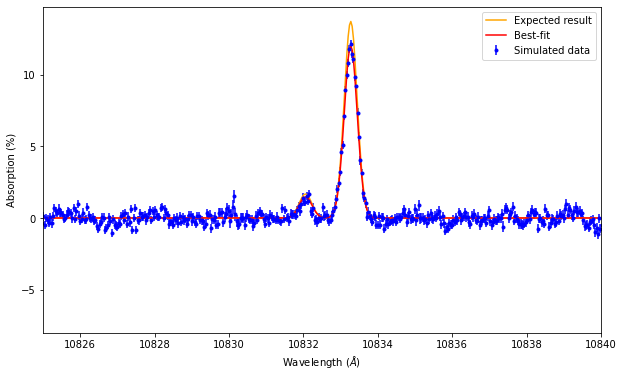

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.01527121e+04 -1.01786514e+15]


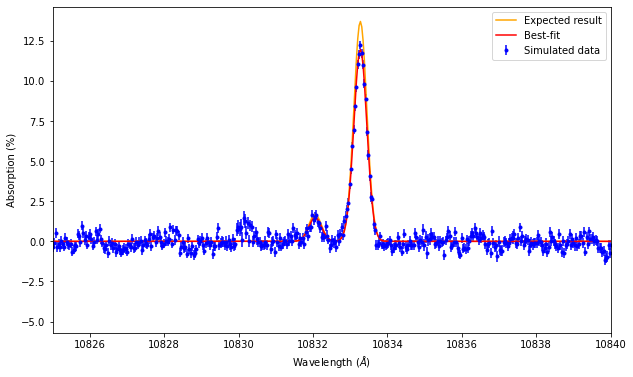

[ 1.01458707e+04 -1.00852567e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


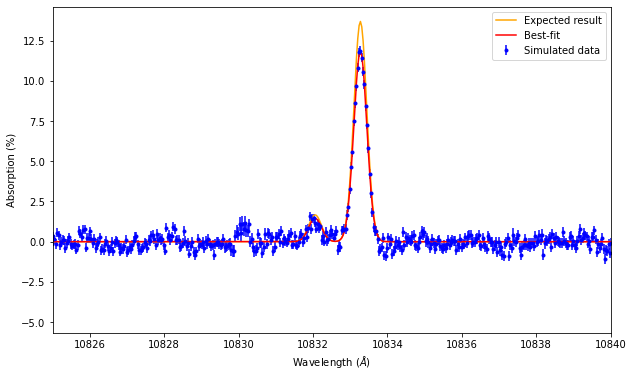

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.83546877e+03 -1.02269114e+15]


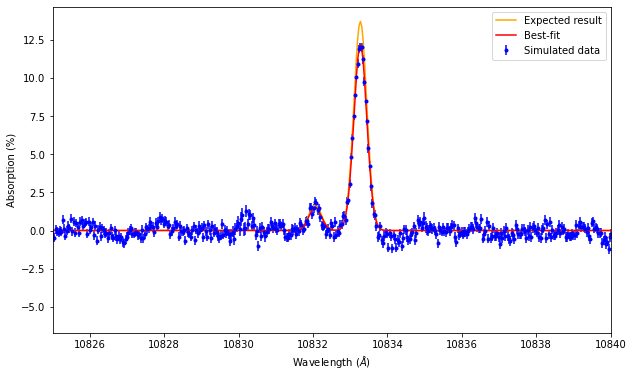

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.73375319e+03 -1.00034781e+15]


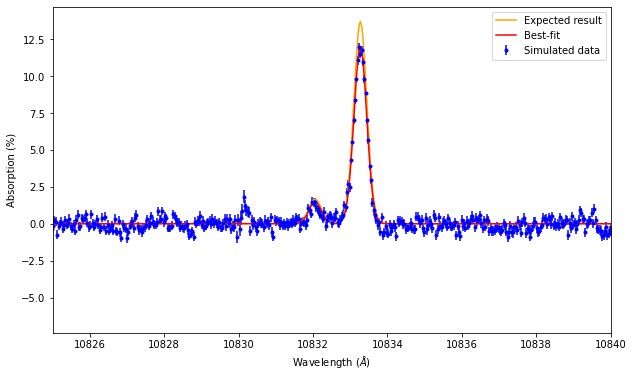

[ 1.04975912e+04 -1.02258249e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


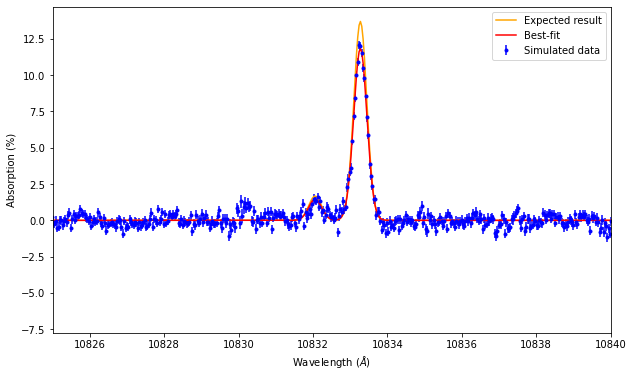

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03031063e+04 -1.04068741e+15]


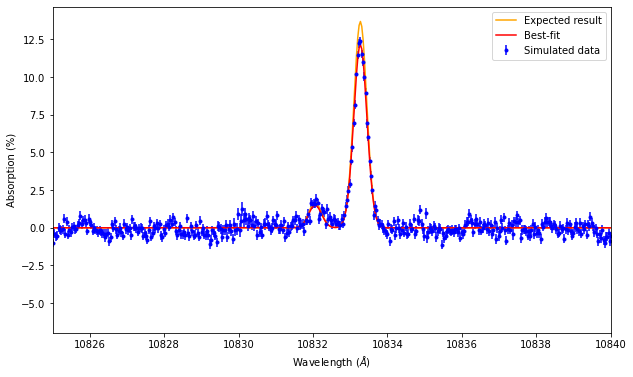

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.01936253e+04 -1.04722452e+15]


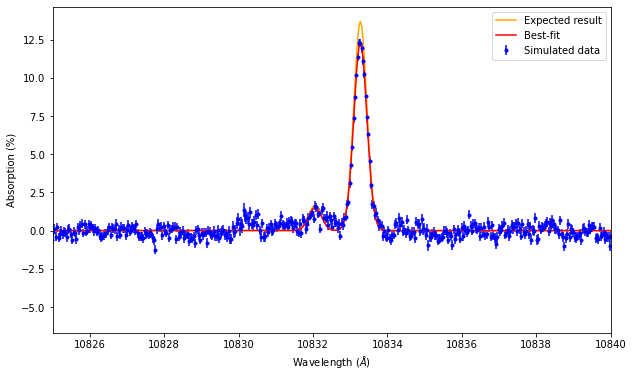

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04550462e+04 -1.04746929e+15]


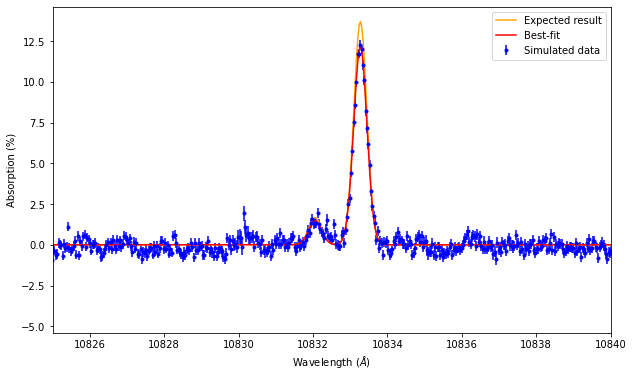

[ 9.94898106e+03 -1.01708764e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


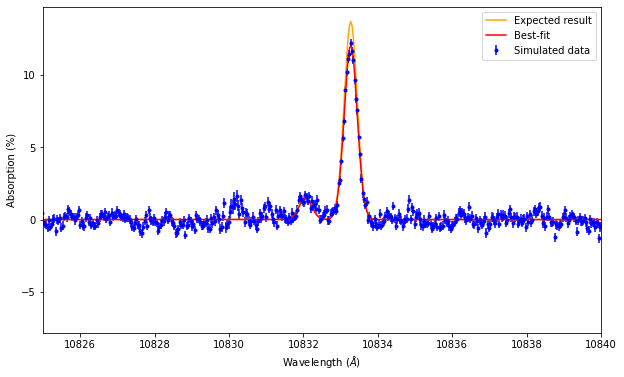

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00518616e+04 -1.03204477e+15]


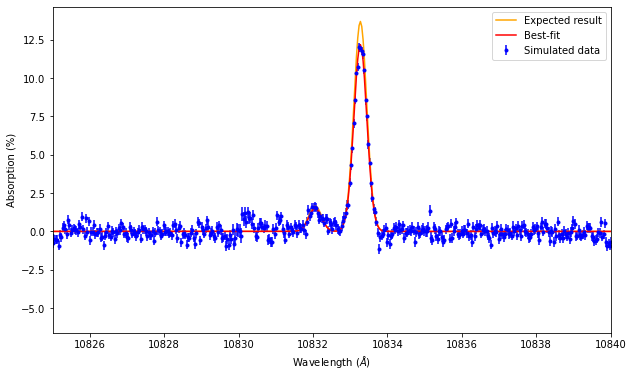

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04362299e+04 -1.03709404e+15]


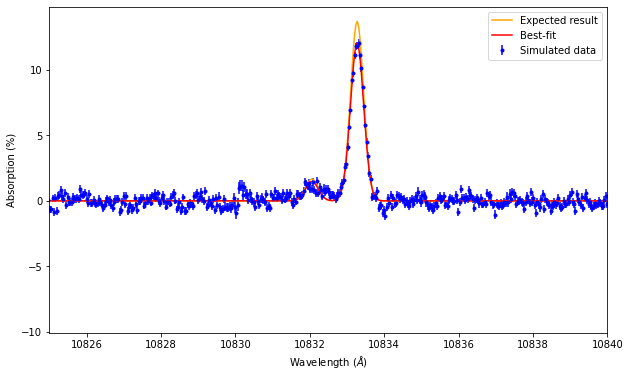

[ 9.87738799e+03 -1.01325232e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


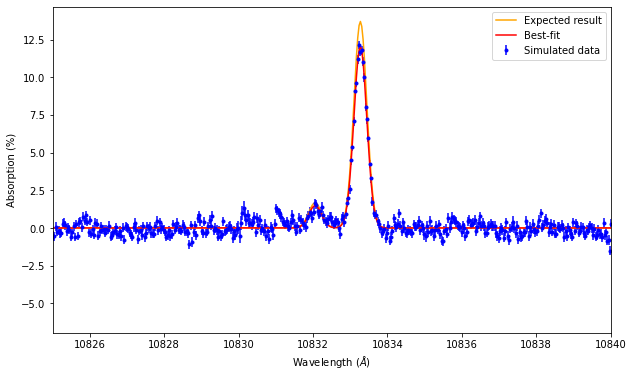

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.78793767e+03 -1.01298230e+15]


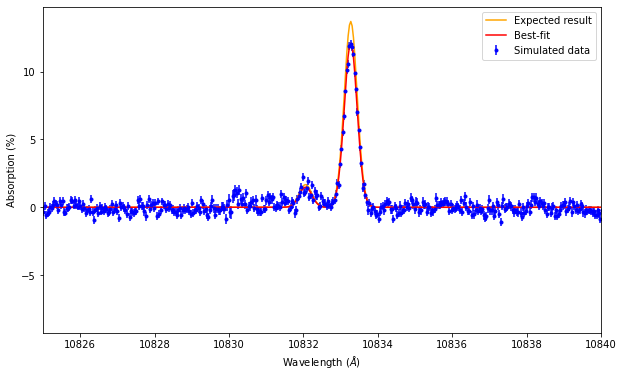

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.63053316e+03 -1.02207248e+15]


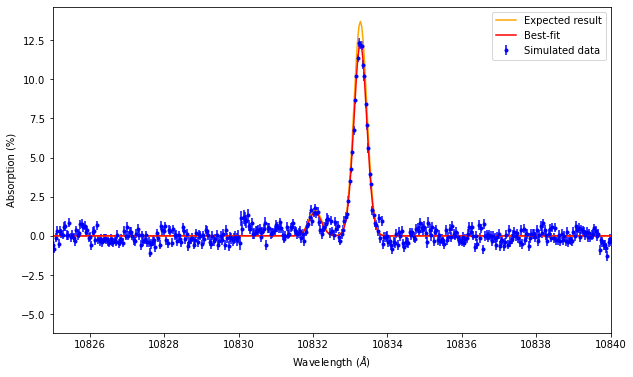

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03088719e+04 -1.03394663e+15]


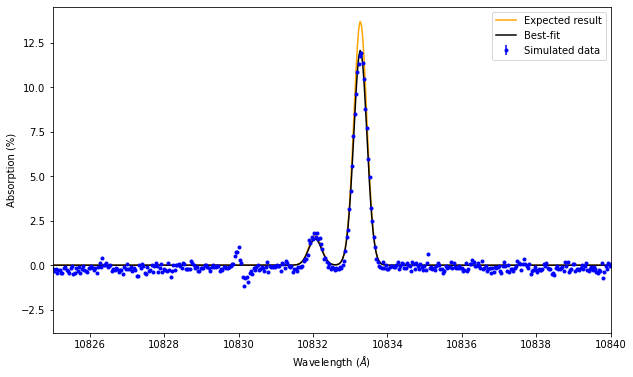

[ 1.04083821e+04 -1.03353692e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


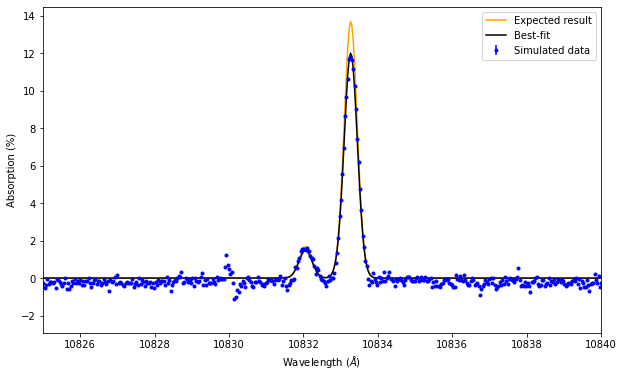

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.06893303e+04 -1.05528811e+15]


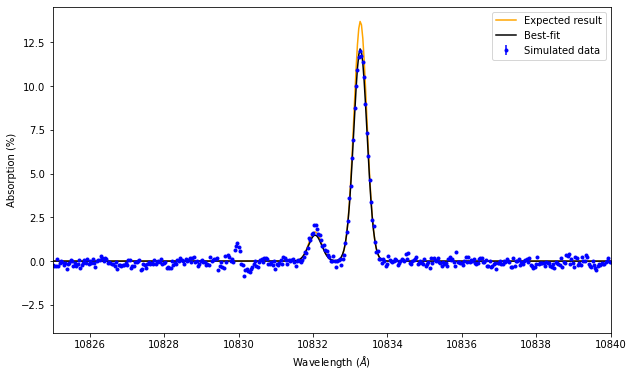

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.09611132e+04 -1.07669474e+15]


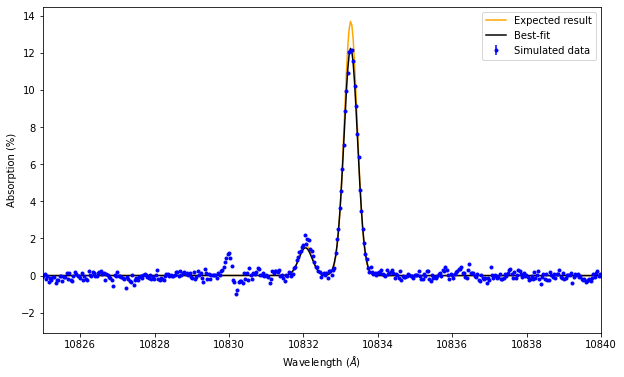

[ 1.11271411e+04 -1.09385347e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


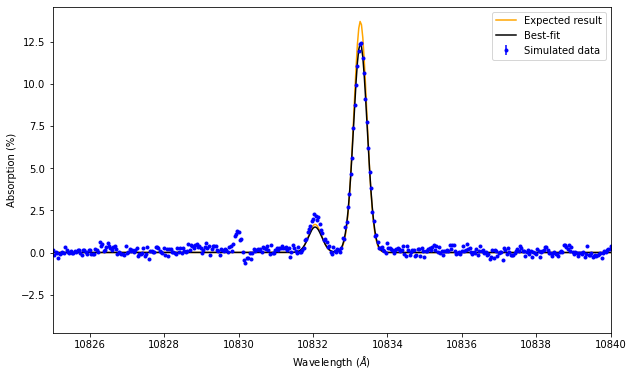

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.14660424e+04 -1.10060672e+15]


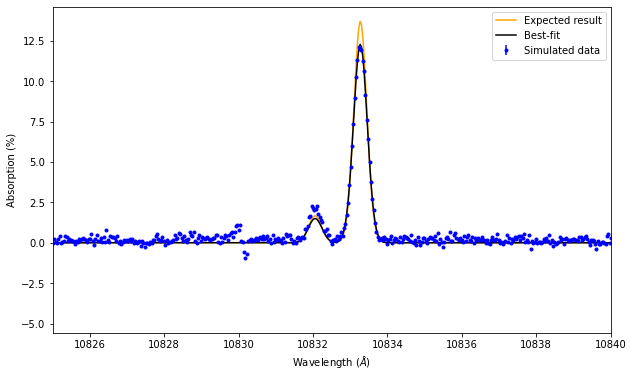

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.11711556e+04 -1.08995452e+15]


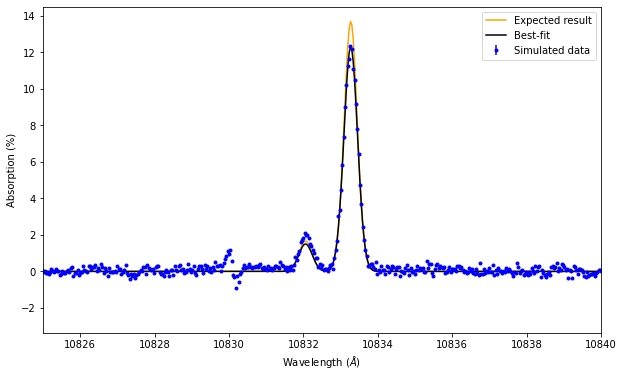

[ 1.11291625e+04 -1.08846024e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


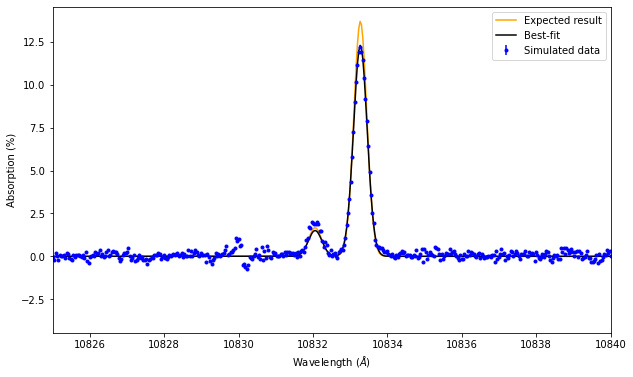

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00983688e+04 -1.01752069e+15]


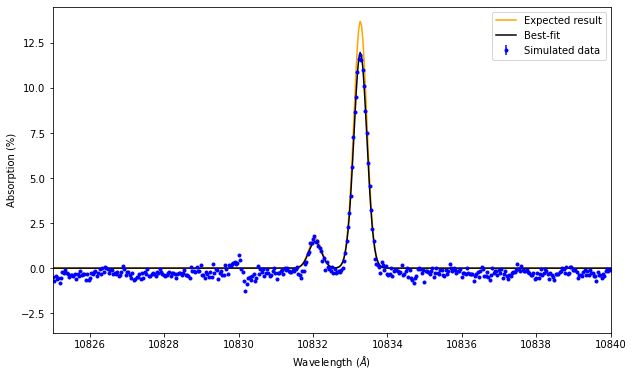

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.13963882e+04 -1.10836194e+15]


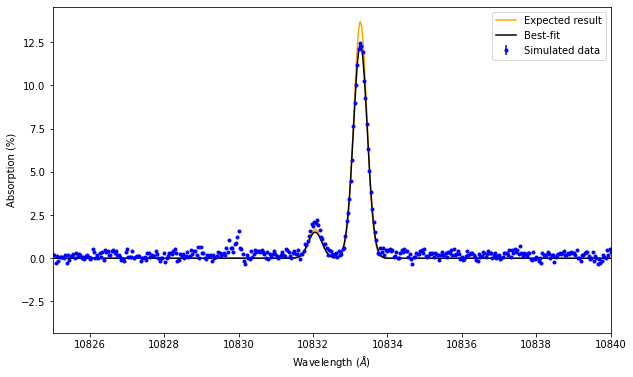

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.51553086e+03 -9.91887727e+14]


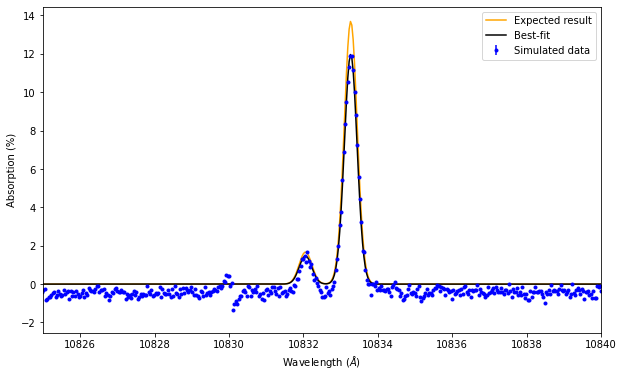

[ 1.07662297e+04 -1.06145448e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


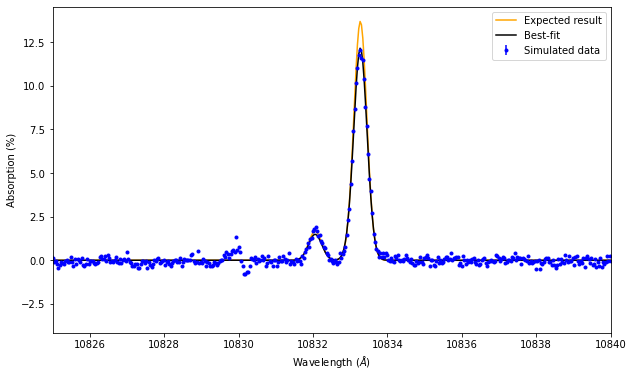

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03629402e+04 -1.04351766e+15]


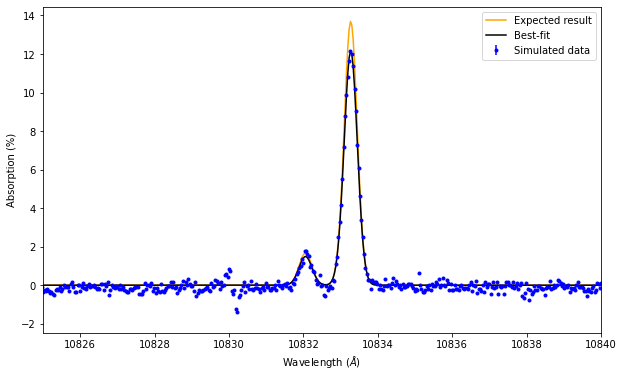

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.07757321e+04 -1.05344891e+15]


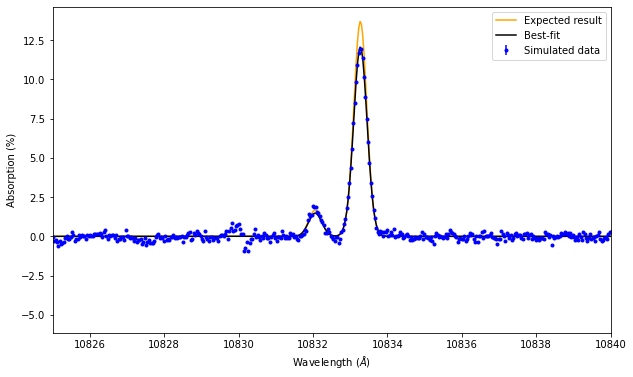

[ 1.08821904e+04 -1.08298355e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


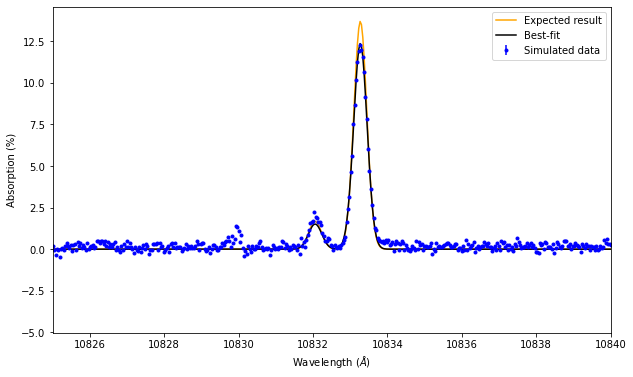

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.92953817e+03 -1.01716339e+15]


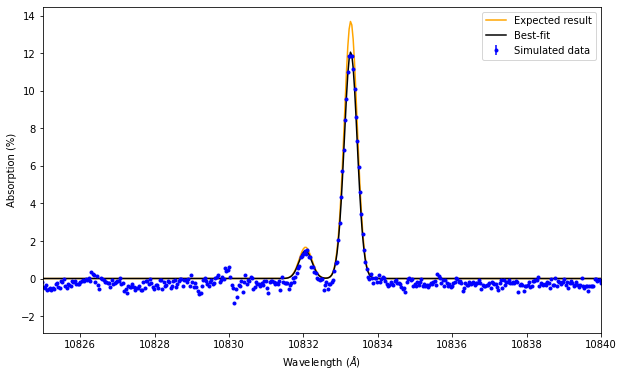

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.14742077e+04 -1.10426559e+15]


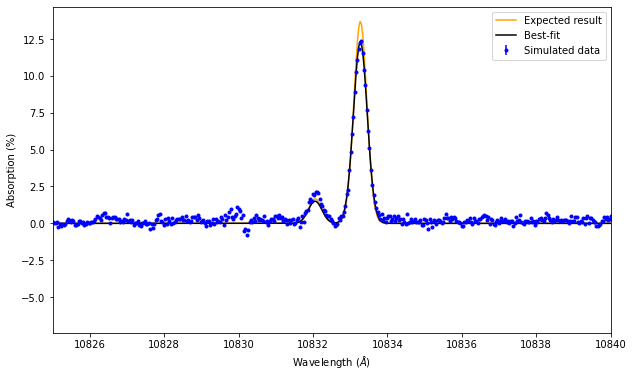

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.22027044e+04 -1.14718632e+15]


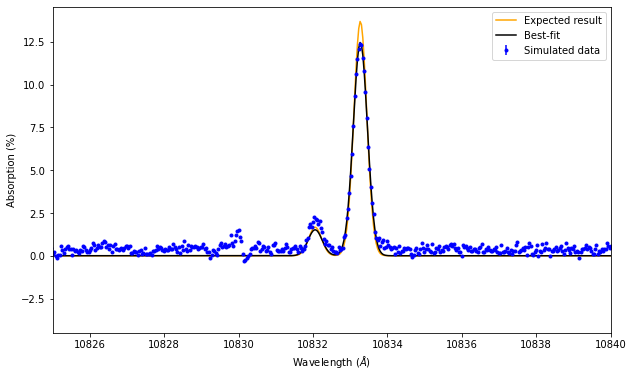

[ 9.92278704e+03 -1.00686921e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


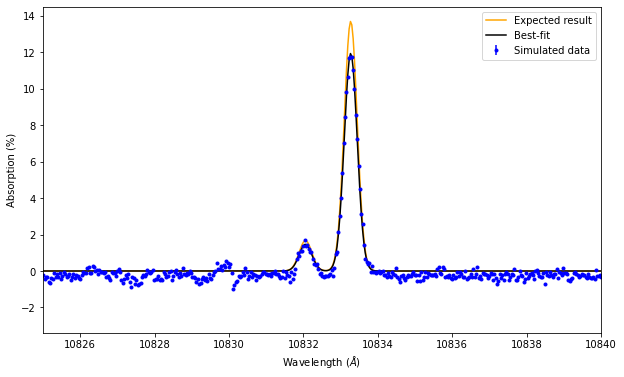

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.06602668e+04 -1.04912175e+15]


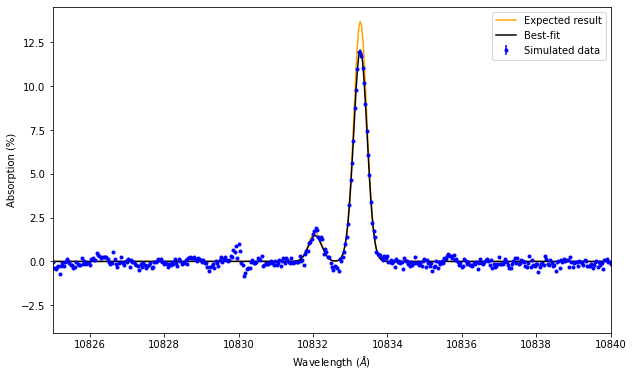

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.08388625e+04 -1.06687107e+15]


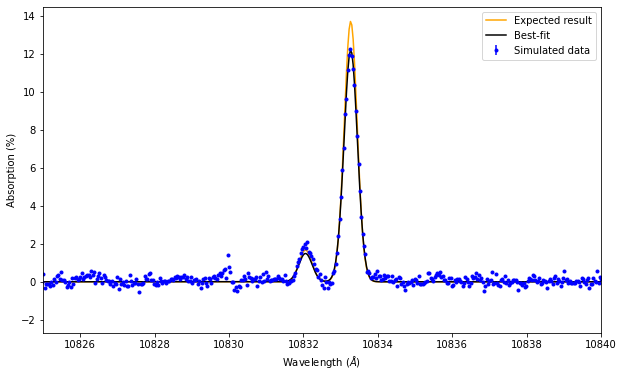

[ 1.10966689e+04 -1.07577905e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


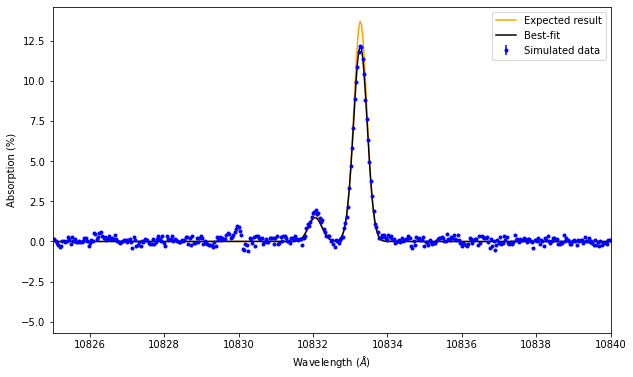

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03607753e+04 -1.03361470e+15]


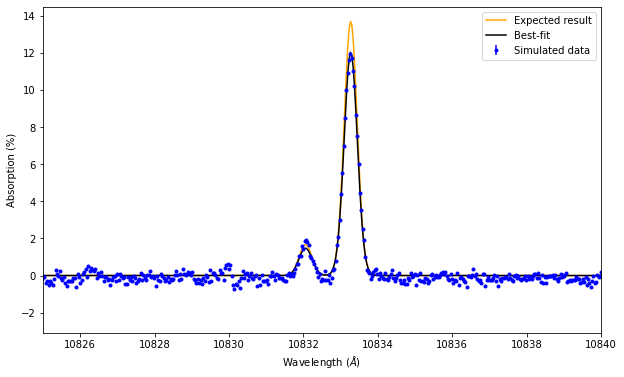

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.09762450e+04 -1.06329888e+15]


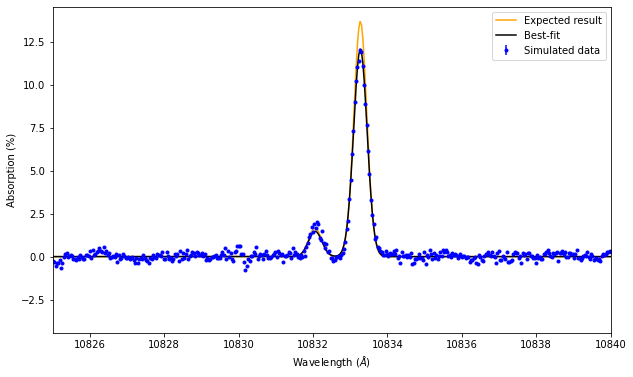

[ 1.12097885e+04 -1.09419544e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


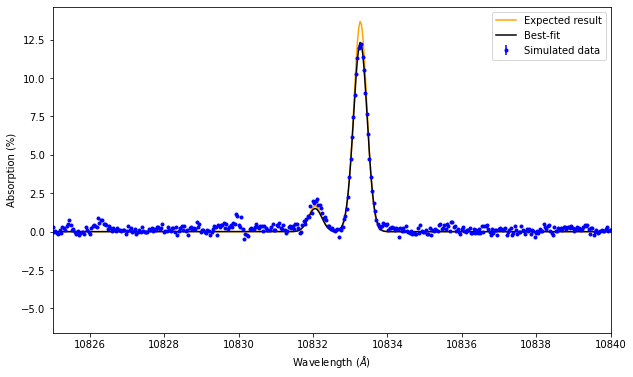

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04647597e+04 -1.04435061e+15]


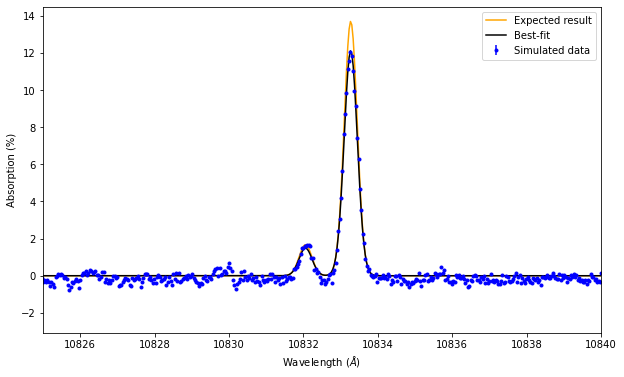

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.24882918e+04 -1.15121232e+15]


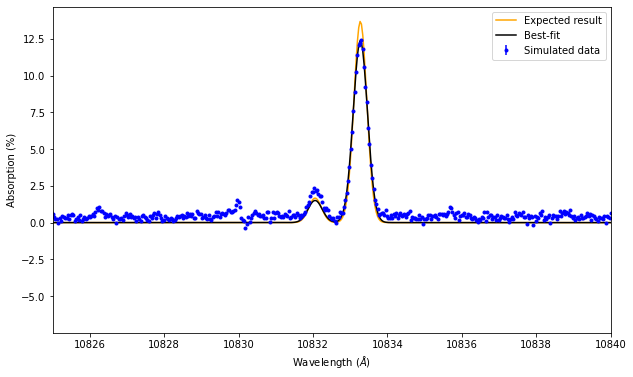

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.05415928e+04 -1.04445521e+15]


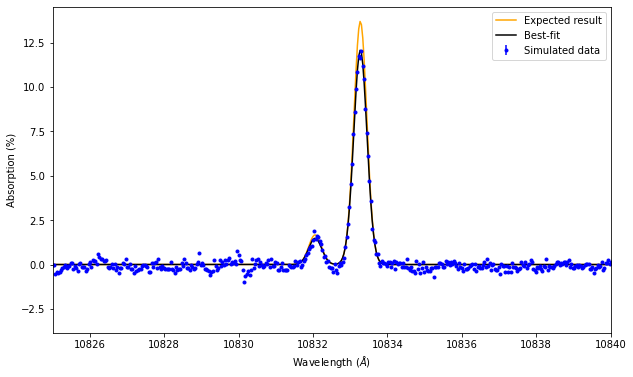

[ 1.04835124e+04 -1.04633005e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


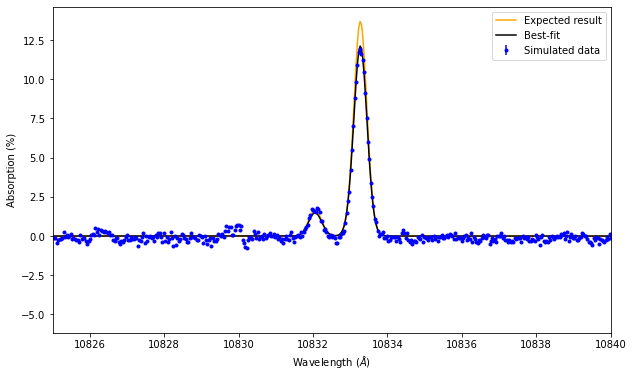

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.18473001e+04 -1.11242529e+15]


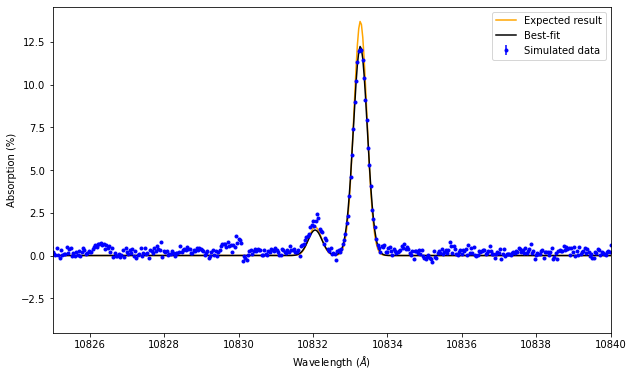

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.01442668e+04 -1.02453455e+15]


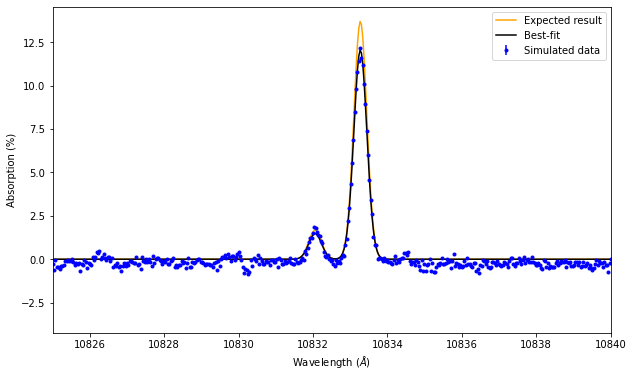

[ 1.13192739e+04 -1.09221731e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


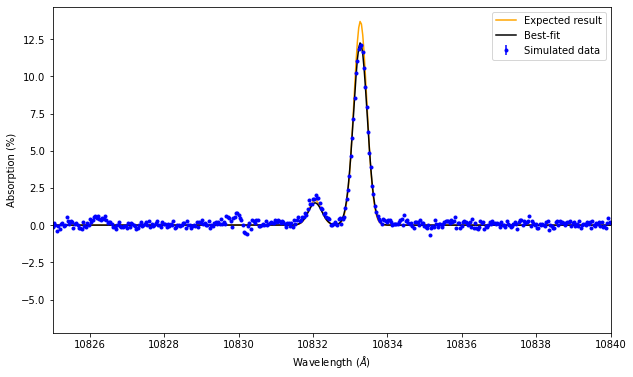

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.08311057e+04 -1.05637089e+15]


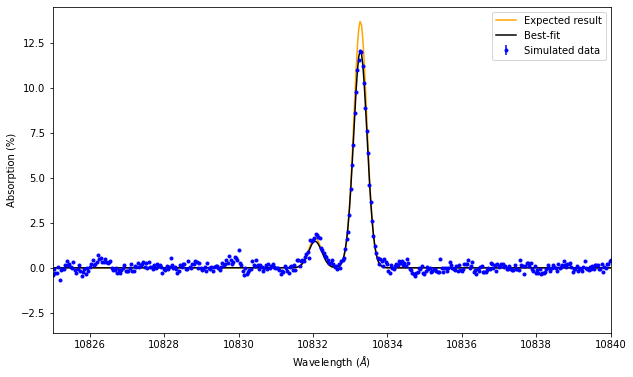

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.39870265e+03 -9.64374936e+14]


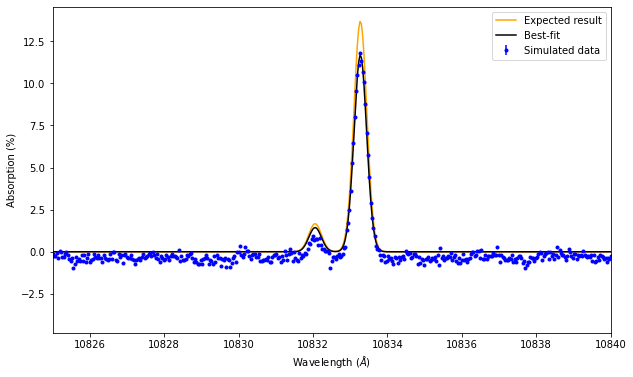

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.66119314e+03 -9.79567724e+14]


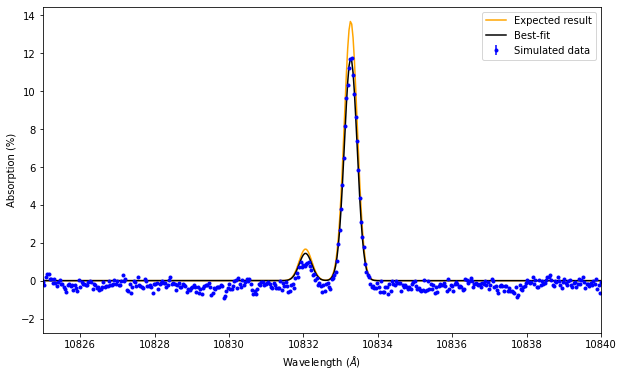

[ 9.61532667e+03 -9.84328462e+14]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


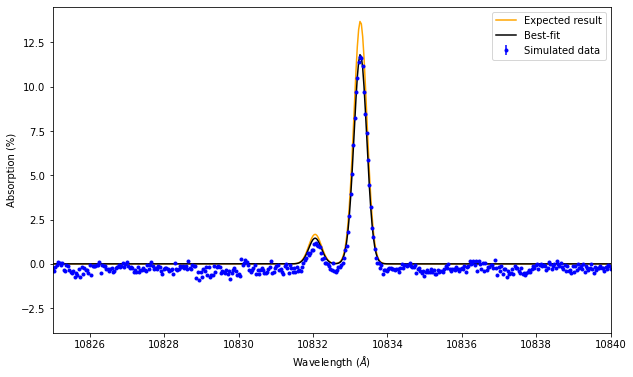

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00737686e+04 -1.01767226e+15]


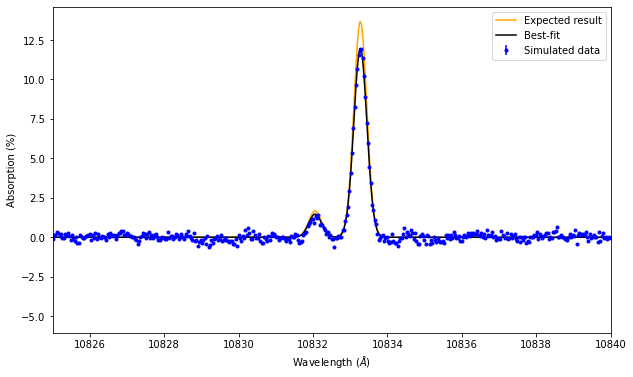

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.06959637e+04 -1.04982677e+15]


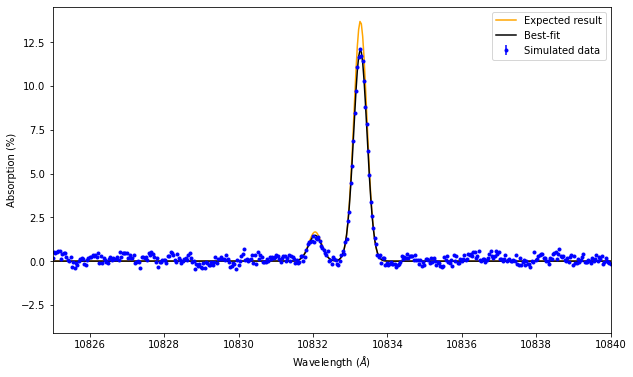

[ 9.82487103e+03 -9.93602883e+14]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


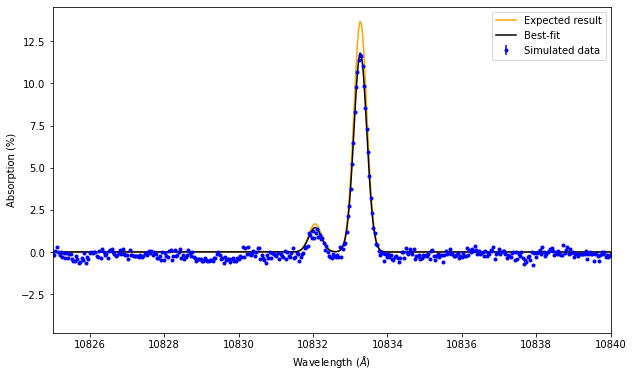

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.05769029e+04 -1.04053969e+15]


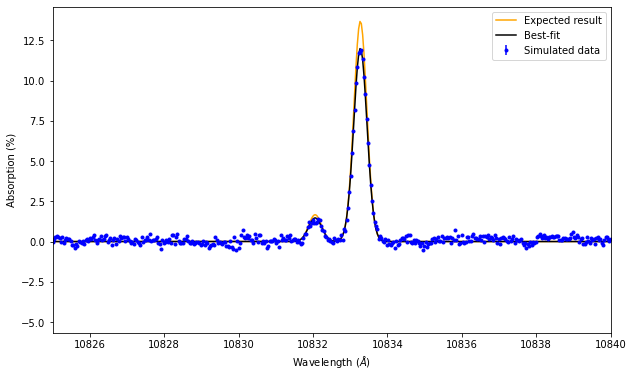

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04444983e+04 -1.03483290e+15]


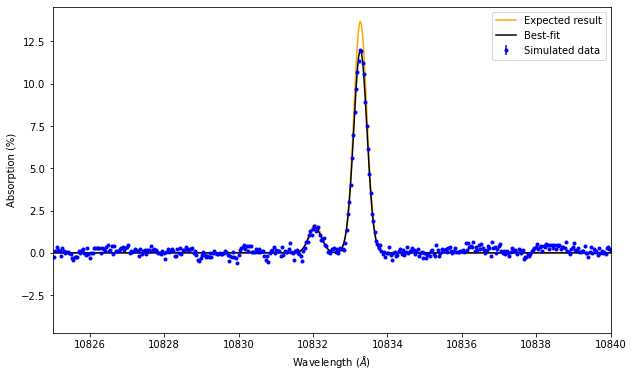

[ 1.02292323e+04 -1.01900665e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


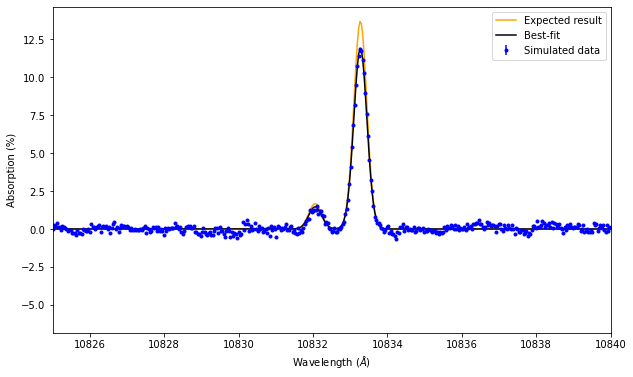

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.18719703e+04 -1.10691911e+15]


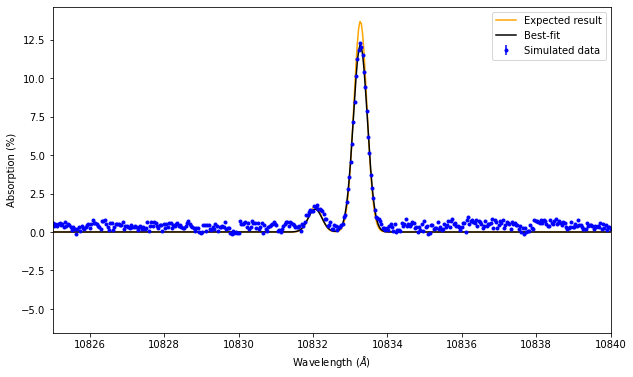

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.69389156e+03 -9.80650669e+14]


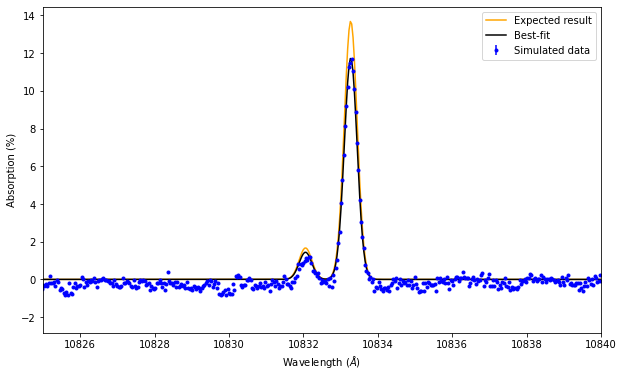

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.02373332e+04 -1.01097064e+15]


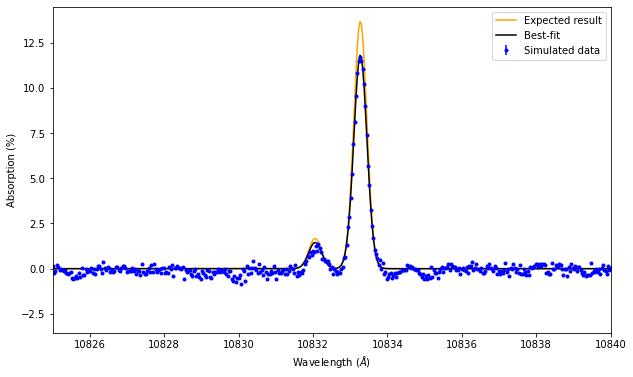

[ 1.03976236e+04 -1.03903719e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


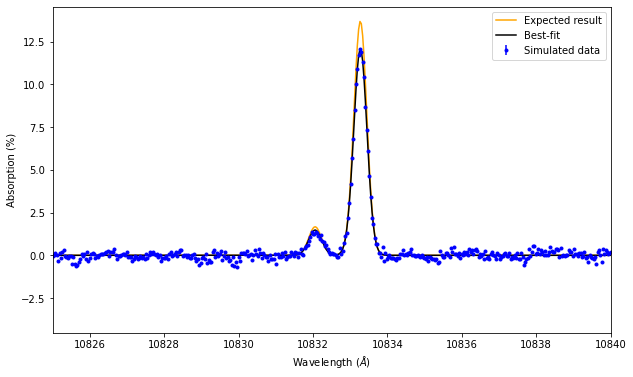

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.12497874e+04 -1.07814657e+15]


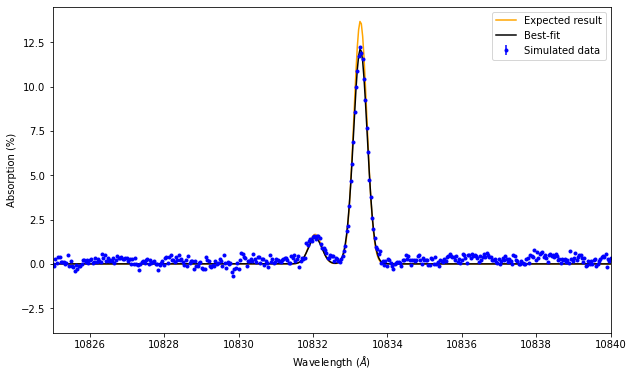

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.98949691e+03 -9.91533587e+14]


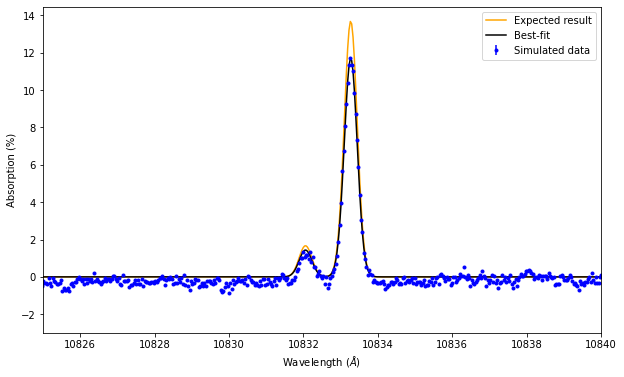

[ 1.05204271e+04 -1.04001890e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


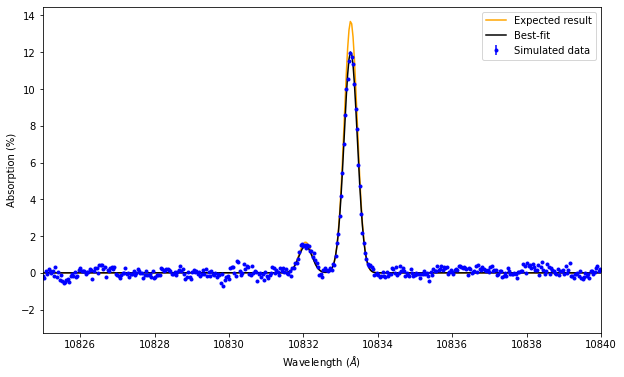

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.03035463e+04 -1.02721347e+15]


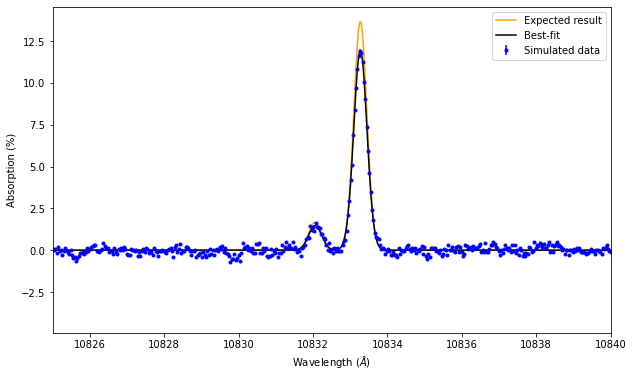

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.05363723e+04 -1.04883968e+15]


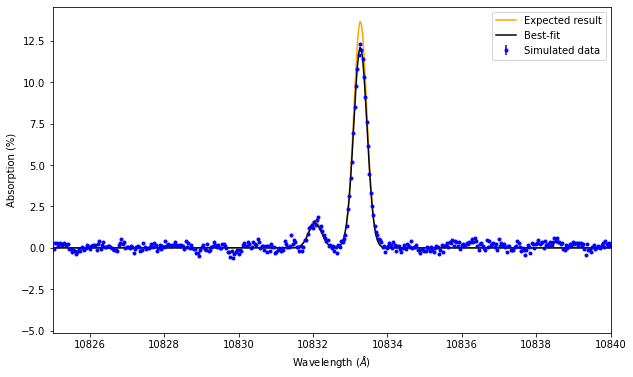

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.83805508e+03 -1.00693244e+15]


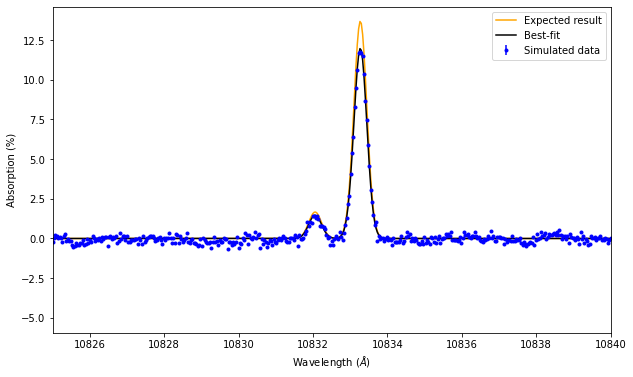

[ 1.04039912e+04 -1.02522245e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


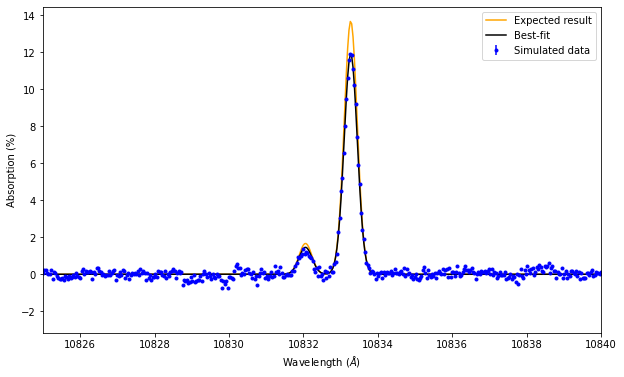

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.22985371e+03 -9.55807755e+14]


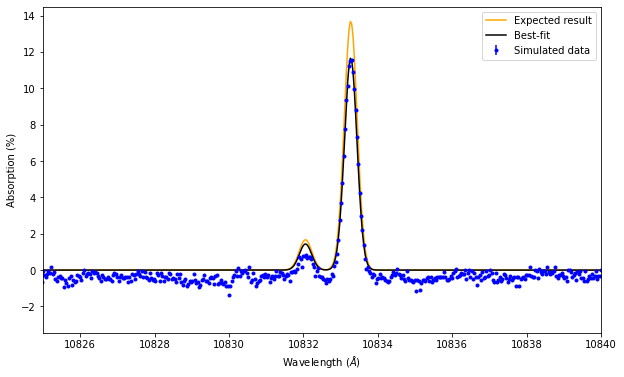

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.93106477e+03 -1.00216925e+15]


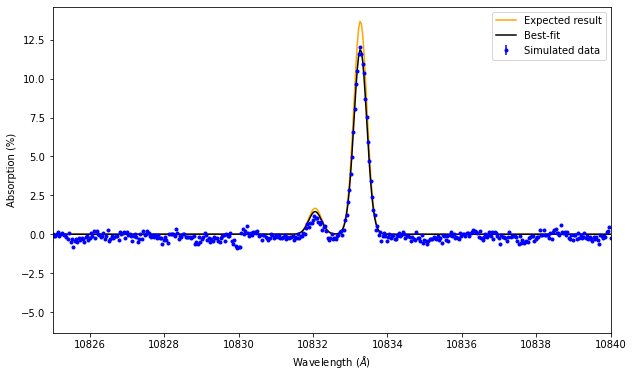

[ 1.05404927e+04 -1.03503455e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


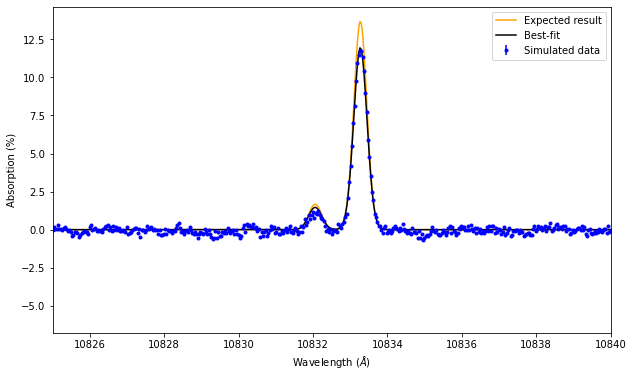

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.02527667e+04 -1.02288182e+15]


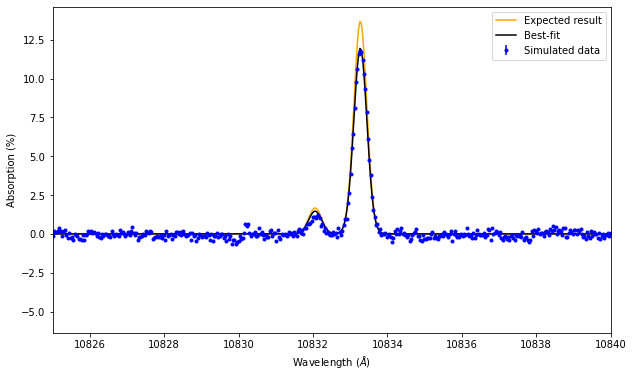

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.13371488e+04 -1.09037138e+15]


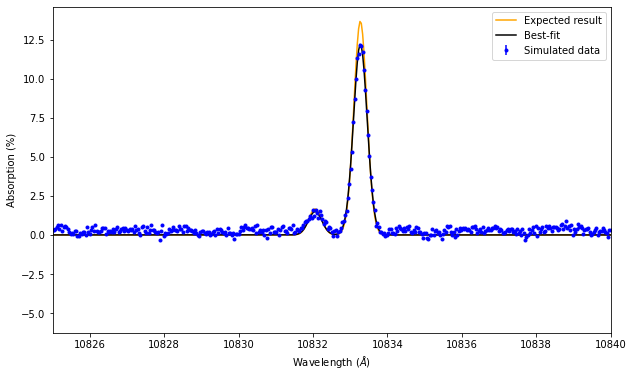

[ 1.03229124e+04 -1.02777184e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


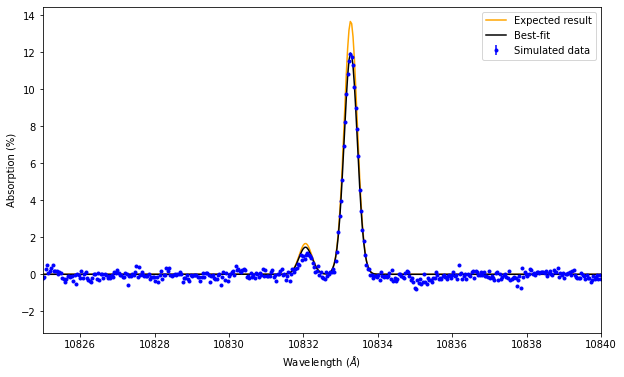

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.20676036e+04 -1.13224590e+15]


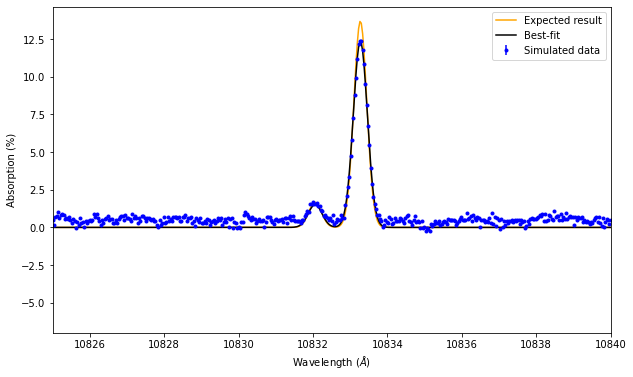

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.00292065e+04 -1.00870740e+15]


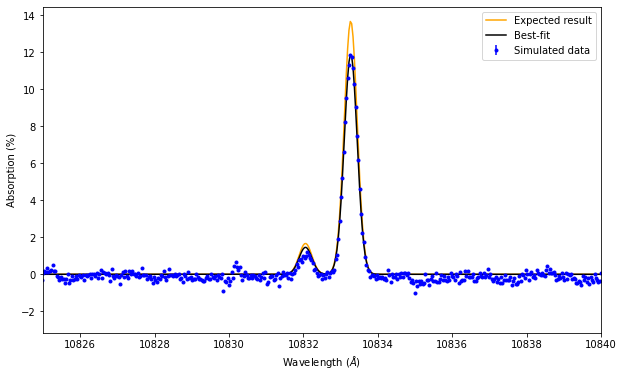

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.19913430e+04 -1.11694124e+15]


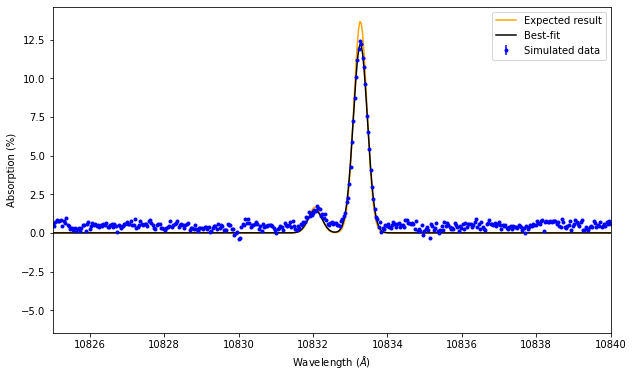

[ 1.03694004e+04 -1.01247775e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


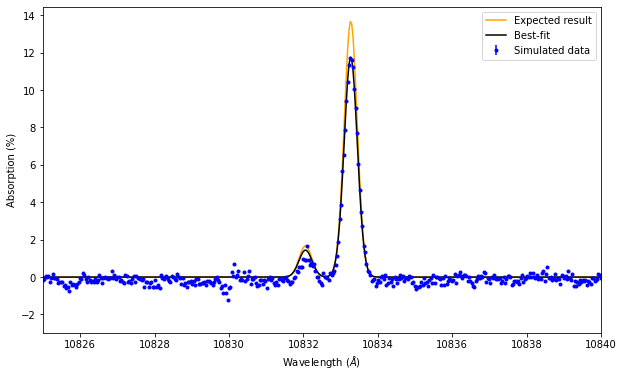

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.16975527e+04 -1.10319025e+15]


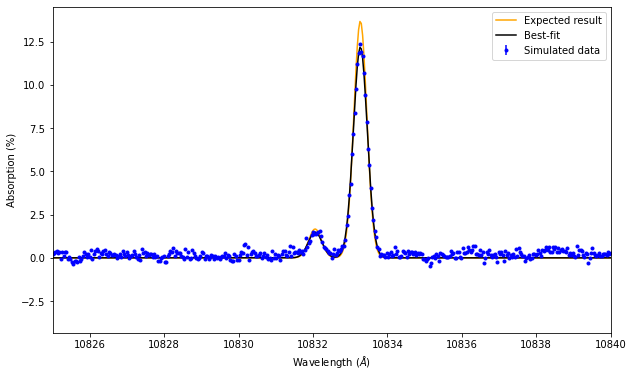

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.93407239e+03 -1.00602825e+15]


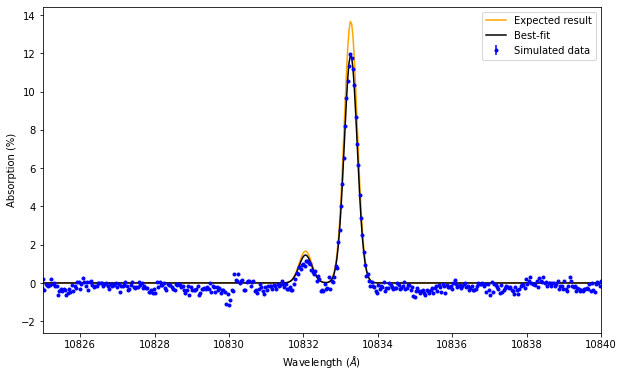

[ 1.05998389e+04 -1.03675554e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


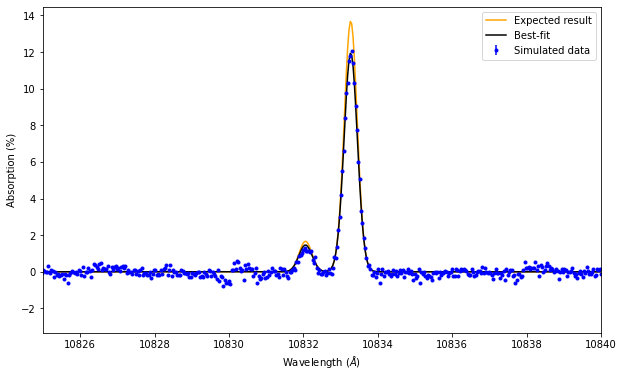

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.08932830e+04 -1.05465334e+15]


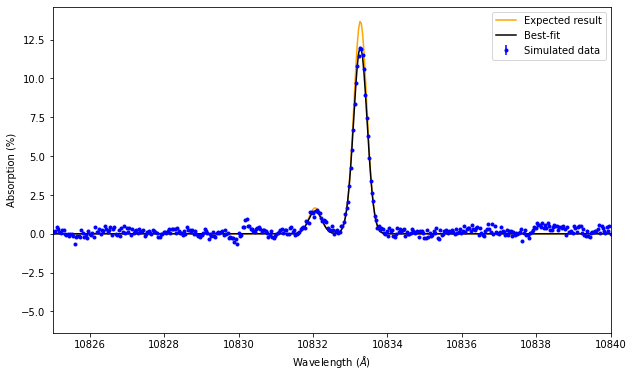

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.05121661e+04 -1.03208843e+15]


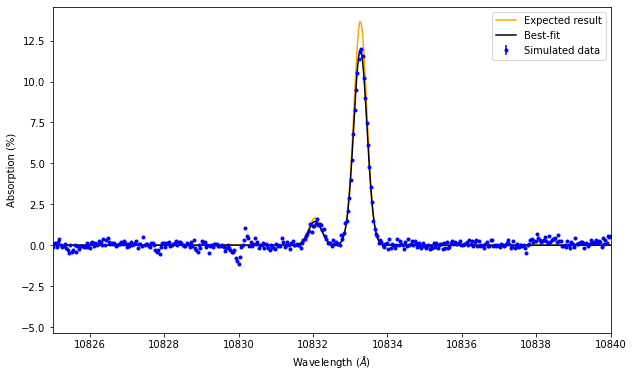

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04058912e+04 -1.03248695e+15]


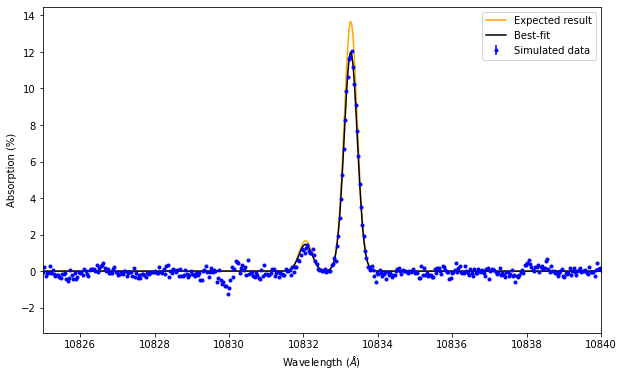

[ 1.0373803e+04 -1.0292967e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


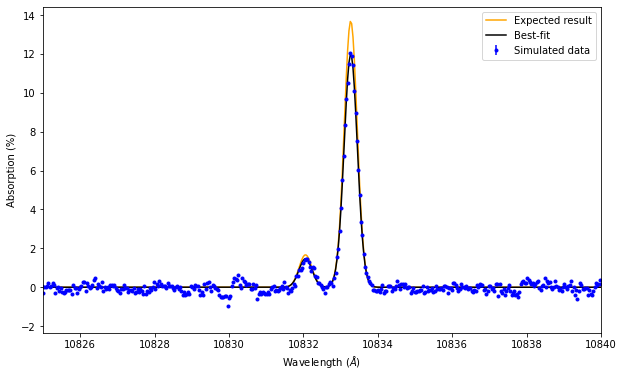

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.07631261e+04 -1.04701867e+15]


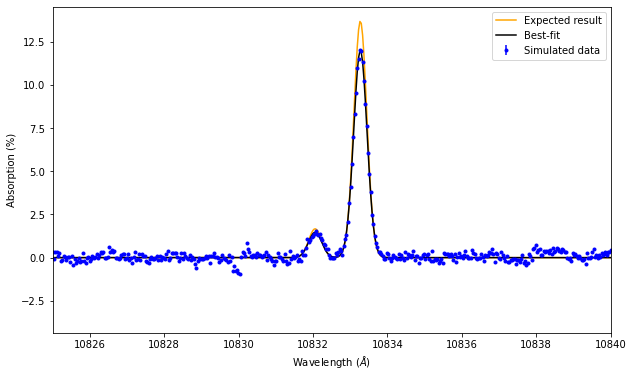

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.1654381e+04 -1.0981302e+15]


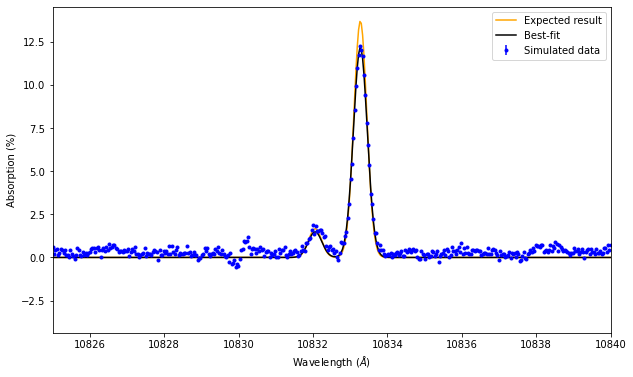

[ 1.03442066e+04 -1.01091320e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


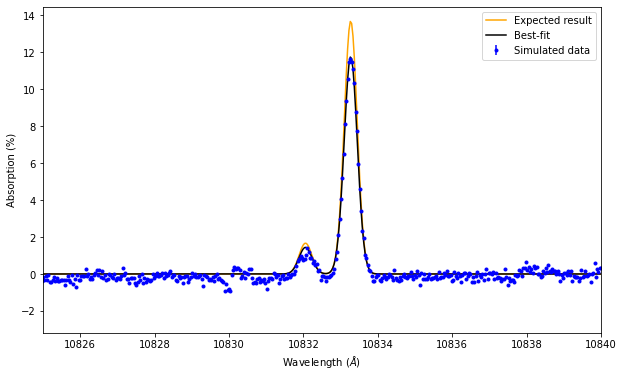

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 9.80225647e+03 -9.86323731e+14]


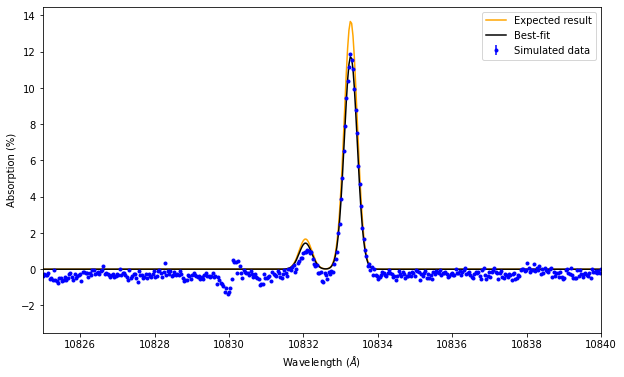

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.08731943e+04 -1.04951879e+15]


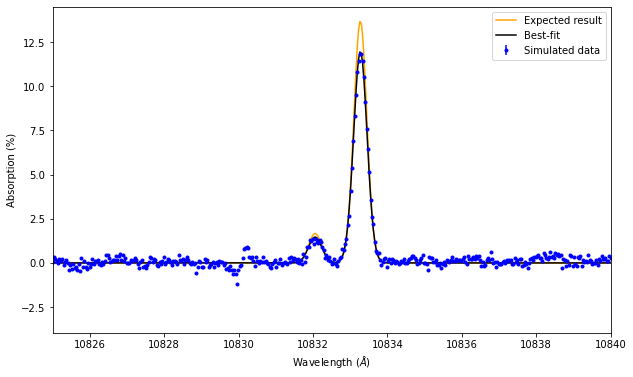

[ 1.00225623e+04 -1.00224744e+15]


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


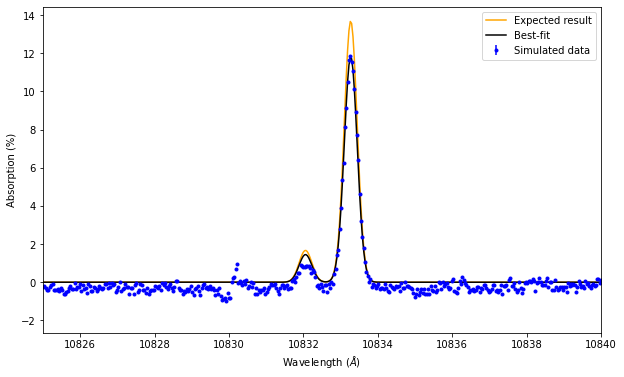

/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/he_triplet/line_model.py:133: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2.*k_boltz * T / m)


[ 1.04024094e+04 -1.02633094e+15]


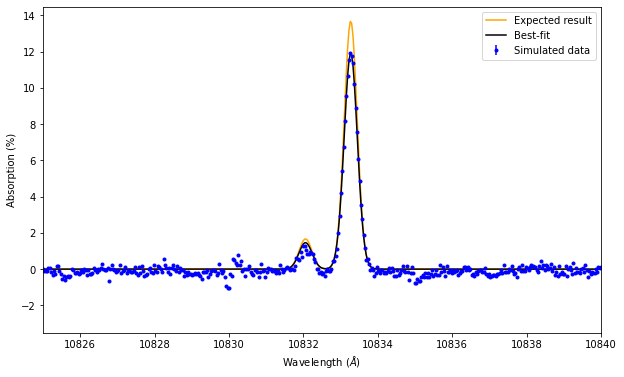

In [164]:
#Guess on the initial parameters
guess = [16000, 1e14]

if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    #Creating arrays to store the best-fit parameters and the error on them
    param_HA = np.zeros((len(diff_HA), 2))
    err_HA = np.zeros((len(diff_HA), 2))

    param_HE = np.zeros((len(diff_HE), 2))
    err_HE = np.zeros((len(diff_HE), 2))

    #Iterating over the time series to get a value of the retrieved parameters for each spectrum
    for i in range(len(diff_HA)):

        #Re-defining the absorption function
        # I have to do this because the absorption function takes as input a flux/intensity
        #We set this input flux to 1.
        #We fix the stellar velocity because the Sun's velocity is well known.
        #We fit for the atmospheric He column density and the temperature of the atmosphere.
        def absorption_function(x, temp, density):
            return spec_mod.spectrum_he(x, np.ones(diff_HA[i].shape), temp, density, vsini, 'VACUUM')

        #Chi-squared minimization routine
        params, cov = curve_fit(absorption_function, in_transit_lamda_HA[i], diff_HA[i], sigma = diff_HA_err[i], p0=guess)

        #Storing the best-fit parameters and errors
        param_HA[i] = params
        err_HA[i] = np.sqrt(np.diag(cov))

        #Plotting the in-transit planetary spectra and their corresponding model
        print(params)
        plt.figure(figsize=[10, 6])
        model = absorption_function(in_transit_lamda_HA[i], params[0], params[1])
        plt.errorbar(in_transit_lamda_HA[i], 100*(diff_HA[i]-1), yerr=100*diff_HA_err[i], fmt='b.', label='Simulated data')
        plt.plot(in_transit_lamda_HA[i], 100*(absorption_function(in_transit_lamda_HA[i], temperature, -density)-1), color='orange', label='Expected result')
        plt.plot(in_transit_lamda_HA[i], 100*(model-1), 'r', label='Best-fit')
        plt.xlim([10825, 10840])
        plt.xlabel('Wavelength ($\AA$)')
        plt.ylabel('Absorption (%)')
        plt.legend()
        plt.show()
        
    for i in range(len(diff_HE)):

        #Re-defining the absorption function
        # I have to do this because the absorption function takes as input a flux/intensity
        #We set this input flux to 1.
        #We fix the stellar velocity because the Sun's velocity is well known.
        #We fit for the atmospheric He column density and the temperature of the atmosphere.
        def absorption_function(x, temp, density):
            return spec_mod.spectrum_he(x, np.ones(diff_HE[i].shape), temp, density, vsini, 'VACUUM')

        #Chi-squared minimization routine
        params, cov = curve_fit(absorption_function, in_transit_lamda_HE[i], diff_HE[i], sigma=diff_HE_err[i], p0=guess)

        #Storing the best-fit parameters and errors
        param_HE[i] = params
        err_HE[i] = np.sqrt(np.diag(cov))

        #Plotting the in-transit planetary spectra and their corresponding model
        print(params)
        plt.figure(figsize=[10, 6])
        model = absorption_function(in_transit_lamda_HE[i], params[0], params[1])
        plt.errorbar(in_transit_lamda_HE[i], 100*(diff_HE[i]-1), yerr = diff_HE_err[i], fmt='b.', label='Simulated data')
        plt.plot(in_transit_lamda_HE[i], 100*(absorption_function(in_transit_lamda_HE[i], temperature, -density)-1), color='orange', label='Expected result')
        plt.plot(in_transit_lamda_HE[i], 100*(model-1), 'k', label='Best-fit')
        plt.xlim([10825, 10840])
        plt.xlabel('Wavelength ($\AA$)')
        plt.ylabel('Absorption (%)')
        plt.legend()
        plt.show()

else:

    #Creating arrays to store the best-fit parameters and the error on them
    param = np.zeros((len(diff), 2))
    err = np.zeros((len(diff), 2))
    
   #Iterating over the time series to get a value of the retrieved parameters for each spectrum
    for i in range(len(diff)):

        #Re-defining the absorption function
        # I have to do this because the absorption function takes as input a flux/intensity
        #We set this input flux to 1.
        #We fix the stellar velocity because the Sun's velocity is well known.
        #We fit for the atmospheric He column density and the temperature of the atmosphere.
        def absorption_function(x, temp, density):
            return spec_mod.spectrum_he(x, np.ones(diff[i].shape), temp, density, vsini, 'VACUUM')

        #Chi-squared minimization routine
        params, cov = curve_fit(absorption_function, in_transit_lamda[i], diff[i], sigma=diff_err[i], p0=guess)

        #Storing the best-fit parameters and errors
        param[i] = params
        err[i] = np.sqrt(np.diag(cov))

        #Plotting the in-transit planetary spectra and their corresponding model
        print(params)
        plt.figure(figsize=[10, 6])
        model = absorption_function(in_transit_lamda[i], params[0], params[1])
        plt.errorbar(in_transit_lamda[i], diff[i], diff_err[i], fmt='b.', label='Simulated data')
        plt.plot(in_transit_lamda[i], absorption_function(in_transit_lamda[i], temperature, -density), color='orange', label='Expected result')
        plt.plot(in_transit_lamda[i], model, 'r', label='Best-fit')
        plt.xlim([10825, 10840])
        plt.xlabel('Wavelength ($\AA$)')
        plt.ylabel('Absorption (%)')
        plt.legend()
        plt.show()


if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    param_HA[:, 1] = -param_HA[:, 1]
    param_HE[:, 1] = -param_HE[:, 1]
else:    
    param[:, 1] = -param[:, 1]



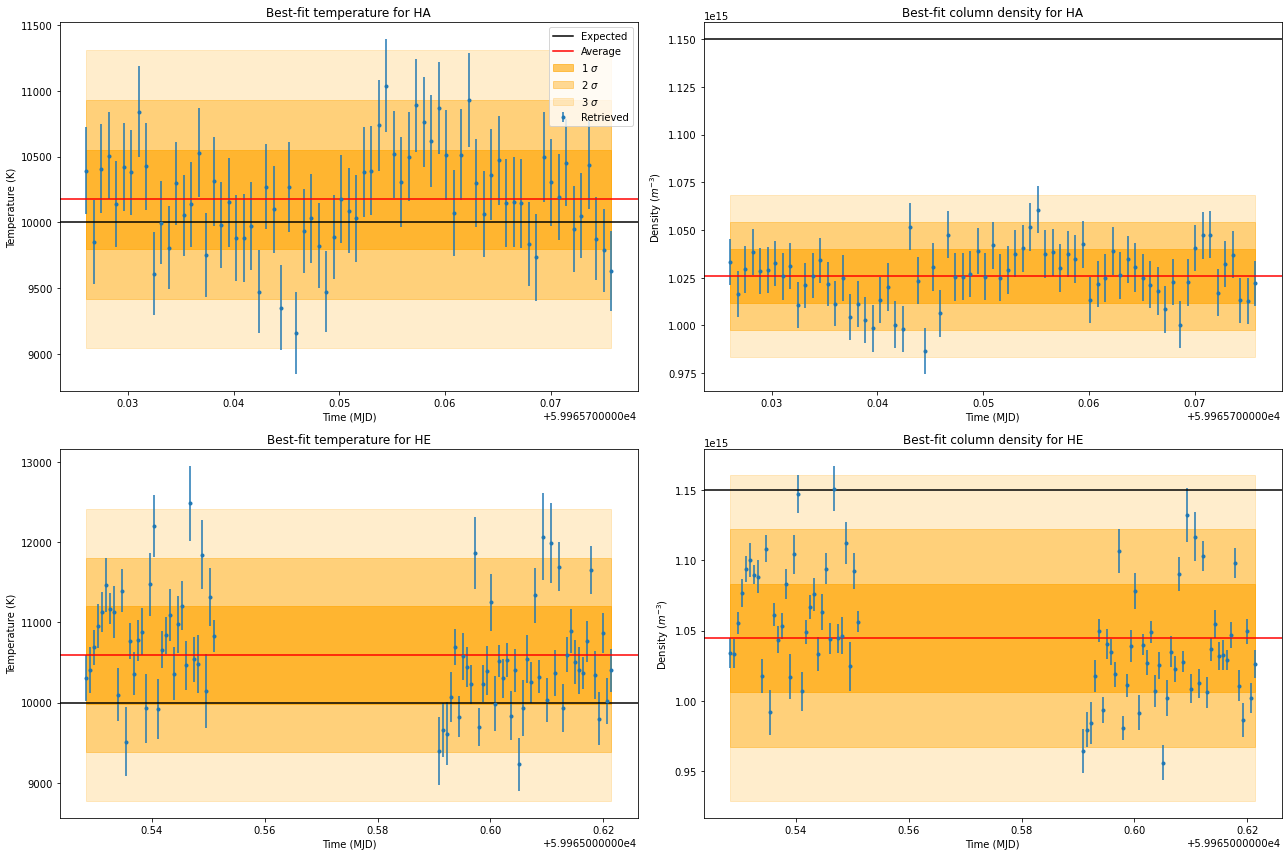

In [165]:
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig , ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=[18, 12])

    weighted_avg_T_HA = np.average(param_HA[:, 0], weights=1/err_HA[:, 0])
    weighted_std_T_HA = np.sqrt(np.average((param_HA[:, 0] - weighted_avg_T_HA)**2, weights=1/err_HA[:, 0]))

    ax1.errorbar(date_in_transit_HA, param_HA[:, 0], yerr = err_HA[:, 0], fmt='.', label='Retrieved')
    ax1.set_xlabel('Time (MJD)')
    ax1.set_ylabel('Temperature (K)')
    ax1.set_title('Best-fit temperature for HA')
    ax1.axhline(temperature, color='k', label='Expected')
    ax1.axhline(weighted_avg_T_HA, color='r', label='Average')
    ax1.fill_between(date_in_transit_HA, y1 = weighted_avg_T_HA-weighted_std_T_HA, y2 = weighted_avg_T_HA+weighted_std_T_HA, alpha=0.6, color='orange', label='1 $\sigma$')
    ax1.fill_between(date_in_transit_HA, y1 = weighted_avg_T_HA-2*weighted_std_T_HA, y2 = weighted_avg_T_HA+2*weighted_std_T_HA, alpha=0.4, color='orange', label='2 $\sigma$')
    ax1.fill_between(date_in_transit_HA, y1 = weighted_avg_T_HA-3*weighted_std_T_HA, y2 = weighted_avg_T_HA+3*weighted_std_T_HA, alpha=0.2, color='orange', label='3 $\sigma$')
    ax1.legend(framealpha=0.8)

    weighted_avg_T_HE = np.average(param_HE[:, 0], weights=1/err_HE[:, 0])
    weighted_std_T_HE = np.sqrt(np.average((param_HE[:, 0] - weighted_avg_T_HE)**2, weights=1/err_HE[:, 0]))

    ax2.errorbar(date_in_transit_HE, param_HE[:, 0], yerr = err_HE[:, 0], fmt='.', label='Retrieved')
    ax2.set_xlabel('Time (MJD)')
    ax2.set_ylabel('Temperature (K)')
    ax2.set_title('Best-fit temperature for HE')
    ax2.axhline(temperature, color='k', label='Expected')
    ax2.axhline(weighted_avg_T_HE, color='r', label='Average')
    ax2.fill_between(date_in_transit_HE, y1 = weighted_avg_T_HE-weighted_std_T_HE, y2 = weighted_avg_T_HE+weighted_std_T_HE, alpha=0.6, color='orange', label='1 $\sigma$')
    ax2.fill_between(date_in_transit_HE, y1 = weighted_avg_T_HE-2*weighted_std_T_HE, y2 = weighted_avg_T_HE+2*weighted_std_T_HE, alpha=0.4, color='orange', label='2 $\sigma$')
    ax2.fill_between(date_in_transit_HE, y1 = weighted_avg_T_HE-3*weighted_std_T_HE, y2 = weighted_avg_T_HE+3*weighted_std_T_HE, alpha=0.2, color='orange', label='3 $\sigma$')

    weighted_avg_rho_HA = np.average(param_HA[:, 1], weights=1/err_HA[:, 1])
    weighted_std_rho_HA = np.sqrt(np.average((param_HA[:, 1] - weighted_avg_rho_HA)**2, weights=1/err_HA[:, 1]))

    ax3.errorbar(date_in_transit_HA, param_HA[:, 1], yerr = err_HA[:, 1], fmt='.', label='Retrieved')
    ax3.set_xlabel('Time (MJD)')
    ax3.set_ylabel('Density ($m^{-3}$)')
    ax3.set_title('Best-fit column density for HA')
    ax3.axhline(density, color='k', label='Expected')
    ax3.axhline(weighted_avg_rho_HA, color='r', label='Average')
    ax3.fill_between(date_in_transit_HA, y1 = weighted_avg_rho_HA-weighted_std_rho_HA, y2 = weighted_avg_rho_HA+weighted_std_rho_HA, alpha=0.6, color='orange', label='1 $\sigma$')
    ax3.fill_between(date_in_transit_HA, y1 = weighted_avg_rho_HA-2*weighted_std_rho_HA, y2 = weighted_avg_rho_HA+2*weighted_std_rho_HA, alpha=0.4, color='orange', label='2 $\sigma$')
    ax3.fill_between(date_in_transit_HA, y1 = weighted_avg_rho_HA-3*weighted_std_rho_HA, y2 = weighted_avg_rho_HA+3*weighted_std_rho_HA, alpha=0.2, color='orange', label='3 $\sigma$')

    weighted_avg_rho_HE = np.average(param_HE[:, 1], weights=1/err_HE[:, 1])
    weighted_std_rho_HE = np.sqrt(np.average((param_HE[:, 1] - weighted_avg_rho_HE)**2, weights=1/err_HE[:, 1]))

    ax4.errorbar(date_in_transit_HE, param_HE[:, 1], yerr = err_HE[:, 1], fmt='.', label='Retrieved ')
    ax4.set_xlabel('Time (MJD)')
    ax4.set_ylabel('Density ($m^{-3}$)')
    ax4.set_title('Best-fit column density for HE')
    ax4.axhline(density, color='k', label='Expected')
    ax4.axhline(weighted_avg_rho_HE, color='r', label='Average')
    ax4.fill_between(date_in_transit_HE, y1 = weighted_avg_rho_HE-weighted_std_rho_HE, y2 = weighted_avg_rho_HE+weighted_std_rho_HE, alpha=0.6, color='orange', label='1 $\sigma$')
    ax4.fill_between(date_in_transit_HE, y1 = weighted_avg_rho_HE-2*weighted_std_rho_HE, y2 = weighted_avg_rho_HE+2*weighted_std_rho_HE, alpha=0.4, color='orange', label='2 $\sigma$')
    ax4.fill_between(date_in_transit_HE, y1 = weighted_avg_rho_HE-3*weighted_std_rho_HE, y2 = weighted_avg_rho_HE+3*weighted_std_rho_HE, alpha=0.2, color='orange', label='3 $\sigma$')

    fig.tight_layout()
    plt.savefig(location+'/Plot_Results/Retrieved_Params.pdf')
    
else:
    
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=[14, 6])

    ax1.errorbar(date_in_transit, param[:, 0], yerr = err[:, 0], fmt='.', label='Retrieved')
    ax1.set_xlabel('Time (MJD)')
    ax1.set_ylabel('Temperature (K)')
    ax1.set_title('Best-fit temperature')
    ax1.axhline(temperature, color='r', label='Expected')
    ax1.axhline(np.average(param[:, 0], weights=1/err[:, 0]), color='orange', label='Average')
    ax1.legend()

    ax2.errorbar(date_in_transit, param[:, 1], yerr = err[:, 1], fmt='.', label='Retrieved')
    ax2.set_xlabel('Time (MJD)')
    ax2.set_ylabel('Density ($m^{-3}$)')
    ax2.set_title('Best-fit column density')
    ax2.axhline(density, color='r', label='Expected')
    ax2.axhline(np.average(param[:, 1], weights=1/err[:, 1]), color='orange', label='Average')
    ax2.legend()

    fig.tight_layout()
    plt.savefig(location+'/Plot_Results/Retrieved_Params.pdf')
   